# Annie Yan
**Steam Game Recommender System**

annie.yq.yan@gmail.com

<h1 align='center'>Steam Game Recommender</h1>
<h2 align='center'>Exploratory Data Analysis and Visualizations</h2>

# Table of Contents

* [Introduction](#Introduction)
* [Methodology](#Methodology)
    * [Programming Language](#Programming)
* [Data for Exploratory Data Analysis (EDA)](#Data)
    * [Game Data](#Game_Data)
    * [User Recommendation Data](#Recommendations)
    * [User Stat Data](#Users)
* [Concluding Remarks](#Remarks)

Exploratory data analysis will be done on the cleaned data to see if there is further work that needs to be done on the data and to take a look at patterns and trends that may already be present within the dataset. 

Some of these insights will be further examined and visualized. 

<a name='Introduction'></a>
## Introduction

**Purpose:** To create a recommender system that will be able to output a game recommendation based on previous games played.

The available data and features will be explored and visualized. 

This notebook is 2 of 4 notebooks to be used for this project. This specific notebook will focus on the exploraty data analysis and visualization of the previously cleaned data sets. 

Please refer to:
- Part 1 for data pre-processing, where the initial major data cleaning was completed. 
- Part 3 for model creation and deployment.
- Part 4 for model evaluation. 

<a name='Methodology'></a>
## Methodology

<a name='Programming'></a>
### Programming Language
Python with additionally imported libaries will be the language of choice for this project.

The based libraries needed have been imported below:

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns

import scipy as spy
from scipy import stats

import statsmodels.api as sm

In [2]:
# Shows all columns when previewing information
pd.set_option('display.max_columns', None)

In [3]:
# Printing version of library being used. 
print('NumPy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Seaborn Version: ', sns.__version__)
print('Matplotlib Version: ', mpl.__version__)
print('Scipy Version: ', spy.__version__)
print('Statsmodels.api Version: ', sm.__version__)

NumPy Version:  1.23.5
Pandas Version:  1.5.3
Seaborn Version:  0.12.2
Matplotlib Version:  3.7.0
Scipy Version:  1.10.0
Statsmodels.api Version:  0.13.5


Version control, for purpose of troubleshooting in the event of version incompatibility.

These are the versions of the libraries that were used when running this notebook:
- NumPy Version: 1.23.5
- Pandas Version: 1.5.3
- Seaborn Version: 0.12.2
- Matplotlib Version: 3.7.0
- Scipy Version:  1.10.0
- Statsmodels.api Version:  0.13.5

The following are additional libraries that will likely be needed for some more advanced EDA. Additional libraries may be imported further into this analysis as needed. 

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

Some further data processing will be needed during the EDA process to grant more insights into categorical data. These will be addressed as needed in the analysis below. 

The categorical features will need to be encoded into numerical values, so sklearn libraries have been imported to assist with this process. 

<a name='Data'></a>
## Data for Exploratory Data Analysis

Importing into data frames, the previously cleaned datasets: 
- `games` : Steam game specific information
- `alt_games` : Alternate Steam game information, with additional score based columns but fewer data points
- `recommendations` : User recommendations for specific games
- `users` : Characteristics of the users identified in the `recommendations`

In [5]:
# Readin in cleaned game data
games = pd.read_csv('clean_data/cleaned_steam_games.csv', index_col='AppID')

In [6]:
# Reading in alternative game data information
# alt_games = pd.read_csv('clean_data/cleaned_alt_steam_games.csv')

The primary series of notebooks will not be addressing the `alt_games` dataset as it would create additional points of potential confusion, and require more extensive dataset tracking in an already lengthy analysis. 

*An appendix of additional analyses will be available upon completion (which may not be available at the time the primary notebook series is completed).*

In [7]:
# Reading in user recommendations for games
recommendations = pd.read_csv('clean_data/cleaned_recommendations.csv')

In [8]:
# Reading in stats on users
users = pd.read_csv('clean_data/users.csv')

<a name='Game_Data'></a>
### Game Data

In [9]:
# Checking dataframe info
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      70563 non-null  object 
 1   Estimated owners          70563 non-null  object 
 2   Required age              70563 non-null  int64  
 3   Price                     70563 non-null  float64
 4   DLC count                 70563 non-null  int64  
 5   About the game            70563 non-null  object 
 6   Supported languages       70563 non-null  object 
 7   Full audio languages      70563 non-null  object 
 8   Windows                   70563 non-null  int64  
 9   Mac                       70563 non-null  int64  
 10  Linux                     70563 non-null  int64  
 11  Metacritic score          70563 non-null  int64  
 12  Positive                  70563 non-null  int64  
 13  Negative                  70563 non-null  int64  
 14  Ach

The data pre-processing done in the first series of notebooks was solely to clean the data of any missing entries, remove as many non-game entries as possible and check for game duplication. 

Due to the extensive degree of cleaning needed to ensure all entries were as comprehensive as possible, other processing steps such as encoding of categorical variables was held off. 

Further processing will be done here as the data is examined, since the results of examination will determine what steps are needed to resolve certain numerical/categorical columns. 

#### Separating out numeric and categorical variables to assist in exploratory data analysis: 

In [10]:
# Separating out numeric columns
numeric = games[['Required age', 
                 'Price', 
                 'DLC count', 
                 'Windows', 
                 'Mac', 
                 'Linux', 
                 'Metacritic score', 
                 'Positive', 
                 'Negative',
                 'Achievements',
                 'Recommendations',
                 'Average playtime forever',
                 'Median playtime forever',
                 'Release year',
                 'Release month']]

In [11]:
# Checking number of numeric columns matches info
numeric.columns.nunique()

15

In [12]:
# Separating out categorical columns
categorical = games[['Name',
                     'Estimated owners',
                     'About the game',
                     'Supported languages',
                     'Full audio languages',
                     'Developers',
                     'Publishers',
                     'Categories',
                     'Genres',
                     'Tags']]

In [13]:
# Checking number of categorical columns matches info
categorical.columns.nunique()

10

#### Checking correlation coefficients: 

In [14]:
# Distribution of existing numeric variables
numeric.describe()

Required age         Price     DLC count       Windows           Mac  \
count  70563.000000  70563.000000  70563.000000  70563.000000  70563.000000   
mean       0.344373      7.318294      0.577796      0.999802      0.207531   
std        2.362568     10.592578     14.141502      0.014084      0.405542   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.990000      0.000000      1.000000      0.000000   
50%        0.000000      4.990000      0.000000      1.000000      0.000000   
75%        0.000000      9.990000      0.000000      1.000000      0.000000   
max       21.000000    999.000000   2366.000000      1.000000      1.000000   

              Linux  Metacritic score      Positive       Negative  \
count  70563.000000      70563.000000  7.056300e+04   70563.000000   
mean       0.143191          3.824625  1.090216e+03     177.558565   
std        0.350270         16.404922  2.654611e+04    4989.470613   
min        0.000000          0.000000  0.000000e+00       0.000000   
25%        0.000000          0.000000  1.000000e+00       0.000000   
50%        0.000000          0.000000  1.000000e+01       3.000000   
75%        0.000000          0.000000  5.900000e+01      18.000000   
max        1.000000         97.000000  5.764420e+06  895978.000000   

       Achievements  Recommendations  Average playtime forever  \
count  70563.000000     7.056300e+04              70563.000000   
mean      22.211003     8.247477e+02                110.645551   
std      186.799310     1.828137e+04                963.040048   
min        0.000000     0.000000e+00                  0.000000   
25%        0.000000     0.000000e+00                  0.000000   
50%        4.000000     0.000000e+00                  0.000000   
75%       20.000000     0.000000e+00                  0.000000   
max     9821.000000     3.441592e+06              90351.000000   

       Median playtime forever  Release year  Release month  
count             70563.000000  70563.000000   70563.000000  
mean                 95.573488   2019.371668       6.531298  
std                1213.274718      2.818440       3.433570  
min                   0.000000   1997.000000       1.000000  
25%                   0.000000   2018.000000       4.000000  
50%                   0.000000   2020.000000       6.000000  
75%                   0.000000   2022.000000      10.000000  
max              136629.000000   2023.000000      12.000000

In [15]:
# High level overview of pairplots, takes a significant time to load so a screenshot has been taken
# plt.figure()
# sns.pairplot(numeric)
# plt.show()

The code to run a seaborn pairplot has been commented out at this time. The runtime is long, and so the results have been screenshotted and presented below as a high level summary of the relationship between columns of data. 

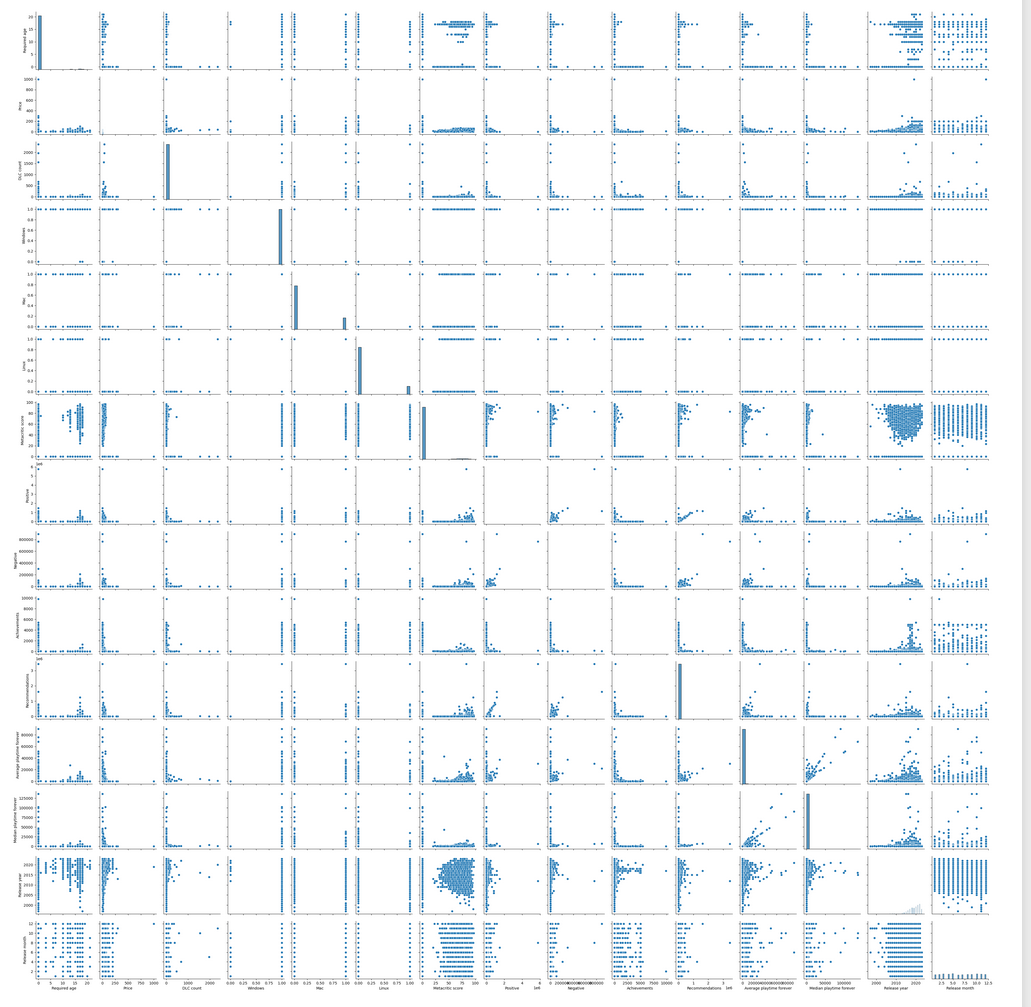

It can be noted that the majority of plots are not linearly related, though some notable exceptions do occur in the bottom right half of the graphs. These will be further explored when testing for correlations. 

Also of note is that there are a lot of outliers. This is not unexpected as certain games will have very high player bases and/or very divided user opinions. 

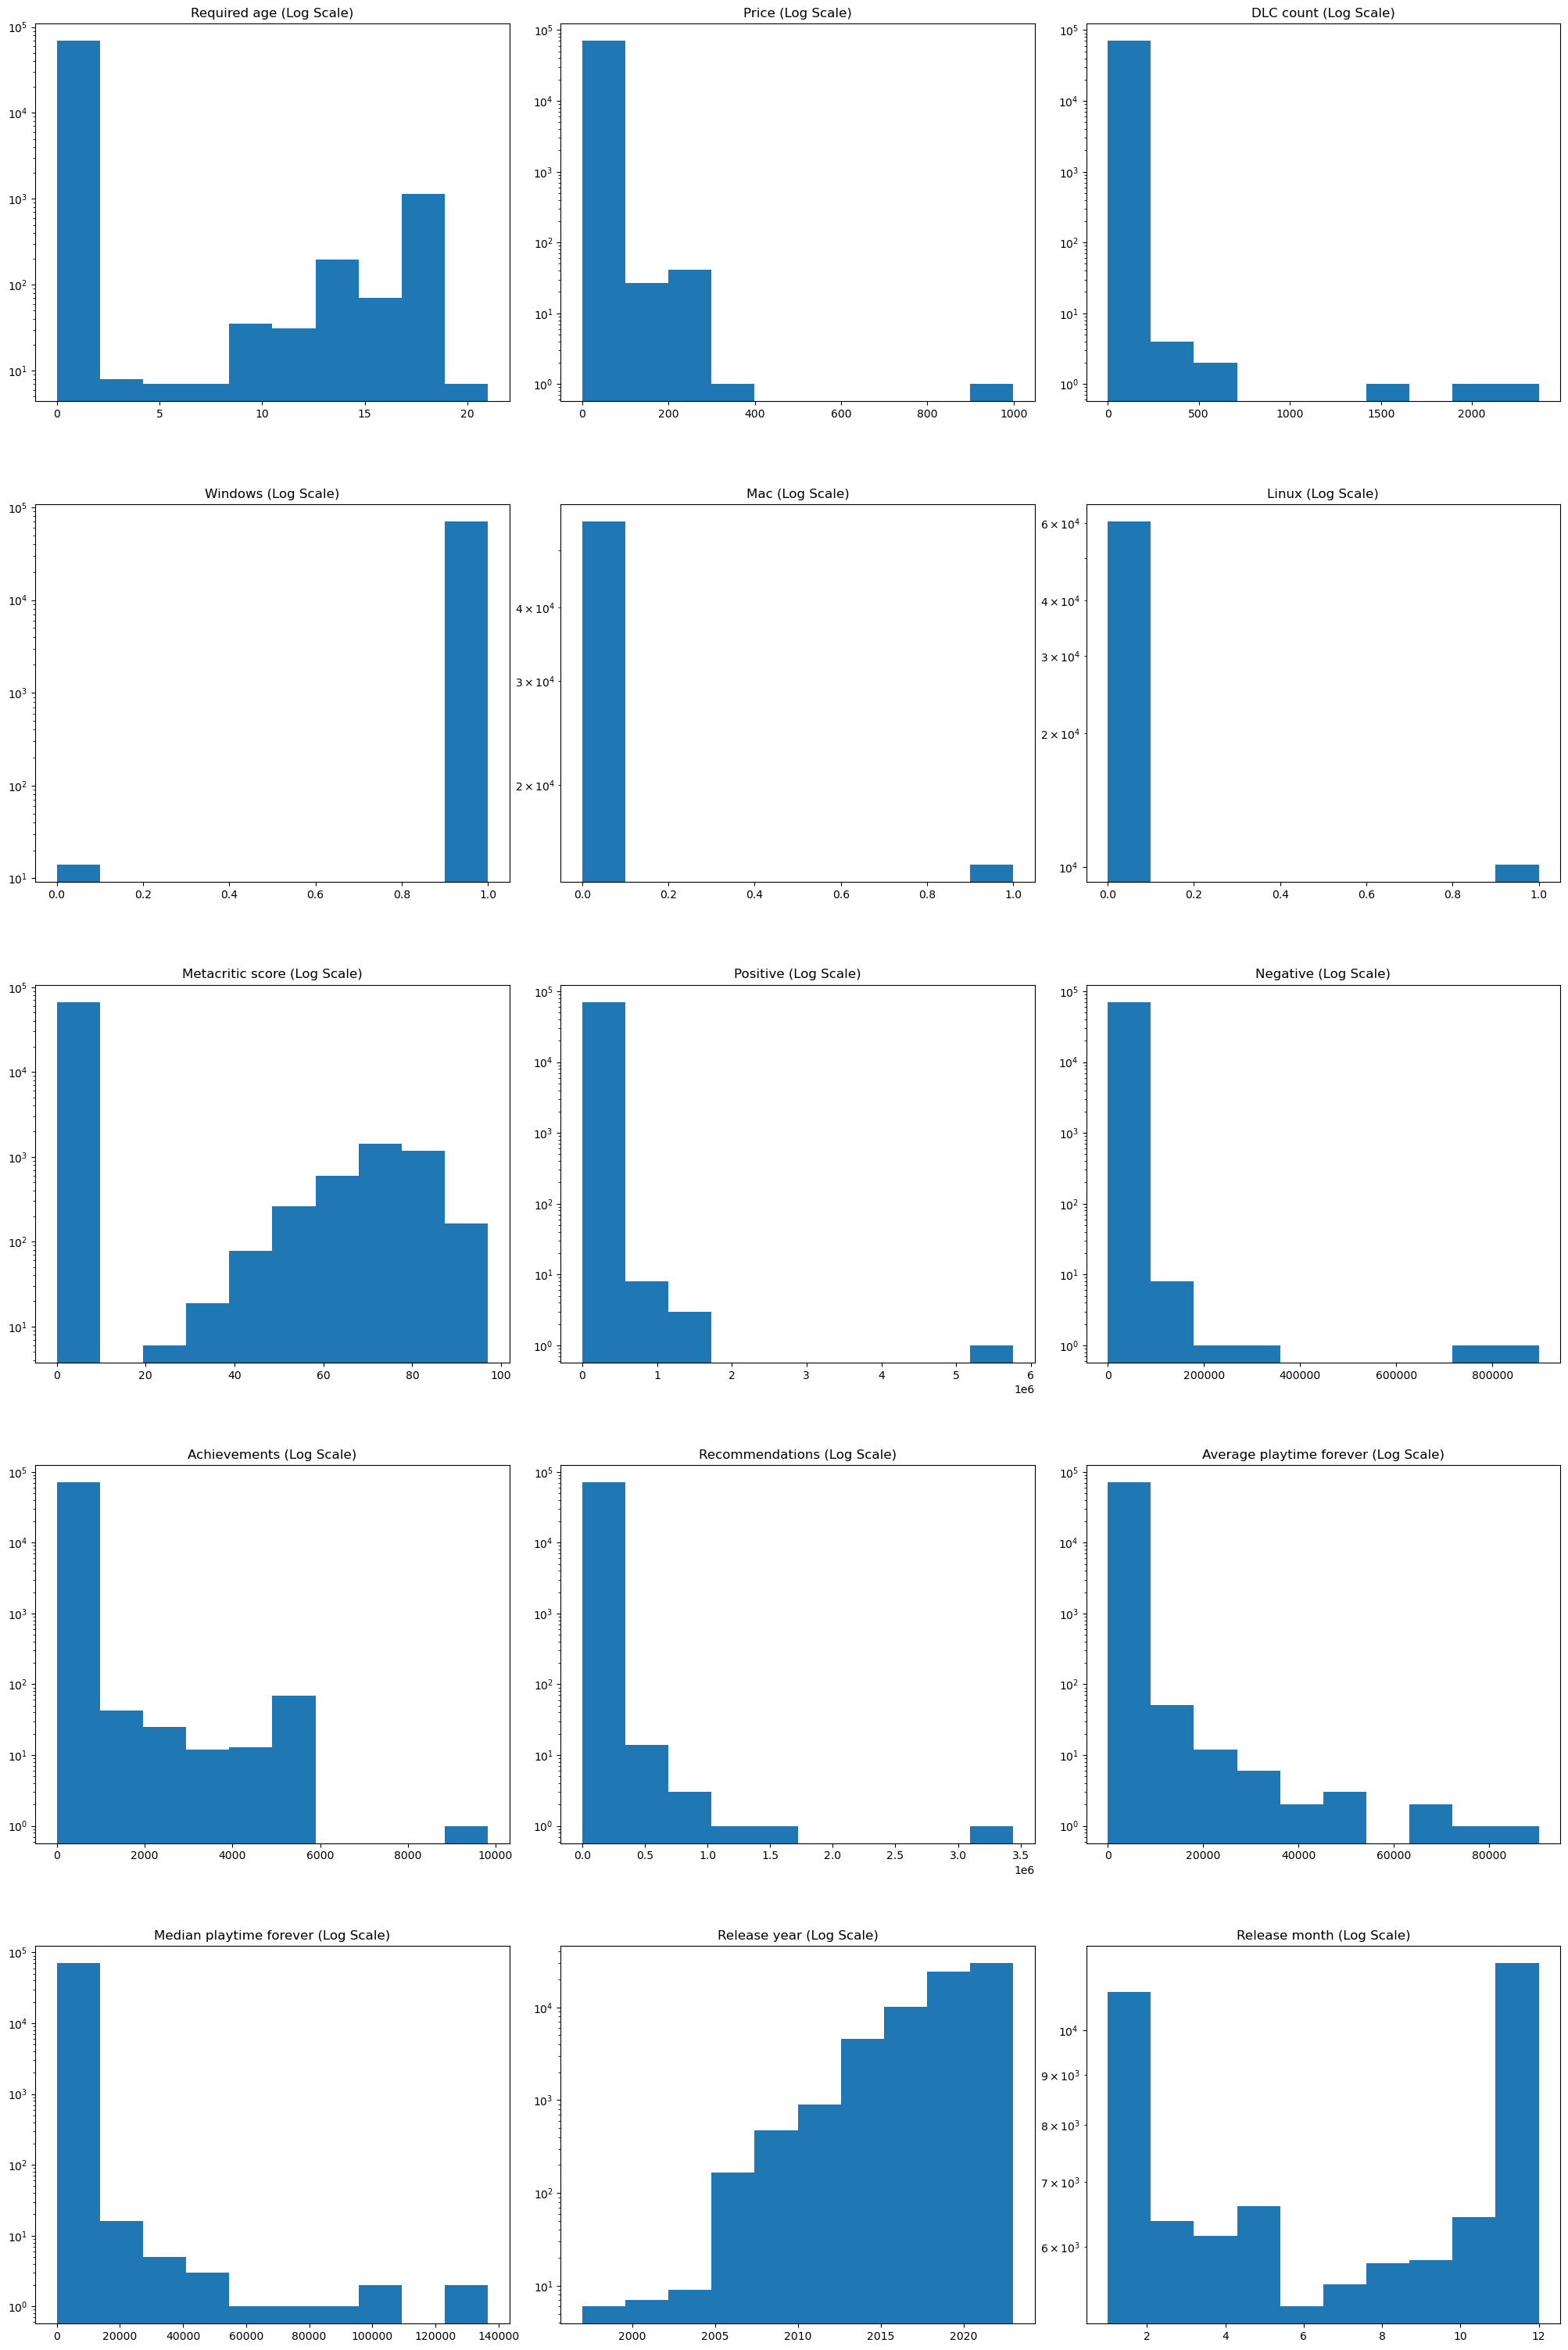

In [16]:
# Setting the plots layout
plt.subplots(5, 3, figsize=(20, 30))

# Plotting
for i, column in enumerate(numeric.columns, 1):
    plt.subplot(5, 3, i)
    plt.hist(numeric[column], log=True)
    plt.title(column + ' (Log Scale)')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

Since there are a lot of outlier values, the histograms have been log scaled to better visualize the spread. 

None of the existing numeric variables have a normal distribution and as previously mentioned there are a significant number of outliers in the data. 
- `Required age` : It can be seen that a majority of games are not age restricted, though it may be prudent to consider age restrictions when making a model that recommends games. 
- `Price` : There is a small amount of Steam content that is priced at a very high value, but the vast majority is free to play or priced very low. 
- `DLC count` : Most games on Steam do not have any DLC content
- `Windows` : Windows support is near universal for Steam content
- `Mac` : Most games do not have Mac support
- `Linux` : Most games also do not have Linux support
- `Metacritic score` : A large number of games do not have an associated Metacritic score, though the ones that do are left skewed with an almost normal distribution surrounding higher scores. 
- `Positive` : There is an outlier game that has an overwhelming number of positive votes, while most of the other positive vote counts are skewed right (more games have a small amount of positive votes)
- `Negative` : There are slightly more outliers that have an overwhelming number of negative votes, but otherwise, the data is similar to that of positive votes.
- `Achievements` : There is an outlier with a large number of achievements available to obtain, while the majority of games have a few achievements available. The shape could almost be bimodal if it were not for the missing inbetween values leading up to the outlier. 
- `Recommendations` : There is an outlier with a overwhelming number of recommendations, while most other games have small number of recommendations. Graph is skewed to right. 
- `Average playtime forever` : Most games have a shorter average playtime (min). Graph is right skewed. This could be due to the fact that many games do not have replayability (i.e. there are more one and done games vs. those that can be repeatedly replayed). 
- `Median playtime forever` : Most games have a shorter median playtime (min). Graph is right skewed.
- `Release year` : More games are being released each year, which is in line with the publically available Steam stats from the official source. 
- `Release month` : Game release appears to have some measure of seasonality (more games released in winter, less during summer). 

#### Pearson Correlation

In [17]:
# Pearson correlations for all numerical columns
games.corr(numeric_only=True)

Required age     Price  DLC count   Windows  \
Required age                  1.000000  0.114851   0.014885 -0.012853   
Price                         0.114851  1.000000   0.050204 -0.015623   
DLC count                     0.014885  0.050204   1.000000  0.000504   
Windows                      -0.012853 -0.015623   0.000504  1.000000   
Mac                          -0.013638  0.011620   0.017260 -0.022565   
Linux                        -0.008846  0.004771   0.008237 -0.002859   
Metacritic score              0.185571  0.177347   0.026294  0.003284   
Positive                      0.063655  0.035021   0.019029  0.000564   
Negative                      0.056675  0.027792   0.014756  0.000462   
Achievements                  0.002564  0.005182   0.015954  0.001309   
Recommendations               0.079877  0.052479   0.020362  0.000623   
Average playtime forever      0.063899  0.096391   0.048498  0.001179   
Median playtime forever       0.025289  0.065159   0.022190  0.000761   
Release year                 -0.113834 -0.000476  -0.017767  0.003643   
Release month                -0.001594  0.011254   0.004007  0.002766   

                               Mac     Linux  Metacritic score  Positive  \
Required age             -0.013638 -0.008846          0.185571  0.063655   
Price                     0.011620  0.004771          0.177347  0.035021   
DLC count                 0.017260  0.008237          0.026294  0.019029   
Windows                  -0.022565 -0.002859          0.003284  0.000564   
Mac                       1.000000  0.576070          0.111427  0.026098   
Linux                     0.576070  1.000000          0.090953  0.027652   
Metacritic score          0.111427  0.090953          1.000000  0.119594   
Positive                  0.026098  0.027652          0.119594  1.000000   
Negative                  0.010466  0.011635          0.078772  0.784705   
Achievements              0.006309  0.011937          0.013522  0.012932   
Recommendations           0.023147  0.024506          0.128419  0.927270   
Average playtime forever  0.039657  0.028339          0.138553  0.264495   
Median playtime forever   0.025068  0.016765          0.061646  0.047077   
Release year             -0.185695 -0.137099         -0.336906 -0.052593   
Release month             0.003895  0.001341          0.002014  0.005786   

                          Negative  Achievements  Recommendations  \
Required age              0.056675      0.002564         0.079877   
Price                     0.027792      0.005182         0.052479   
DLC count                 0.014756      0.015954         0.020362   
Windows                   0.000462      0.001309         0.000623   
Mac                       0.010466      0.006309         0.023147   
Linux                     0.011635      0.011937         0.024506   
Metacritic score          0.078772      0.013522         0.128419   
Positive                  0.784705      0.012932         0.927270   
Negative                  1.000000      0.008886         0.818295   
Achievements              0.008886      1.000000         0.012979   
Recommendations           0.818295      0.012979         1.000000   
Average playtime forever  0.251682      0.017731         0.251698   
Median playtime forever   0.048364      0.008818         0.056349   
Release year             -0.035997     -0.041060        -0.051609   
Release month             0.007996     -0.004371         0.005979   

                          Average playtime forever  Median playtime forever  \
Required age                              0.063899                 0.025289   
Price                                     0.096391                 0.065159   
DLC count                                 0.048498                 0.022190   
Windows                                   0.001179                 0.000761   
Mac                                       0.039657                 0.025068   
Linux                                     0.028339           

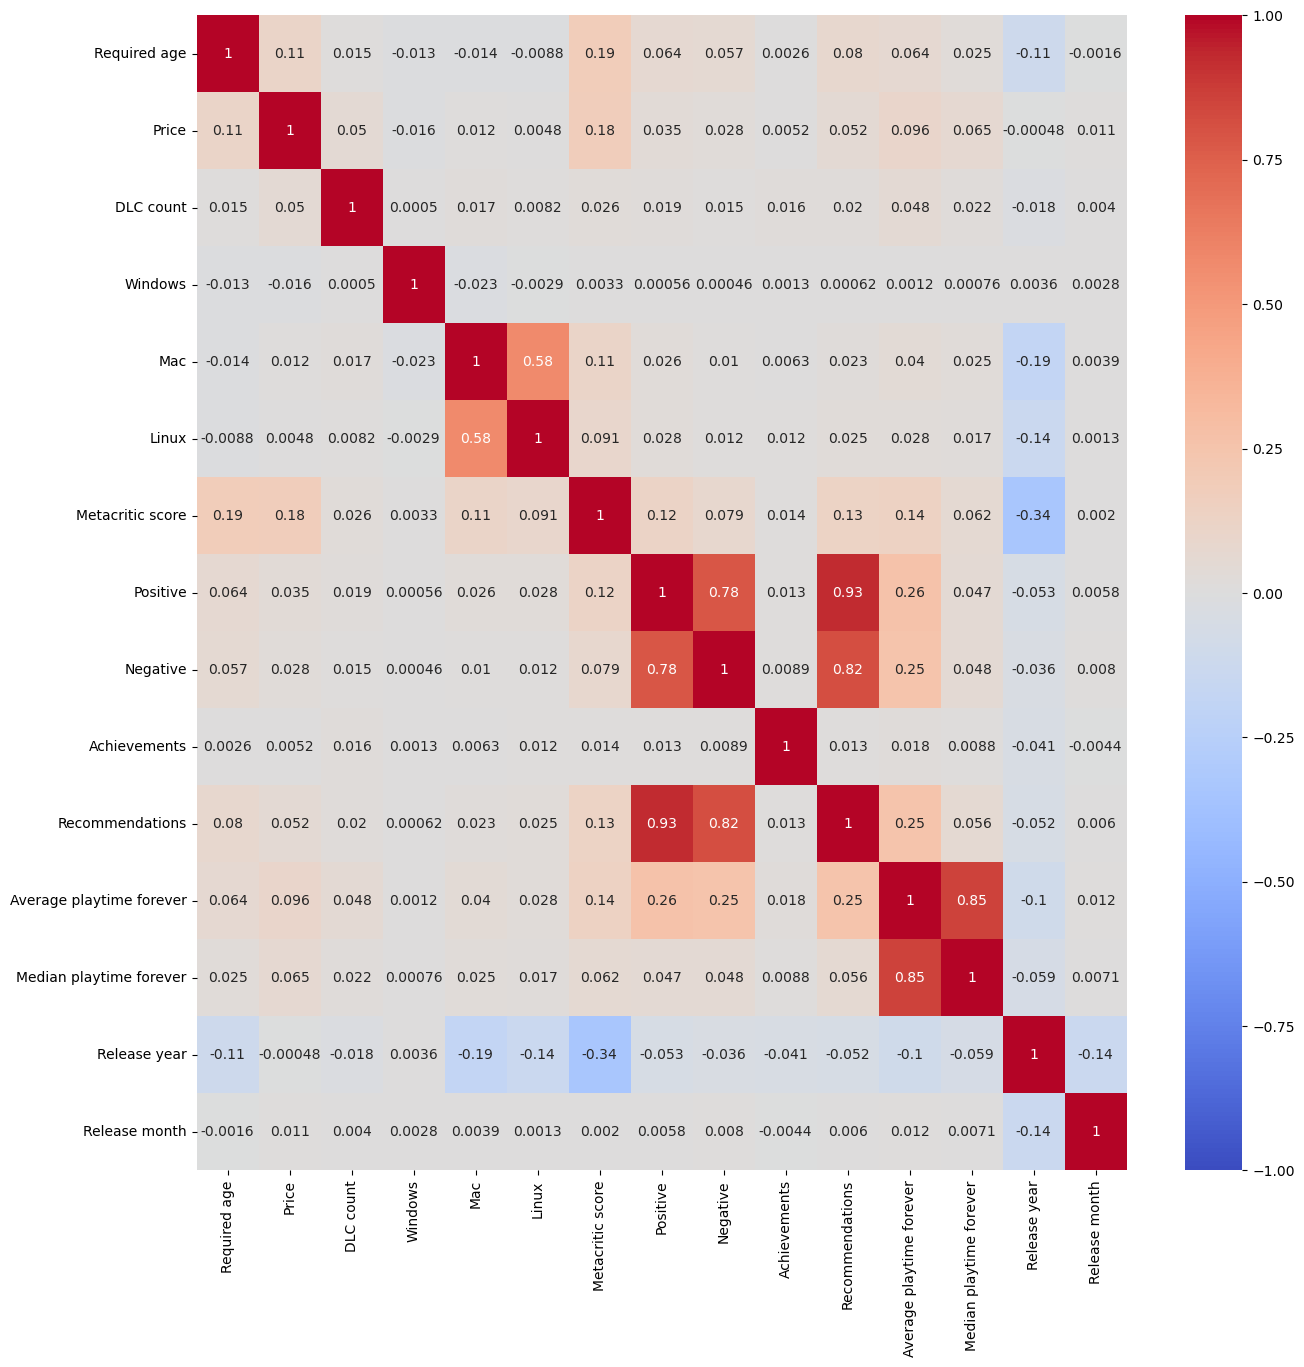

In [18]:
# Visualization of pearson correlations
plt.figure(figsize=(15,15))
sns.heatmap(games.corr(numeric_only=True), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

Notable points on the correlation matrix:

**Positive correlations:**
- `Recommendations` and `Positive` : Games that have a lot of positive votes are likely to be recommended more, so the strong correlation is expected.
- `Recommendations` and `Negative` : It is strange that negative votes are positively correlated with more recommendations, but this is likely due to the fact that more negative votes means more players having played the game (potentially as a result of a higher number of recommendations).
- `Positive` and `Negative` : While it may seem counterintuitive for these to be positively correlated, this is likely a result of the number of players voting. This correlation is likely the result of a large (and potentially divided) player base. High numbers of both are a result of more players playing and thus giving a wider view of personal game preference. 
- `Linux` and `Mac` : Since Windows is the dominant space for PC gaming, when support for other platforms is included, it is likely that it will be included for both Mac and Linux rather than just one or the other -- hence the positive correlation. (One of these platforms can also be dropped to reduce multi-collinearity.) 
- `Average playtime forever` and `Median playtime forever` : Essentially are demonstrating similar intent, both summary statistics and they are going to be similar. 

**Negative correlations:**
- `Release year` and `Metacritic score` : Likely negatively correlated as newer releases are unlikely to have been reviewed/scored by Metacritic. 

#### Spearman Correlation

In [19]:

games.corr(method='spearman',numeric_only=True)

Required age     Price  DLC count   Windows  \
Required age                  1.000000  0.089471   0.077813 -0.011994   
Price                         0.089471  1.000000   0.145506  0.003987   
DLC count                     0.077813  0.145506   1.000000  0.003391   
Windows                      -0.011994  0.003987   0.003391  1.000000   
Mac                          -0.014055  0.057252   0.120921 -0.022565   
Linux                        -0.009139  0.046467   0.112427 -0.002859   
Metacritic score              0.180210  0.203536   0.219911  0.003319   
Positive                      0.109601  0.238512   0.295149  0.007290   
Negative                      0.123856  0.184537   0.265493  0.004270   
Achievements                  0.049177  0.185401   0.291175  0.010855   
Recommendations               0.174058  0.317818   0.323206  0.004133   
Average playtime forever      0.144699  0.186195   0.295002  0.000050   
Median playtime forever       0.141605  0.188956   0.292516  0.000019   
Release year                 -0.080944 -0.019085  -0.103050  0.003889   
Release month                -0.001055  0.007564   0.000231  0.002703   

                               Mac     Linux  Metacritic score  Positive  \
Required age             -0.014055 -0.009139          0.180210  0.109601   
Price                     0.057252  0.046467          0.203536  0.238512   
DLC count                 0.120921  0.112427          0.219911  0.295149   
Windows                  -0.022565 -0.002859          0.003319  0.007290   
Mac                       1.000000  0.576070          0.109615  0.198077   
Linux                     0.576070  1.000000          0.089274  0.135663   
Metacritic score          0.109615  0.089274          1.000000  0.328793   
Positive                  0.198077  0.135663          0.328793  1.000000   
Negative                  0.156766  0.103026          0.329540  0.851764   
Achievements              0.168461  0.168437          0.166317  0.338572   
Recommendations           0.142455  0.107716          0.441084  0.615817   
Average playtime forever  0.170603  0.134206          0.392640  0.607066   
Median playtime forever   0.170376  0.133903          0.386499  0.604743   
Release year             -0.191890 -0.138075         -0.249048 -0.515317   
Release month             0.003781  0.001161          0.000873  0.006321   

                          Negative  Achievements  Recommendations  \
Required age              0.123856      0.049177         0.174058   
Price                     0.184537      0.185401         0.317818   
DLC count                 0.265493      0.291175         0.323206   
Windows                   0.004270      0.010855         0.004133   
Mac                       0.156766      0.168461         0.142455   
Linux                     0.103026      0.168437         0.107716   
Metacritic score          0.329540      0.166317         0.441084   
Positive                  0.851764      0.338572         0.615817   
Negative                  1.000000      0.254782         0.594950   
Achievements              0.254782      1.000000         0.285337   
Recommendations           0.594950      0.285337         1.000000   
Average playtime forever  0.620172      0.257076         0.679676   
Median playtime forever   0.617838      0.256765         0.677913   
Release year             -0.576081     -0.108377        -0.280178   
Release month             0.006217      0.008828         0.010824   

                          Average playtime forever  Median playtime forever  \
Required age                              0.144699                 0.141605   
Price                                     0.186195                 0.188956   
DLC count                                 0.295002                 0.292516   
Windows                                   0.000050                 0.000019   
Mac                                       0.170603                 0.170376   
Linux                                     0.134206           

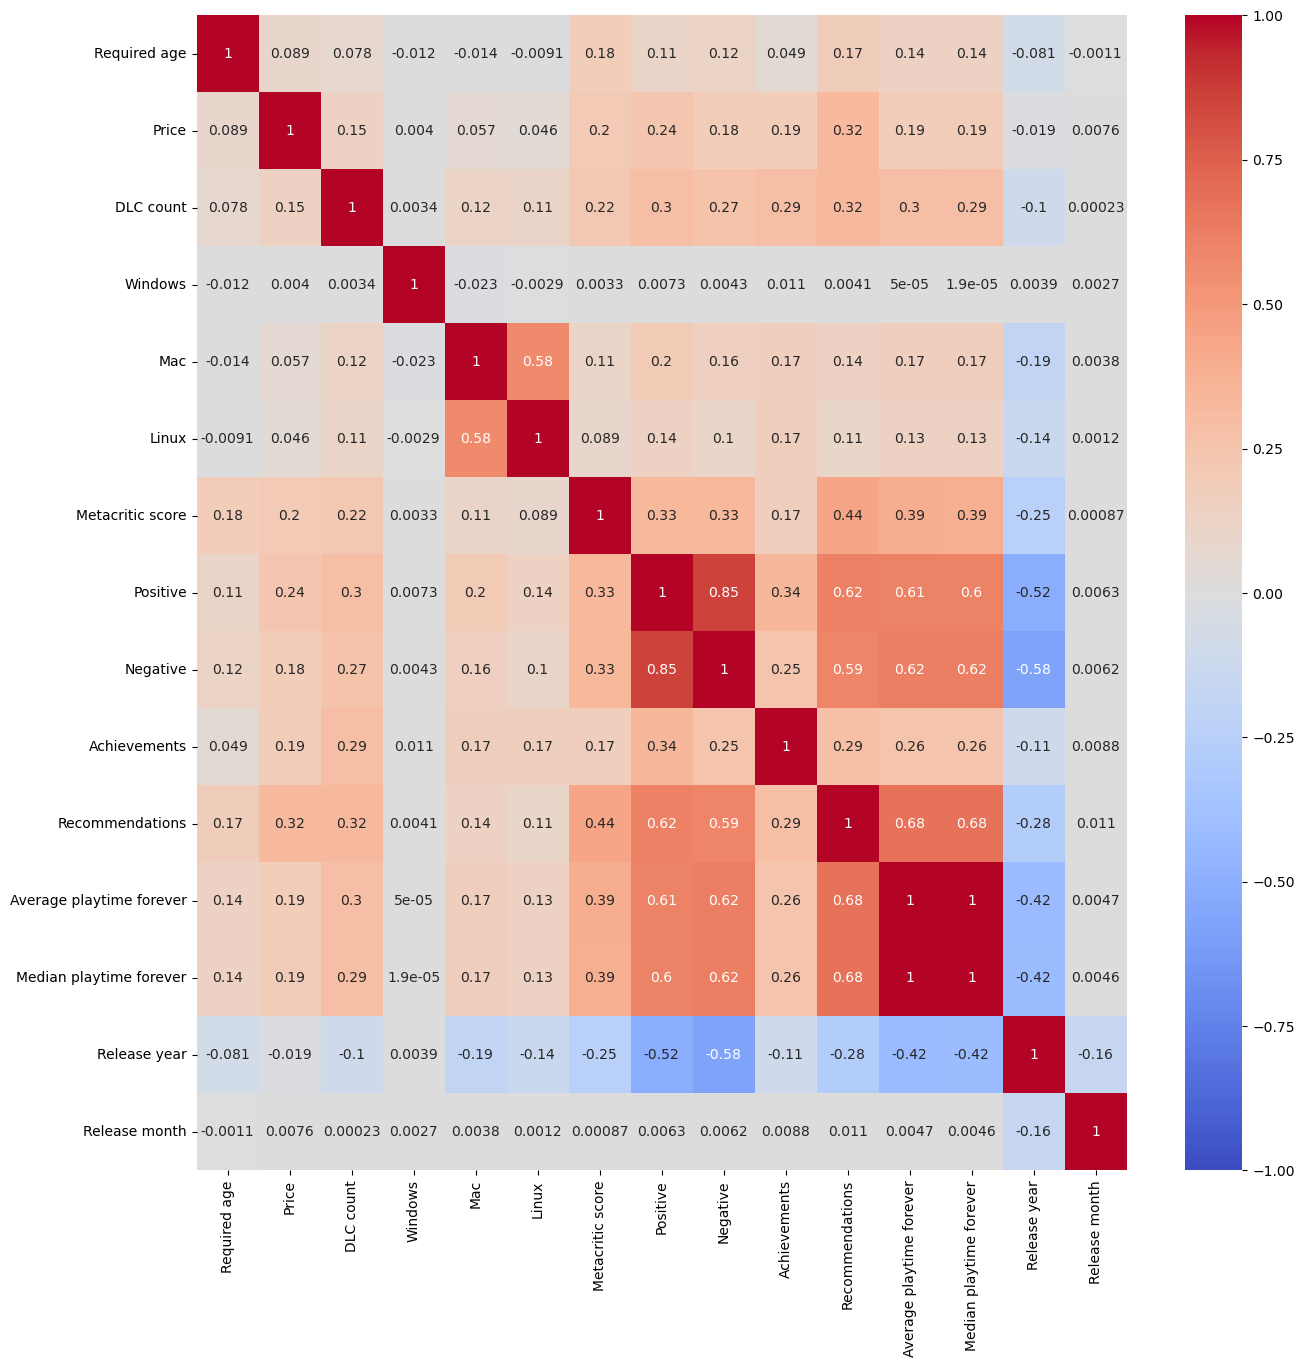

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(games.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

Since none of the data is normally distributed, the correlation coefficients are also tested with the spearman correlation, to see if there are any significant differences.

#### Multicollinearity and dropping of columns that contain similar information: 

`Average playtime forever` and `Median playtime forever` are columns that provide essentially the same information (or information of similar intent). The distribution of values as noted by the graph of both of them (above) is also similar. Thus, one of them will be dropped to address the strong correlation between them.

In [21]:
# Top 5 average playtime forever values
games['Average playtime forever'].value_counts().head()

0    56353
1      315
2      119
4       99
3       95
Name: Average playtime forever, dtype: int64

In [22]:
# Top 5 median playtime forever values
games['Median playtime forever'].value_counts().head()

0     56353
1       308
2       117
4        95
11       94
Name: Median playtime forever, dtype: int64

There is no noticeable difference between them. Of the two, medians are less affected by outliers, which are very likely to occur with playtime data and have been noted by previous analyses/visuals.

In [23]:
# Dropping average playtime forever column
games.drop(columns=['Average playtime forever'], axis=1, inplace=True)

#### Relationship of `Positive`, `Negative` and `Recommendations`

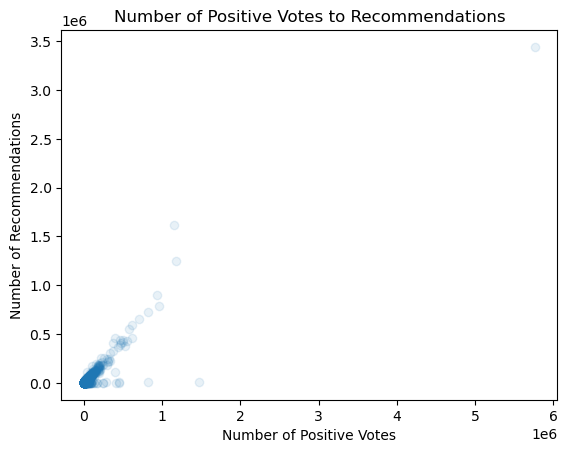

In [24]:
# Scatter graph of recommendations vs positive votes
plt.figure()
plt.scatter(x=games['Positive'], y=games['Recommendations'], alpha=0.1)
plt.xlabel('Number of Positive Votes')
plt.ylabel('Number of Recommendations')
plt.title('Number of Positive Votes to Recommendations')

plt.show()

The positive votes appear to have almost a 1:1 correlation with the number of recommendations. And there is a notable outlier on this graph.

In [25]:
# Sorting the top 5 games by positive votes
games[['Name', 'Positive', 'Negative', 'Recommendations']].sort_values(by='Positive', ascending=False).head()

Name  Positive  Negative  Recommendations
AppID                                                                        
730     Counter-Strike: Global Offensive   5764420    766677          3441592
570                               Dota 2   1477153    300437            14300
271590                Grand Theft Auto V   1171197    210154          1247051
578080               PUBG: BATTLEGROUNDS   1154655    895978          1616422
105600                          Terraria    964983     21044           783469

Counter-Strike: Global Offensive is the outlier with an overwhelming number of positive votes. 

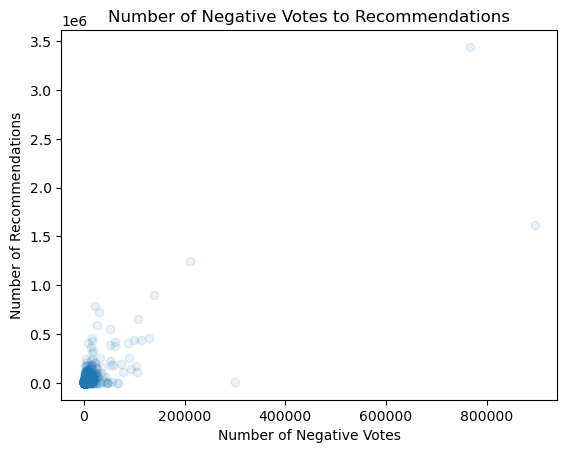

In [26]:
# Scatter graph of recommendations vs negative votes
plt.figure()
plt.scatter(games['Negative'], games['Recommendations'], alpha=0.1)
plt.xlabel('Number of Negative Votes')
plt.ylabel('Number of Recommendations')
plt.title('Number of Negative Votes to Recommendations')

plt.show()

There appears to be about 2-3 outliers, with 2 of them being especially notable. 

In [27]:
# Sorting top 5 games by most negative votes
games[['Name', 'Negative', 'Recommendations']].sort_values(by='Negative', ascending=False).head()

Name  Negative  Recommendations
AppID                                                              
578080               PUBG: BATTLEGROUNDS    895978          1616422
730     Counter-Strike: Global Offensive    766677          3441592
570                               Dota 2    300437            14300
271590                Grand Theft Auto V    210154          1247051
359550   Tom Clancy's Rainbow Six® Siege    138530           899477

PUBG: BATTLEGROUNDS has the highest number of negative votes and less recommendations than Counter-Strike: Global Offensive.

Of note is that Dota 2 has a high number of negative votes, but not many recommendations (a more expected outcome) compared to other games on the above list which have relatively high number of recommendations despite negative sentiment. 

In [28]:
games[['Name', 'Positive', 'Negative', 'Recommendations']].sort_values(by='Recommendations', ascending=False).head()

Name  Positive  Negative  Recommendations
AppID                                                                        
730     Counter-Strike: Global Offensive   5764420    766677          3441592
578080               PUBG: BATTLEGROUNDS   1154655    895978          1616422
271590                Grand Theft Auto V   1171197    210154          1247051
359550   Tom Clancy's Rainbow Six® Siege    929372    138530           899477
105600                          Terraria    964983     21044           783469

Counter-Strike: Global Offensive is the outlier that has a high number of recommendations despite a very high number of negative votes. This is likely a result of the also high number of positive votes. 

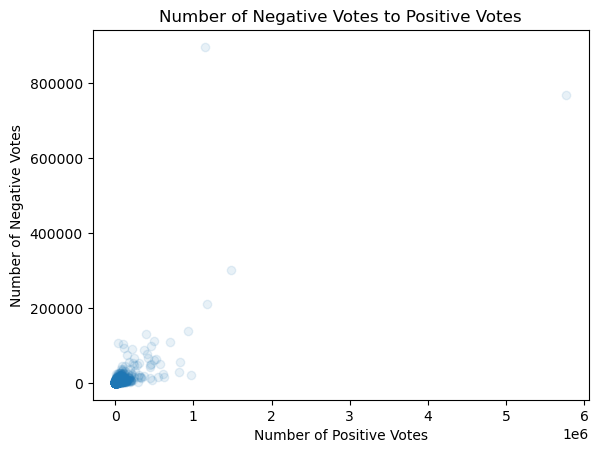

In [29]:
# Scatter plot of negative vs positive votes 
plt.figure()
plt.scatter(games['Positive'], games['Negative'], alpha=0.1)
plt.xlabel('Number of Positive Votes')
plt.ylabel('Number of Negative Votes')
plt.title('Number of Negative Votes to Positive Votes')

plt.show()

Since there is such a strong relationship between `Positive`, `Negative` and `Recommendations`, it would be prudent to address possibilities of multi-collinearity by re-engineering these into a new feature that encompasses the general sentiment presented. 

A good feature to engineer would be a ratio of `Positive` to `Negative` votes as it would better capture the relationship compared to the absolute value alone. 

#### Feature Engineering of `Positive`, `Negative` and `Recommendations`

`Recommendations` will be a zero value or positive value regardless of the direction that player opnions trend (i.e. no matter whether a game is overall highly hated or highly loved, there will always be some users that will recommend a game because the individual user has liked the game). Thus, `Recommendation` will be left as is. 

If `Positive` votes are subtracted by `Negative` votes, then the resultant value will be indicative of a positive or negative sentiment: if there are more positive votes than negative, then the size of the positive value will indicate a how strong a positive/negative sentiment there is.

This is a basic means of considering `Positive` vs `Negative` sentiments that doesn't normalize the values based on the total vote counts. 

In [30]:
games['Sentiment_Difference'] = games['Positive']-games['Negative']

In [31]:
games[['Name', 'Positive', 'Negative', 'Sentiment_Difference']].sort_values(by=['Sentiment_Difference'], ascending=False).head(20)

Name  Positive  Negative  \
AppID                                                           
730      Counter-Strike: Global Offensive   5764420    766677   
570                                Dota 2   1477153    300437   
271590                 Grand Theft Auto V   1171197    210154   
105600                           Terraria    964983     21044   
4000                          Garry's Mod    822326     29004   
359550    Tom Clancy's Rainbow Six® Siege    929372    138530   
440                       Team Fortress 2    823693     56683   
550                         Left 4 Dead 2    619457     16204   
252490                               Rust    703687    108223   
292030          The Witcher® 3: Wild Hunt    617738     25020   
227300             Euro Truck Simulator 2    548047     15109   
945360                           Among Us    577656     51069   
413150                     Stardew Valley    475785      8983   
218620                           PAYDAY 2    520826     62574   
252950                     Rocket League®    493188     62447   
739630                       Phasmophobia    441220     13579   
1245620                        ELDEN RING    460812     51238   
304930                           Unturned    443320     41385   
230410                           Warframe    442724     48241   
381210                   Dead by Daylight    494648    112924   

         Sentiment_Difference  
AppID                          
730                   4997743  
570                   1176716  
271590                 961043  
105600                 943939  
4000                   793322  
359550                 790842  
440                    767010  
550                    603253  
252490                 595464  
292030                 592718  
227300                 532938  
945360                 526587  
413150                 466802  
218620                 458252  
252950                 430741  
739630                 427641  
1245620                409574  
304930                 401935  
230410                 394483  
381210                 381724

In [32]:
games[['Name', 'Positive', 'Negative', 'Sentiment_Difference']].sort_values(by=['Sentiment_Difference'], ascending=True).head(20)

Name  Positive  Negative  \
AppID                                                         
1517290               Battlefield™ 2042     39121    106038   
1225330                        NBA 2K21     16140     22709   
1128000                      Cube World      6678     11133   
1504570               Cultivation Tales      4959      8060   
619080                              SOS      1931      4984   
1888930          The Last of Us™ Part I      9067     12035   
730310               DYNASTY WARRIORS 9      3075      6009   
282560      RollerCoaster Tycoon World™      1359      4157   
1448440         Wo Long: Fallen Dynasty      4367      7101   
246090                   Spacebase DF-9       762      3397   
681660                     Bless Online      3783      6299   
201510   Flatout 3: Chaos & Destruction       506      2647   
834910                            ATLAS     19204     21291   
247950                         Sacred 3      1101      3107   
1811260              EA SPORTS™ FIFA 23      1997      3934   
292630                    Uriel's Chasm       481      2247   
583950                         Artifact     11562     13245   
562810                   MONOPOLY® PLUS      4995      6623   
47400                 Stronghold 3 Gold      1290      2838   
221020                            Towns       710      1997   

         Sentiment_Difference  
AppID                          
1517290                -66917  
1225330                 -6569  
1128000                 -4455  
1504570                 -3101  
619080                  -3053  
1888930                 -2968  
730310                  -2934  
282560                  -2798  
1448440                 -2734  
246090                  -2635  
681660                  -2516  
201510                  -2141  
834910                  -2087  
247950                  -2006  
1811260                 -1937  
292630                  -1766  
583950                  -1683  
562810                  -1628  
47400                   -1548  
221020                  -1287

Alternatively, the sentiment can be a weighted ratio. The difference between `Positive` and `Negative` votes will give the direction and size of the sentiment; then when divided by the total number of votes associated with the game, the value will be normalized. 

This creates the problem of some games having artificially high ratios (i.e. very high positive/negative sentiment) due to a small number of votes contributing to the sentiment. 

**Example:** A game with 1 positive vote and 0 negative votes would result in a ratio of (1-0)/(1+0) = 1. Without any weight from the total number of votes, this game would be considered more highly rated than a game like Counter-Strike: Global Offensive, which has 5,764,420 positive votes and 766,677 negative votes--resulting in a ratio of 0.7652. The latter game sentiment is comprised of 6,531,097 total votes. 

The total number of votes for the game divided by the total number of votes of all games will give a weight/strength to the ratio that can account for games that have very few votes and for those that have a high number of total votes.

There is a possibility of biasing the weighting towards games with more total votes, but the resultant `Weighted_Vote_Sentiment` gives a more reasonable list of the top 20 games by sentiment score. 

In [34]:
# Calculating engineered weighted sentiment score
games['Weighted_Vote_Sentiment'] = ((games['Positive']-games['Negative'])/(games['Positive']+games['Negative'])) \
                                    * ((games['Positive']+games['Negative'])/((games['Positive']+games['Negative']).sum()))

In [35]:
# Checking for null values
games['Weighted_Vote_Sentiment'].isna().sum()

13049

There are 13,049 null values after creating this new feature, which is likely due to values where there are no positive and no negative votes. Since there is neither positive nor negative sentiment, these can be considered 0 value entries--i.e. neither positive nor negative leaning. 

In [36]:
# Filling NaN values with 0 sentiment
games['Weighted_Vote_Sentiment'].fillna(0, inplace=True)

In [48]:
# Checking the list of top 20 games by the newly engineered feature
games[['Name', 'Positive', 'Negative', 'Recommendations', 'Weighted_Vote_Sentiment']].sort_values(by=['Weighted_Vote_Sentiment'], ascending=False).head(20)

Name  Positive  Negative  \
AppID                                                           
730      Counter-Strike: Global Offensive   5764420    766677   
570                                Dota 2   1477153    300437   
271590                 Grand Theft Auto V   1171197    210154   
105600                           Terraria    964983     21044   
4000                          Garry's Mod    822326     29004   
359550    Tom Clancy's Rainbow Six® Siege    929372    138530   
440                       Team Fortress 2    823693     56683   
550                         Left 4 Dead 2    619457     16204   
252490                               Rust    703687    108223   
292030          The Witcher® 3: Wild Hunt    617738     25020   
227300             Euro Truck Simulator 2    548047     15109   
945360                           Among Us    577656     51069   
413150                     Stardew Valley    475785      8983   
218620                           PAYDAY 2    520826     62574   
252950                     Rocket League®    493188     62447   
739630                       Phasmophobia    441220     13579   
1245620                        ELDEN RING    460812     51238   
304930                           Unturned    443320     41385   
230410                           Warframe    442724     48241   
381210                   Dead by Daylight    494648    112924   

         Recommendations  Weighted_Vote_Sentiment  
AppID                                              
730              3441592                 0.055867  
570                14300                 0.013154  
271590           1247051                 0.010743  
105600            783469                 0.010552  
4000              725462                 0.008868  
359550            899477                 0.008840  
440                14410                 0.008574  
550               457367                 0.006743  
252490            655687                 0.006656  
292030            591701                 0.006626  
227300            430887                 0.005957  
945360            553709                 0.005886  
413150            408579                 0.005218  
218620            375054                 0.005123  
252950            414691                 0.004815  
739630            371267                 0.004780  
1245620           391693                 0.004578  
304930              7699                 0.004493  
230410              2912                 0.004410  
381210            435898                 0.004267

In [38]:
# Checking distribution of values
games['Weighted_Vote_Sentiment'].describe()

count    7.056300e+04
mean     1.020208e-05
std      2.553289e-04
min     -7.480273e-04
25%      0.000000e+00
50%      5.589217e-08
75%      4.080129e-07
max      5.586695e-02
Name: Weighted_Vote_Sentiment, dtype: float64

In [49]:
# Checking the bottom 20 games by sentiment score
games[['Name', 'Positive', 'Negative', 'Weighted_Vote_Sentiment']].sort_values(by=['Weighted_Vote_Sentiment'], ascending=True).head(20)

Name  Positive  Negative  \
AppID                                                         
1517290               Battlefield™ 2042     39121    106038   
1225330                        NBA 2K21     16140     22709   
1128000                      Cube World      6678     11133   
1504570               Cultivation Tales      4959      8060   
619080                              SOS      1931      4984   
1888930          The Last of Us™ Part I      9067     12035   
730310               DYNASTY WARRIORS 9      3075      6009   
282560      RollerCoaster Tycoon World™      1359      4157   
1448440         Wo Long: Fallen Dynasty      4367      7101   
246090                   Spacebase DF-9       762      3397   
681660                     Bless Online      3783      6299   
201510   Flatout 3: Chaos & Destruction       506      2647   
834910                            ATLAS     19204     21291   
247950                         Sacred 3      1101      3107   
1811260              EA SPORTS™ FIFA 23      1997      3934   
292630                    Uriel's Chasm       481      2247   
583950                         Artifact     11562     13245   
562810                   MONOPOLY® PLUS      4995      6623   
47400                 Stronghold 3 Gold      1290      2838   
221020                            Towns       710      1997   

         Weighted_Vote_Sentiment  
AppID                             
1517290                -0.000748  
1225330                -0.000073  
1128000                -0.000050  
1504570                -0.000035  
619080                 -0.000034  
1888930                -0.000033  
730310                 -0.000033  
282560                 -0.000031  
1448440                -0.000031  
246090                 -0.000029  
681660                 -0.000028  
201510                 -0.000024  
834910                 -0.000023  
247950                 -0.000022  
1811260                -0.000022  
292630                 -0.000020  
583950                 -0.000019  
562810                 -0.000018  
47400                  -0.000017  
221020                 -0.000014

The `Weighted_Vote_Sentiment` will be kept for modeling, though the `Sentiment_Difference` can be revisted in future analysis if needed. 

In [55]:
games.drop(columns=['Sentiment_Difference'], axis=1, inplace=True)

#### Testing Alternative Weight Options

Some other feature engineering options were considered below, but not used. These could also be revisited in future analysis. 

In [40]:
# Creating dataframe for alternative scoring feature test
alt_score = games[['Name', 'Positive', 'Negative']].copy()

In [41]:
# Checking dataframe
alt_score.head()

Name  Positive  Negative
AppID                                               
10                Counter-Strike    198387      5135
20         Team Fortress Classic      5677       923
30                 Day of Defeat      5179       566
40            Deathmatch Classic      1929       428
50     Half-Life: Opposing Force     14333       718

In [42]:
# Calculate the total number of votes for a game
alt_score['Total Votes'] = alt_score['Positive'] + alt_score['Negative']

# Define a function to calculate the weight based on the total votes for each game
def calculate_weight(total_votes):
    max_votes = alt_score['Total Votes'].max()
    min_votes = alt_score['Total Votes'].min()
    return (total_votes - min_votes) / (max_votes - min_votes)

# Calculate the weight for each game
alt_score['Weight'] = alt_score['Total Votes'].apply(calculate_weight)

In [43]:
# Checking new weight column
alt_score.head()

Name  Positive  Negative  Total Votes    Weight
AppID                                                                      
10                Counter-Strike    198387      5135       203522  0.031162
20         Team Fortress Classic      5677       923         6600  0.001011
30                 Day of Defeat      5179       566         5745  0.000880
40            Deathmatch Classic      1929       428         2357  0.000361
50     Half-Life: Opposing Force     14333       718        15051  0.002305

In [44]:
# Using weighted difference
alt_score['Weighted_Sentiment_Difference'] = (alt_score['Positive']-alt_score['Negative']) * alt_score['Weight']

In [45]:
# Top 20 games by weighted difference
alt_score.sort_values(by=['Weighted_Sentiment_Difference'], ascending=False).head(20)

Name  Positive  Negative  Total Votes  \
AppID                                                                        
730      Counter-Strike: Global Offensive   5764420    766677      6531097   
570                                Dota 2   1477153    300437      1777590   
271590                 Grand Theft Auto V   1171197    210154      1381351   
105600                           Terraria    964983     21044       986027   
359550    Tom Clancy's Rainbow Six® Siege    929372    138530      1067902   
4000                          Garry's Mod    822326     29004       851330   
440                       Team Fortress 2    823693     56683       880376   
578080                PUBG: BATTLEGROUNDS   1154655    895978      2050633   
252490                               Rust    703687    108223       811910   
550                         Left 4 Dead 2    619457     16204       635661   
292030          The Witcher® 3: Wild Hunt    617738     25020       642758   
945360                           Among Us    577656     51069       628725   
227300             Euro Truck Simulator 2    548047     15109       563156   
218620                           PAYDAY 2    520826     62574       583400   
252950                     Rocket League®    493188     62447       555635   
381210                   Dead by Daylight    494648    112924       607572   
413150                     Stardew Valley    475785      8983       484768   
1245620                        ELDEN RING    460812     51238       512050   
346110              ARK: Survival Evolved    461567     98701       560268   
304930                           Unturned    443320     41385       484705   

           Weight  Weighted_Sentiment_Difference  
AppID                                             
730      1.000000                   4.997743e+06  
570      0.272173                   3.202706e+05  
271590   0.211504                   2.032641e+05  
105600   0.150974                   1.425104e+05  
359550   0.163510                   1.293109e+05  
4000     0.130350                   1.034097e+05  
440      0.134798                   1.033911e+05  
578080   0.313980                   8.121937e+04  
252490   0.124314                   7.402480e+04  
550      0.097328                   5.871363e+04  
292030   0.098415                   5.833235e+04  
945360   0.096266                   5.069262e+04  
227300   0.086227                   4.595357e+04  
218620   0.089326                   4.093404e+04  
252950   0.085075                   3.664542e+04  
381210   0.093028                   3.551085e+04  
413150   0.074225                   3.464819e+04  
1245620  0.078402                   3.211135e+04  
346110   0.085785                   3.112834e+04  
304930   0.074215                   2.982958e+04

In [46]:
# Using weighted ratio 
alt_score['Weighted_Sentiment_Ratio'] = ((alt_score['Positive']-alt_score['Negative'])/(alt_score['Positive']+alt_score['Negative'])) * alt_score['Weight']

In [47]:
# Top 20 games by weighted ration
alt_score.sort_values(by=['Weighted_Sentiment_Ratio'], ascending=False).head(20)

Name  Positive  Negative  Total Votes  \
AppID                                                                        
730      Counter-Strike: Global Offensive   5764420    766677      6531097   
570                                Dota 2   1477153    300437      1777590   
271590                 Grand Theft Auto V   1171197    210154      1381351   
105600                           Terraria    964983     21044       986027   
4000                          Garry's Mod    822326     29004       851330   
359550    Tom Clancy's Rainbow Six® Siege    929372    138530      1067902   
440                       Team Fortress 2    823693     56683       880376   
550                         Left 4 Dead 2    619457     16204       635661   
252490                               Rust    703687    108223       811910   
292030          The Witcher® 3: Wild Hunt    617738     25020       642758   
227300             Euro Truck Simulator 2    548047     15109       563156   
945360                           Among Us    577656     51069       628725   
413150                     Stardew Valley    475785      8983       484768   
218620                           PAYDAY 2    520826     62574       583400   
252950                     Rocket League®    493188     62447       555635   
739630                       Phasmophobia    441220     13579       454799   
1245620                        ELDEN RING    460812     51238       512050   
304930                           Unturned    443320     41385       484705   
230410                           Warframe    442724     48241       490965   
381210                   Dead by Daylight    494648    112924       607572   

           Weight  Weighted_Sentiment_Difference  Weighted_Sentiment_Ratio  
AppID                                                                       
730      1.000000                   4.997743e+06                  0.765223  
570      0.272173                   3.202706e+05                  0.180171  
271590   0.211504                   2.032641e+05                  0.147149  
105600   0.150974                   1.425104e+05                  0.144530  
4000     0.130350                   1.034097e+05                  0.121468  
359550   0.163510                   1.293109e+05                  0.121089  
440      0.134798                   1.033911e+05                  0.117440  
550      0.097328                   5.871363e+04                  0.092366  
252490   0.124314                   7.402480e+04                  0.091174  
292030   0.098415                   5.833235e+04                  0.090753  
227300   0.086227                   4.595357e+04                  0.081600  
945360   0.096266                   5.069262e+04                  0.080628  
413150   0.074225                   3.464819e+04                  0.071474  
218620   0.089326                   4.093404e+04                  0.070165  
252950   0.085075                   3.664542e+04                  0.065952  
739630   0.069636                   2.977918e+04                  0.065478  
1245620  0.078402                   3.211135e+04                  0.062711  
304930   0.074215                   2.982958e+04                  0.061542  
230410   0.075173                   2.965464e+04                  0.060401  
381210   0.093028                   3.551085e+04                  0.058447

In [56]:
alt_score.isna().sum()

Name                                 0
Positive                             0
Negative                             0
Total Votes                          0
Weight                               0
Weighted_Sentiment_Difference        0
Weighted_Sentiment_Ratio         13049
dtype: int64

In [57]:
alt_score['Weighted_Sentiment_Ratio'].fillna(0, inplace=True)

In [58]:
alt_score.isna().sum()

Name                             0
Positive                         0
Negative                         0
Total Votes                      0
Weight                           0
Weighted_Sentiment_Difference    0
Weighted_Sentiment_Ratio         0
dtype: int64

It appears that the `Weighted_Sentiment_Difference` and `Weighted_Sentiment_Ratio` have a similar list of top 20 games, though the order does change slightly between the 2 lists. This shows that how this new combined feature is engineered will affect the resultant order of games. It is important to test different engineered features to see which might give better recommendation results, but that is outside the scope of this analysis and would require resources beyond what is available at an individual level. 

**Final Thoughts:** The `Positve` and `Negative` colunms will not be dropped at this stage of analysis. Basic recommendation modeling can make use of `Positive` votes alone as a user-independent method of making a game recommendation (which will be addressed in subsequent notebooks about the modeling process) and thus, these columns will be dropped later after this modeling method has been discussed. 

#### Relationship of `Mac` and `Linux`

While there is a positive correlation between the 2 columns that could result in multi-collinearity, both columns will be kept as there are technically more platforms that exist beyond Windows, Mac and Linux. 

The 3 mentioned are the most common operating systems (OS) available on the market, with gaming dominated by Windows. 

The presence of support on one OS does not preclude support on other operating systems, so full multiple OS support is a useful feature to know about a game. 

### Examining Numerical Column Outliers

#### `Price`

In [62]:
# Checking the top 20 most expensive 'games'
games[['Name', 'Price']].sort_values(by='Price', ascending=False).head(20)

Name   Price
AppID                                                    
1200520         Ascent Free-Roaming VR Experience  999.00
253670                      Aartform Curvy 3D 3.0  299.90
502570                              Houdini Indie  269.99
1905060                   Fire Safety VR Training  199.99
1634660                                     fight  199.99
1177730                                W.H.A.L.E.  199.99
1289890                             VR Long March  199.99
1738620          Confined Space Entry VR Training  199.99
1103060                                 Run Thief  199.99
2344170                                 ORP Eagle  199.99
1429800                            Chandrayaan VR  199.99
1741550                                 来自女巫森林的法师  199.99
985660                           Luna and Cynthia  199.99
639440        VRemedies - CT Procedure Experience  199.99
1022640                        Lgnorant girl doll  199.99
1699510                    Reincarnation of Ocean  199.99
642660       VRemedies - MRI Procedure Experience  199.99
865150                                       安全教育  199.99
1603930                            The Hell Hives  199.99
642690   VRemedies - Theatre Procedure Experience  199.99

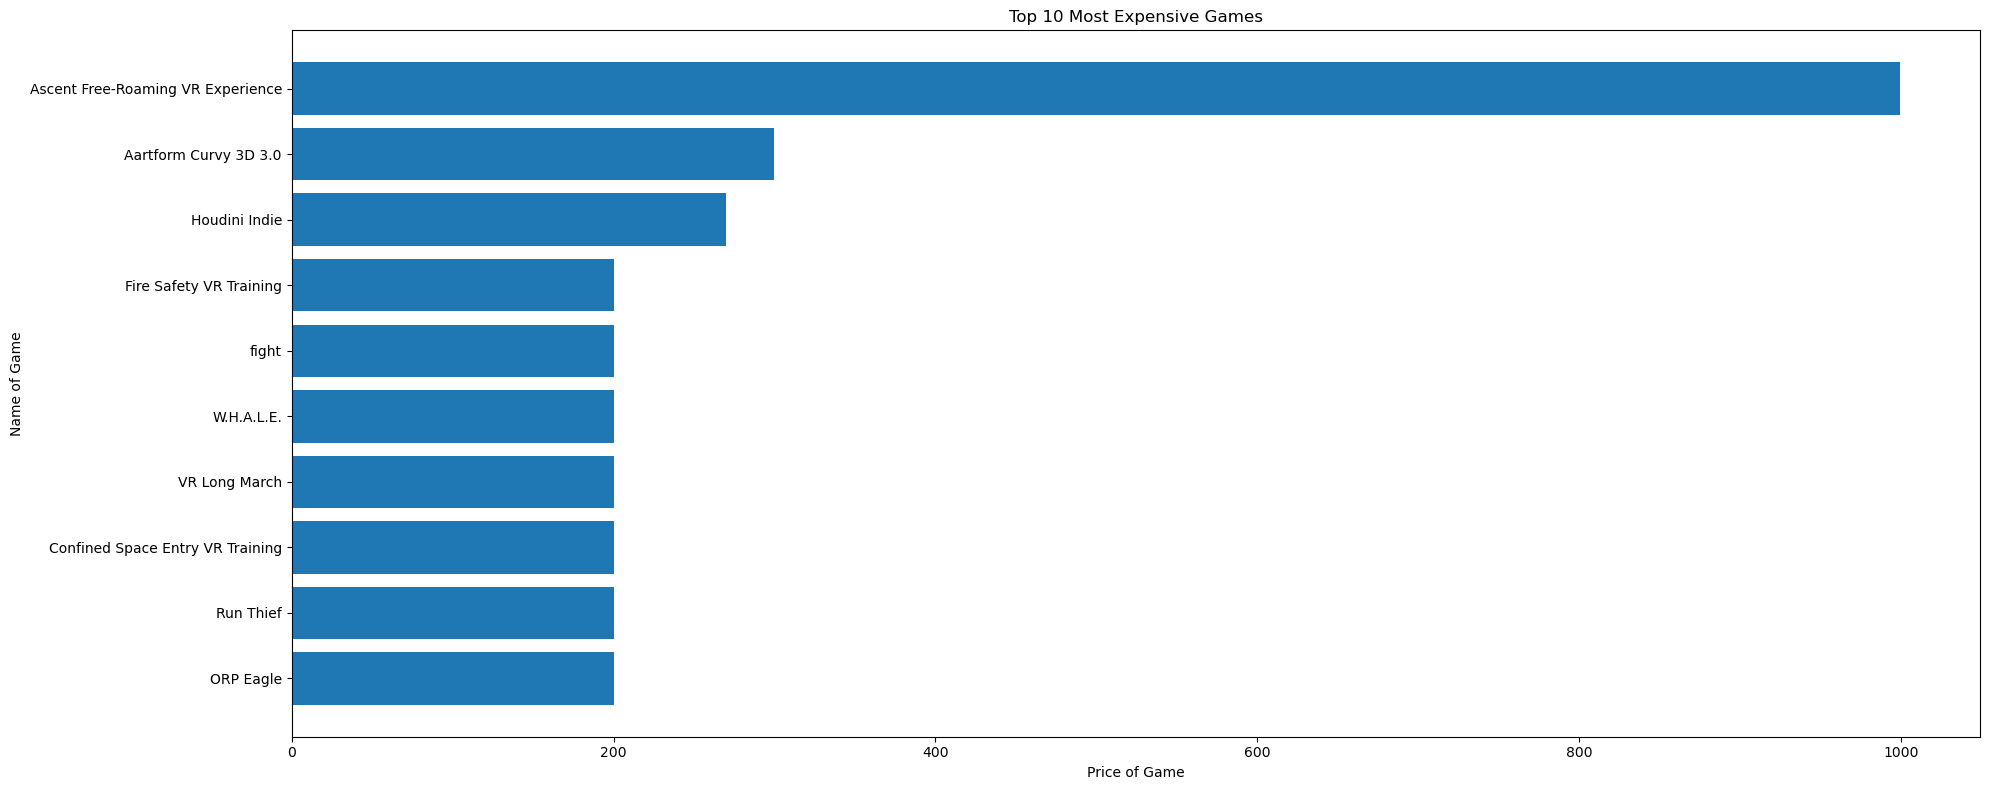

In [61]:
# Visualization of pricing difference between top most expensive game and all other games after that.
price = games[['Name', 'Price']].sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(20,8))
plt.barh(y=price['Name'], width=price['Price'])
plt.xlabel('Price of Game')
plt.ylabel('Name of Game')
plt.title('Top 10 Most Expensive Games')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The most expensive game on Steam is Ascent Free-Roaming VR Experience, which is a virtual reality experience. It is a significant outlier option as it costs USD$999 and fills a very niche experience. 

Having distinctive games is important as there is a possibility that someone will want to have this experience.

**`DLC count`**

In [40]:
# Checking top 5 games with most downloadable content (DLC)
games[['Name', 'DLC count']].sort_values(by='DLC count', ascending=False).head()

Name  DLC count
AppID                                                   
1196310                 Fantasy Grounds Unity       2366
252690                Fantasy Grounds Classic       1968
221680   Rocksmith® 2014 Edition - Remastered       1555
24010                 Train Simulator Classic        678
363890                           RPG Maker MV        579

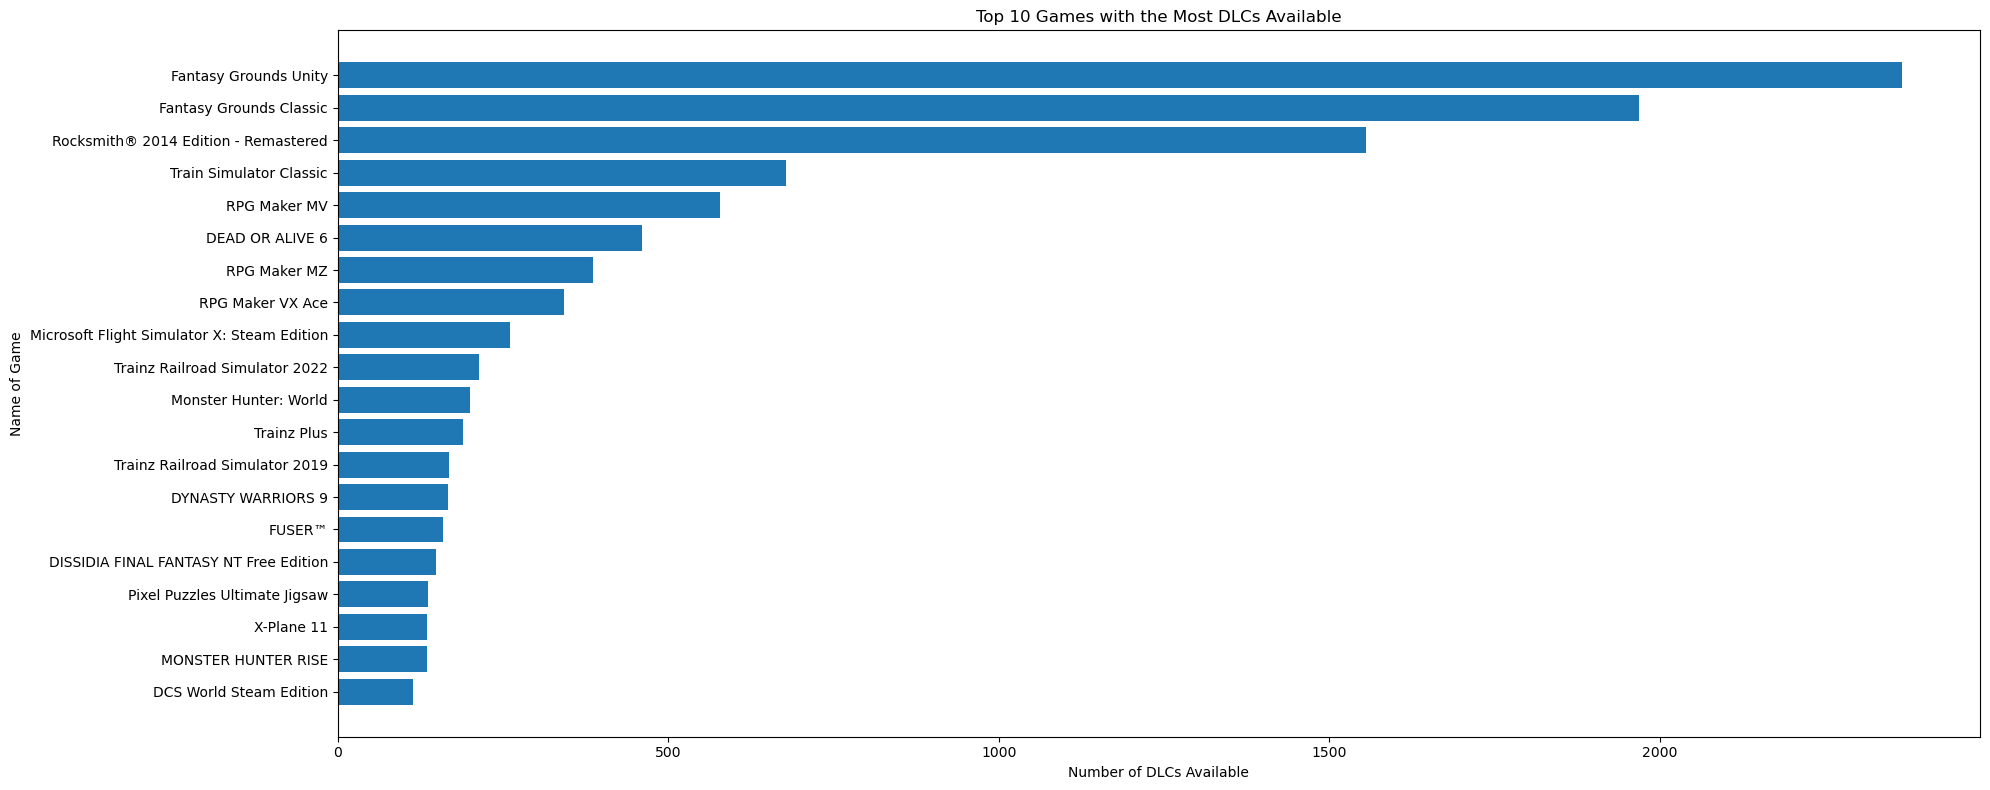

In [63]:
# Visual difference in DLC count of top 20 'games'
dlc_counts = games[['Name', 'DLC count']].sort_values(by='DLC count', ascending=False).head(20)

plt.figure(figsize=(20,8))
plt.barh(y=dlc_counts['Name'], width=dlc_counts['DLC count'])
plt.xlabel('Number of DLCs Available')
plt.ylabel('Name of Game')
plt.title('Top 10 Games with the Most DLCs Available')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Why do the top 3 'Games' have so many DLCs?
- Fantasy Grounds Unity is a virtual tabletop 'game' with the most DLC of any game within the dataset, at 2,366. This is likely due to the nature of the game as a virtual space to play tabletop games, with those DLC being different board games.
- Fantasy Grouns Classic is the same as the above, just the older version of it that allows creation and play of RPG games. 
- Rocksmith® 2014 Edition - Remastered appears to be a 'game' that teaches guitar, with the DLC being different songs to play (lots of songs that exist equals to high number of DLC).

In [287]:
# Checking the most common DLC count
games['DLC count'].value_counts().head(3)

0    59636
1     7026
2     1735
Name: DLC count, dtype: int64

In [280]:
# Fraction of top 3 DLC counts of all games
games['DLC count'].value_counts().head(3).sum()/games.shape[0]

0.9693040261893627

The reality is that most games do not have any DLC or very few. About 84.5% of games have 0 DLC. And 96.9% have between 0-2 DLC. It can be seen that having DLC content is not the normal pattern for most games. 

**`Achievements`**

In [43]:
# Checking the top 10 games with the most number of achievements available
games[['Name', 'Achievements']].sort_values(by='Achievements', ascending=False).head(10)

Name  Achievements
AppID                                                       
573060                              LOGistICAL          9821
640310                           Drive-By Hero          5394
805360            Trivia Vault Baseball Trivia          5000
730220  Trivia Vault: Video Game Trivia Deluxe          5000
822460        Trivia Vault: Auto Racing Trivia          5000
689180             Trivia Vault: 1980's Trivia          5000
821520             Trivia Vault: Boxing Trivia          5000
754120                         Ninja Stealth 3          5000
781760      Trivia Vault: Health Trivia Deluxe          5000
796900            Trivia Vault: Mixed Trivia 2          5000

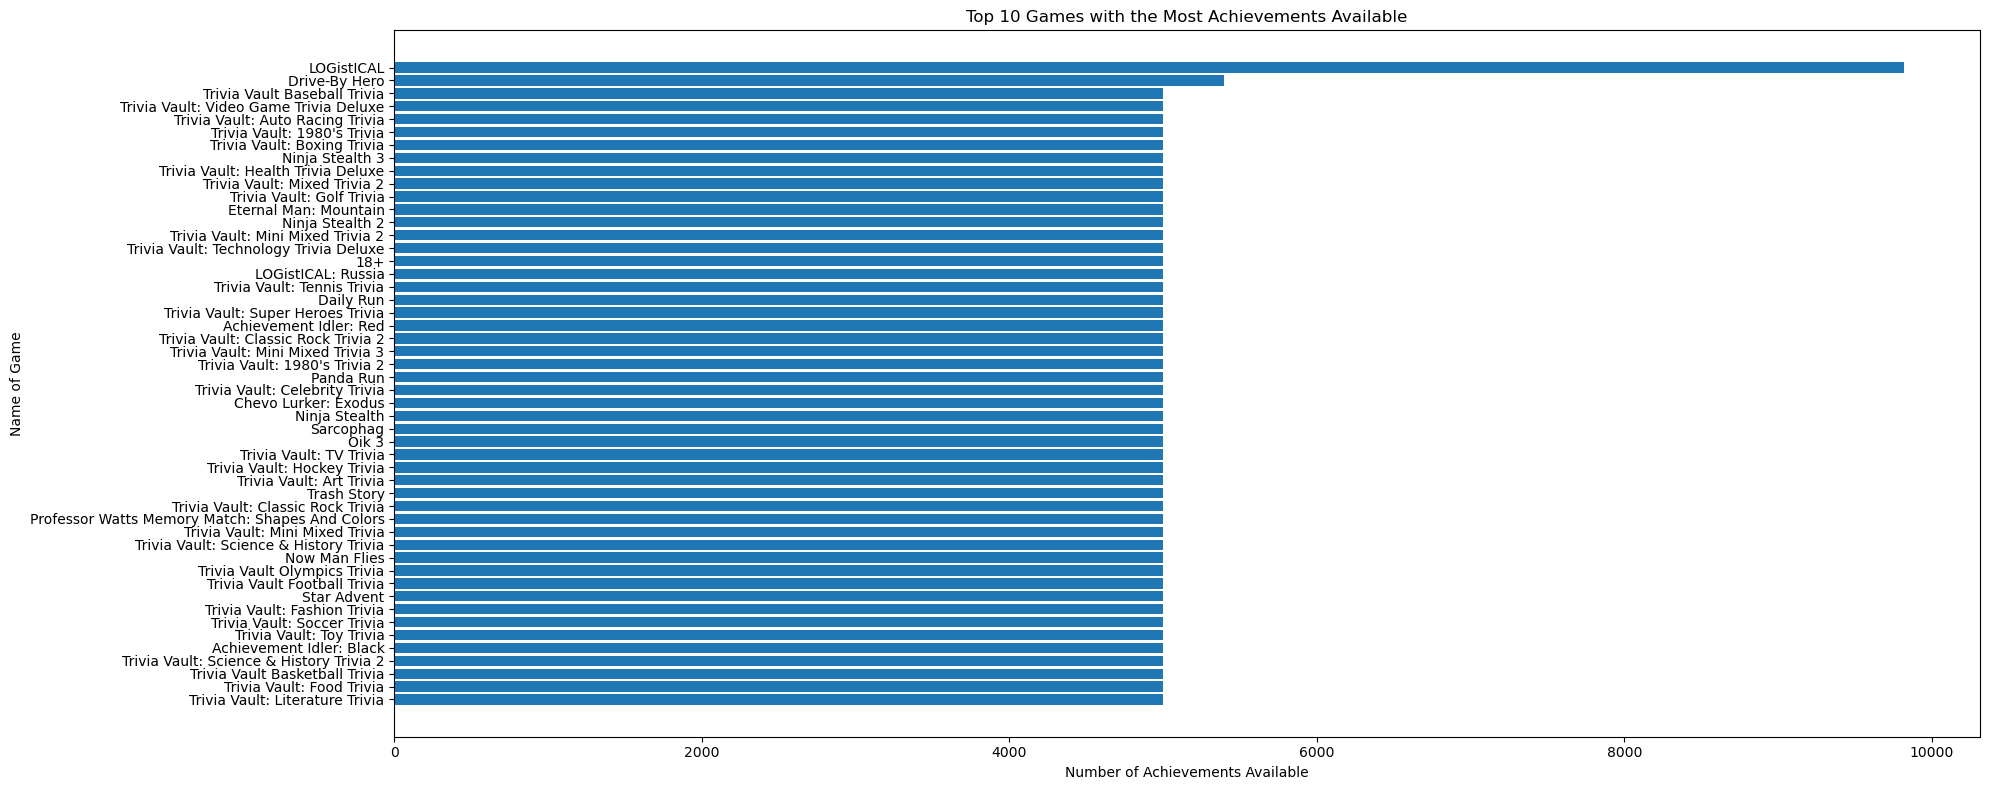

In [65]:
# Visualizing top 50 games with most number of achievements available
achievement_counts = games[['Name', 'Achievements']].sort_values(by='Achievements', ascending=False).head(50)

plt.figure(figsize=(20,8))
plt.barh(y=achievement_counts['Name'], width=achievement_counts['Achievements'])
plt.xlabel('Number of Achievements Available')
plt.ylabel('Name of Game')
plt.title('Top 10 Games with the Most Achievements Available')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

LOGistICAL is a strategy puzzle game that was released February of 2017. It has the most possible number of achievements that can be obtained on Steam, which is almost double the next highest number of achievements possible.

There are a surprising number of games that have 5000 available achievements given that the graph above contains 50 games. However, breaking down the actual counts shows that this high value is not a common occurence. 

In [286]:
# The 20 most common number of achievements per game
games['Achievements'].value_counts().head(20)

0     33590
10     1875
12     1455
20     1331
15     1219
6      1196
5      1189
8      1134
11     1106
13     1079
7      1049
14     1049
16     1041
9      1037
18      853
21      813
24      795
30      785
17      760
1       733
Name: Achievements, dtype: int64

In [288]:
# Fraction of all games with no achievements available
games['Achievements'].value_counts().head(1).sum()/games.shape[0]

0.4760285135269192

By contrast, games without achievements to be earned make up less than half of all games within the dataset (at around 47.6% having no earnable achievements). Otherwise, when there are achievements to be earned, there are usually more than 1 and it appears around a 10 to 20 range is not uncommon. 

### Examining Categorical Columns

In [66]:
# Import the MultiLabelBinarizer library if code does not run. 
# from sklearn.preprocessing import MultiLabelBinarizer

# Converting multiple labels into binary as a means of one hot encoding, instantiating model
mlb = MultiLabelBinarizer(sparse_output=True)

In [67]:
# Import the OneHotEncoder library if code does not run.
# from sklearn.preprocessing import OneHotEncoder

# Instantiating OneHotEncoder for later use. 
ohe = OneHotEncoder()

In [47]:
categorical.shape

(70563, 10)

In [68]:
categorical.columns

Index(['Name', 'Estimated owners', 'About the game', 'Supported languages',
       'Full audio languages', 'Developers', 'Publishers', 'Categories',
       'Genres', 'Tags'],
      dtype='object')

There are 10 categorical columns that may need to be addressed. `Name` is a unique identifier that will not be encoded; it will be dropped into another dataframe with `AppID` and `Name`, so that it can be used as a game reference list. 

#### `Estimated owners`

In [69]:
games['Estimated owners'].nunique()

14

In [70]:
games['Estimated owners'].value_counts()

0 - 20000                47902
20000 - 50000             7284
0 - 0                     5510
50000 - 100000            3615
100000 - 200000           2409
200000 - 500000           2026
500000 - 1000000           868
1000000 - 2000000          489
2000000 - 5000000          313
5000000 - 10000000          85
10000000 - 20000000         37
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

It can be seen that there is 1 game that has an overwhelming number of owners/players, and 4 other games that come second in number of owners/players. 

In [51]:
games[games['Estimated owners']=='100000000 - 200000000']

Name       Estimated owners  Required age  Price  DLC count  \
AppID                                                                  
570    Dota 2  100000000 - 200000000             0    0.0          2   

                                          About the game  \
AppID                                                      
570    The most-played game on Steam. Every day, mill...   

                                     Supported languages  \
AppID                                                      
570    ['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...   

                                    Full audio languages  Windows  Mac  Linux  \
AppID                                                                           
570    ['English', 'Korean', 'Simplified Chinese', 'V...        1    1      1   

       Metacritic score  Positive  Negative  Achievements  Recommendations  \
AppID                                                                        
570                  90   1477153    300437             0            14300   

       Median playtime forever Developers Publishers  \
AppID                                                  
570                        880      Valve      Valve   

                                              Categories  \
AppID                                                      
570    Multi-player,Co-op,Steam Trading Cards,Steam W...   

                             Genres  \
AppID                                 
570    Action,Free to Play,Strategy   

                                                    Tags  Release year  \
AppID                                                                    
570    Free to Play,MOBA,Multiplayer,Strategy,e-sport...          2013   

       Release month  
AppID                 
570                7

**The most owned game on Steam is Dota 2, which is a free MOBA game that was released on July of 2013.** It is interesting to note that it is not the most positively voted game nor the most recommended game, despite being the game with the most owners. This could likely be a result of the fact that it is a free game, so many people will try it; however, because the MOBA genre of games has a large learning curve, not many players will persist with the game. 

In [52]:
games[games['Estimated owners']=='50000000 - 100000000']

Name      Estimated owners  Required age  \
AppID                                                                           
440                       Team Fortress 2  50000000 - 100000000             0   
730      Counter-Strike: Global Offensive  50000000 - 100000000             0   
578080                PUBG: BATTLEGROUNDS  50000000 - 100000000             0   
1063730                         New World  50000000 - 100000000             0   

         Price  DLC count                                     About the game  \
AppID                                                                          
440       0.00          1  The most fun you can have online - PC Gamer Is...   
730       0.00          1  Counter-Strike: Global Offensive (CS: GO) expa...   
578080    0.00          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
1063730  39.99          0  Explore a thrilling, open-world MMO filled wit...   

                                       Supported languages  \
AppID                                                        
440      ['English', 'Danish', 'Dutch', 'Finnish', 'Fre...   
730      ['Czech', 'Danish', 'Dutch', 'English', 'Finni...   
578080   ['English', 'Korean', 'Simplified Chinese', 'F...   
1063730  ['English', 'French', 'Italian', 'German', 'Sp...   

                                      Full audio languages  Windows  Mac  \
AppID                                                                      
440                               ['English', 'Ukrainian']        1    1   
730                              ['English', 'Vietnamese']        1    1   
578080                                                  []        1    0   
1063730  ['English', 'French', 'Italian', 'German', 'Sp...        1    0   

         Linux  Metacritic score  Positive  Negative  Achievements  \
AppID                                                                
440          1                92    823693     56683           520   
730          1                83   5764420    766677           167   
578080       0                 0   1154655    895978            37   
1063730      0                70    154914     73900           133   

         Recommendations  Median playtime forever  \
AppID                                               
440                14410                      370   
730              3441592                     6357   
578080           1616422                     7134   
1063730           196597                     3093   

                              Developers     Publishers  \
AppID                                                     
440                                Valve          Valve   
730      Valve,Hidden Path Entertainment          Valve   
578080                     KRAFTON, Inc.  KRAFTON, Inc.   
1063730                     Amazon Games   Amazon Games   

                                                Categories  \
AppID                                                        
440      Multi-player,Cross-Platform Multiplayer,Steam ...   
730      Multi-player,Steam Achievements,Full controlle...   
578080   Multi-player,PvP,Online PvP,Stats,Remote Play ...   
1063730  Multi-player,MMO,PvP,Online PvP,Co-op,Online C...   

                                                    Genres  \
AppID                                                        
440                                    Action,Free to Play   
730                                    Action,Free to Play   
578080   Action,Adventure,Free to Play,Massively Multip...   
1063730         Action,Adventure,Massively Multiplayer,RPG   

                                                      Tags  Release year  \
AppID                                                                      
440      Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...          2007   
730      FPS,Shooter,Multiplayer,Competitive,Action,Tea...          2012   
578080   Survival,Shooter,Multiplayer,Battle Royale,FPS...          2017   
1063730  Massively

**Of the other 4 games that come second in player/owner number, only 1 costs money.**
- Team Fortress 2 (TF2) is a free FPS game released in October 2007.
- Counter-Strike Global Offensive (CS:GO) is also an FPS game released August 2012.
- PUBG is also an FPS game released December 2017. 

It appears that shooter games are very popular, especially those that are free. Chances are that when making a recommender system, the user requesting the recommendation will already own at least one of the above 3 games. 

TF2 and CS:GO are both team based (competitive) multiplayer shooters, while PUBG is a battle royale style shooter (which came into wider market prominance in the late 2010s alongside Fortnite). 


The outlier:
- New World costs USD$39.99 and it is not a FPS (shooter). It is a MMORPG (Massively Multiplayer Online Role Playing Game) that was released in September 2021. The fact that it was released in 2021 and has become one of the top 5 owned games on Steam is of note--this is a likely an outlier. 

Since there is no data on the exact number of owners for each game and only approximate grouping are available, these groupings will be one hot encoded as a means to show high number of ownership vs low number of ownership. 

In [53]:
# Creating dummy variables
est_owners = pd.get_dummies(games['Estimated owners']).add_prefix('est_owners_')

In [54]:
# Checking dummies
est_owners.head()

est_owners_0 - 0  est_owners_0 - 20000  est_owners_100000 - 200000  \
AppID                                                                       
10                    0                     0                           0   
20                    0                     0                           0   
30                    0                     0                           0   
40                    0                     0                           0   
50                    0                     0                           0   

       est_owners_1000000 - 2000000  est_owners_10000000 - 20000000  \
AppID                                                                 
10                                0                               1   
20                                0                               0   
30                                0                               0   
40                                0                               0   
50                                0                               0   

       est_owners_100000000 - 200000000  est_owners_20000 - 50000  \
AppID                                                               
10                                    0                         0   
20                                    0                         0   
30                                    0                         0   
40                                    0                         0   
50                                    0                         0   

       est_owners_200000 - 500000  est_owners_2000000 - 5000000  \
AppID                                                             
10                              0                             0   
20                              0                             0   
30                              0                             0   
40                              0                             0   
50                              0                             0   

       est_owners_20000000 - 50000000  est_owners_50000 - 100000  \
AppID                                                              
10                                  0                          0   
20                                  0                          0   
30                                  0                          0   
40                                  0                          0   
50                                  0                          0   

       est_owners_500000 - 1000000  est_owners_5000000 - 10000000  \
AppID                                                               
10                               0                              0   
20                               0                              1   
30                               0                              1   
40                               0                              1   
50                               0                              1   

       est_owners_50000000 - 100000000  
AppID                                   
10                                   0  
20                                   0  
30                                   0  
40                                   0  
50                                   0

In [55]:
# Concatenating onto original game dataframe
games = pd.concat((games,est_owners), axis=1, join='inner')

In [56]:
# Dropping original column
games.drop(columns=['Estimated owners'], axis=1, inplace=True)

In [57]:
# Result check
games.head()

Name  Required age  Price  DLC count  \
AppID                                                              
10                Counter-Strike             0   9.99          0   
20         Team Fortress Classic             0   4.99          0   
30                 Day of Defeat             0   4.99          0   
40            Deathmatch Classic             0   4.99          0   
50     Half-Life: Opposing Force             0   4.99          0   

                                          About the game  \
AppID                                                      
10     Play the world's number 1 online action game. ...   
20     One of the most popular online action games of...   
30     Enlist in an intense brand of Axis vs. Allied ...   
40     Enjoy fast-paced multiplayer gaming with Death...   
50     Return to the Black Mesa Research Facility as ...   

                                     Supported languages  \
AppID                                                      
10     ['English', 'French', 'German', 'Italian', 'Sp...   
20     ['English', 'French', 'German', 'Italian', 'Sp...   
30     ['English', 'French', 'German', 'Italian', 'Sp...   
40     ['English', 'French', 'German', 'Italian', 'Sp...   
50             ['English', 'French', 'German', 'Korean']   

                                    Full audio languages  Windows  Mac  Linux  \
AppID                                                                           
10     ['English', 'French', 'German', 'Italian', 'Sp...        1    1      1   
20                                                    []        1    1      1   
30                                                    []        1    1      1   
40                                                    []        1    1      1   
50                                                    []        1    1      1   

       Metacritic score  Positive  Negative  Achievements  Recommendations  \
AppID                                                                        
10                   88    198387      5135             0           122770   
20                    0      5677       923             0             4722   
30                   79      5179       566             0             3246   
40                    0      1929       428             0             1570   
50                    0     14333       718             0            12374   

       Median playtime forever        Developers Publishers  \
AppID                                                         
10                         228             Valve      Valve   
20                          23             Valve      Valve   
30                          27             Valve      Valve   
40                          10             Valve      Valve   
50                          66  Gearbox Software      Valve   

                                              Categories  Genres  \
AppID                                                              
10     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
20     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
30                 Multi-player,Valve Anti-Cheat enabled  Action   
40     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
50     Single-player,Multi-player,Valve Anti-Cheat en...  Action   

                                                    Tags  Release year  \
AppID                                                                    
10     Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...          2000   
20     Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...          1999   
30     FPS,World War II,Multiplayer,Shooter,Action,Wa...          2003   
40     Action,FPS,Classic,Multiplayer,Shooter,First-P...          2001   
50     FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...          1999   

       Release month  est_owners_0 - 0  est_owners_0 - 20000  \
AppID                                                          
10                11        

**`About the game`**

`About the game` requires NLP processing techniques to parse. The Tfidf Vectorizer will be used to extract tokens for analysis. This will be completed during the modeling stage to allow for comparison of games based on similarity of their game descriptions. 

In [58]:
# Creating new dataframe with only AppID (index), game name and game description
game_description = games[['Name', 'About the game']]

In [59]:
# Checking result
game_description.head()

Name  \
AppID                              
10                Counter-Strike   
20         Team Fortress Classic   
30                 Day of Defeat   
40            Deathmatch Classic   
50     Half-Life: Opposing Force   

                                          About the game  
AppID                                                     
10     Play the world's number 1 online action game. ...  
20     One of the most popular online action games of...  
30     Enlist in an intense brand of Axis vs. Allied ...  
40     Enjoy fast-paced multiplayer gaming with Death...  
50     Return to the Black Mesa Research Facility as ...

In [60]:
# Exporting out as a new .csv
game_description.to_csv('clean_data/game_description.csv')

In [61]:
# Dropping original column from dataframe
games = games.drop(columns=['About the game'], axis=1)

In [62]:
# Checking result
games.head()

Name  Required age  Price  DLC count  \
AppID                                                              
10                Counter-Strike             0   9.99          0   
20         Team Fortress Classic             0   4.99          0   
30                 Day of Defeat             0   4.99          0   
40            Deathmatch Classic             0   4.99          0   
50     Half-Life: Opposing Force             0   4.99          0   

                                     Supported languages  \
AppID                                                      
10     ['English', 'French', 'German', 'Italian', 'Sp...   
20     ['English', 'French', 'German', 'Italian', 'Sp...   
30     ['English', 'French', 'German', 'Italian', 'Sp...   
40     ['English', 'French', 'German', 'Italian', 'Sp...   
50             ['English', 'French', 'German', 'Korean']   

                                    Full audio languages  Windows  Mac  Linux  \
AppID                                                                           
10     ['English', 'French', 'German', 'Italian', 'Sp...        1    1      1   
20                                                    []        1    1      1   
30                                                    []        1    1      1   
40                                                    []        1    1      1   
50                                                    []        1    1      1   

       Metacritic score  Positive  Negative  Achievements  Recommendations  \
AppID                                                                        
10                   88    198387      5135             0           122770   
20                    0      5677       923             0             4722   
30                   79      5179       566             0             3246   
40                    0      1929       428             0             1570   
50                    0     14333       718             0            12374   

       Median playtime forever        Developers Publishers  \
AppID                                                         
10                         228             Valve      Valve   
20                          23             Valve      Valve   
30                          27             Valve      Valve   
40                          10             Valve      Valve   
50                          66  Gearbox Software      Valve   

                                              Categories  Genres  \
AppID                                                              
10     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
20     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
30                 Multi-player,Valve Anti-Cheat enabled  Action   
40     Multi-player,PvP,Online PvP,Shared/Split Scree...  Action   
50     Single-player,Multi-player,Valve Anti-Cheat en...  Action   

                                                    Tags  Release year  \
AppID                                                                    
10     Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...          2000   
20     Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...          1999   
30     FPS,World War II,Multiplayer,Shooter,Action,Wa...          2003   
40     Action,FPS,Classic,Multiplayer,Shooter,First-P...          2001   
50     FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...          1999   

       Release month  est_owners_0 - 0  est_owners_0 - 20000  \
AppID                                                          
10                11                 0                     0   
20                 4                 0                     0   
30                 5                 0                     0   
40                 6                 0                     0   
50                11                 0                     0   

       est_owners_100000 - 200000  est_owners_1000000 - 2000000  \
AppID                                                        

#### `Supported languages`

In [63]:
# Sampling what this column looks like
list(games['Supported languages'].sample(5))

["['English']",
 "['English', 'Portuguese - Brazil']",
 "['English', 'French', 'German', 'Spanish - Spain', 'Portuguese - Brazil', 'Polish', 'Russian', 'Simplified Chinese', 'Traditional Chinese', 'Japanese', 'Korean']",
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Simplified Chinese', 'Traditional Chinese']",
 "['English']"]

In [65]:
# Checking number of unique languages
games['Supported languages'].str.split(',').explode().str.strip('[\' ]').nunique()

133

In [66]:
# Checking counts/presence of languages
games['Supported languages'].str.split(',').explode().str.strip('[\' ]').value_counts().head(10)

English                67623
Simplified Chinese     16096
German                 16009
French                 15523
Russian                15084
Spanish - Spain        14345
Japanese               12802
Italian                10806
Korean                  8159
Portuguese - Brazil     8117
Name: Supported languages, dtype: int64

English is the top most, dominantly supported language on all games. 

In [67]:
print(f'English is the top supported language, making up {round(67623/70563*100, 2)}% of all game entries in the data set.')

English is the top supported language, making up 95.83% of all game entries in the data set.


In [68]:
print(f'Chinese is the second supported language, making up only {round(16096/70563*100, 2)}% of all game entries in the data set.')

Chinese is the second supported language, making up only 22.81% of all game entries in the data set.


While it is unsurprising that Chinese is the second most commonly supported language (in part due to the large population of Chinese individuals and in part from USA, China and Russia being some of the top markets for Steam users), it is surprising that German is the third most commonly supported language given the smaller population of German literate individuals. 

The supported languages can also be one hot encoded:

In [72]:
# Creating new dataframe with exploded list of languages for each game
exploded_languages = pd.DataFrame(games['Supported languages'].str.split(',').explode().str.strip('[\' ]'))

In [74]:
# Checking a sample of AppID - languages
exploded_languages.sample(20)

Supported languages
AppID                           
748360           Spanish - Spain
1201910                    Dutch
809830                   Russian
1516760  Spanish - Latin America
1495110                  English
677340                    Korean
462380       Traditional Chinese
45420                    English
1982680                   French
2298610                    Scots
772100                   English
579780                   English
804350                    German
1420950                   Danish
1891230                    Czech
1013130          Spanish - Spain
1085880                  Russian
1397940                  English
365860                   English
1614270               Portuguese

In [76]:
# Converting table so that languages are columns, rows comprise of only 1 instannce of each unqiue AppID and values are the presence (1) or absence (0) of language support.
ohe_languages = pd.pivot_table(exploded_languages, 
                               index=exploded_languages.index, 
                               columns=exploded_languages['Supported languages'].values, aggfunc='size').add_prefix('language_')

In [77]:
# Checking a sample result
ohe_languages.sample(10)

language_  language_#lang_français  language_Afrikaans  \
AppID                                                             
493710         NaN                      NaN                 NaN   
1848890        NaN                      NaN                 NaN   
2151480        NaN                      NaN                 NaN   
1201530        NaN                      NaN                 NaN   
1177460        NaN                      NaN                 NaN   
457320         NaN                      NaN                 NaN   
587420         NaN                      NaN                 NaN   
848460         NaN                      NaN                 NaN   
819940         NaN                      NaN                 NaN   
1239580        NaN                      NaN                 NaN   

         language_Albanian  language_Amharic  language_Arabic  \
AppID                                                           
493710                 NaN               NaN              NaN   
1848890                NaN               NaN              NaN   
2151480                NaN               NaN              NaN   
1201530                NaN               NaN              NaN   
1177460                NaN               NaN              NaN   
457320                 NaN               NaN              NaN   
587420                 NaN               NaN              NaN   
848460                 NaN               NaN              NaN   
819940                 NaN               NaN              NaN   
1239580                NaN               NaN              NaN   

         language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                                 
493710                 NaN                NaN                   NaN   
1848890                NaN                NaN                   NaN   
2151480                NaN                NaN                   NaN   
1201530                NaN                NaN                   NaN   
1177460                NaN                NaN                   NaN   
457320                 NaN                NaN                   NaN   
587420                 NaN                NaN                   NaN   
848460                 NaN                NaN                   NaN   
819940                 NaN                NaN                   NaN   
1239580                NaN                NaN                   NaN   

         language_Bangla  language_Basque  language_Belarusian  \
AppID                                                            
493710               NaN              NaN                  NaN   
1848890              NaN              NaN                  NaN   
2151480              NaN              NaN                  NaN   
1201530              NaN              NaN                  NaN   
1177460              NaN              NaN                  NaN   
457320               NaN              NaN                  NaN   
587420               NaN              NaN                  NaN   
848460               NaN              NaN                  NaN   
819940               NaN              NaN                  NaN   
1239580              NaN              NaN                  NaN   

         language_Bosnian  language_Bulgarian  language_Catalan  \
AppID                                                             
493710                NaN                 NaN               NaN   
1848890               NaN                 NaN               NaN   
2151480               NaN                 NaN               NaN   
1201530               NaN                 NaN               NaN   
1177460               NaN                 NaN               NaN   
457320                NaN                 NaN               NaN   
587420                NaN                 NaN               NaN   
848460                NaN                 NaN               NaN   
819940                NaN                 NaN               NaN   
1239580               NaN               

While looking through the columns, it can be seen that some have strange formatting and the information they provide is duplicate language support. 

**Example:**
`language_Italian \r\n\r\n[b][/b` and `language_Italian&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;` are both columns indicating `language_Italian` support. These duplicated, problematic columns need to be combined down to just the `language_Italian` column. 

These need to be fixed; unfortunately, there is no common pattern associated with this issue, so these problematic columns need to be manually corrected as below:

In [74]:
# No indication of language support
ohe_languages.loc[ohe_languages['language_']==1]

language_  language_#lang_français  language_Afrikaans  \
AppID                                                             
596560         1.0                      NaN                 NaN   
654970         1.0                      NaN                 NaN   
803840         1.0                      NaN                 NaN   
948070         1.0                      NaN                 NaN   
1092950        1.0                      NaN                 NaN   
1103300        1.0                      NaN                 NaN   
1116910        1.0                      NaN                 NaN   
1366270        1.0                      NaN                 NaN   
1486720        1.0                      NaN                 NaN   
1610020        1.0                      NaN                 NaN   
1784980        1.0                      NaN                 NaN   
1785560        1.0                      NaN                 NaN   
1957650        1.0                      NaN                 NaN   
2155680        1.0                      NaN                 NaN   
2353410        1.0                      NaN                 NaN   
2408180        1.0                      NaN                 NaN   
2415180        1.0                      NaN                 NaN   
2436400        1.0                      NaN                 NaN   

         language_Albanian  language_Amharic  language_Arabic  \
AppID                                                           
596560                 NaN               NaN              NaN   
654970                 NaN               NaN              NaN   
803840                 NaN               NaN              NaN   
948070                 NaN               NaN              NaN   
1092950                NaN               NaN              NaN   
1103300                NaN               NaN              NaN   
1116910                NaN               NaN              NaN   
1366270                NaN               NaN              NaN   
1486720                NaN               NaN              NaN   
1610020                NaN               NaN              NaN   
1784980                NaN               NaN              NaN   
1785560                NaN               NaN              NaN   
1957650                NaN               NaN              NaN   
2155680                NaN               NaN              NaN   
2353410                NaN               NaN              NaN   
2408180                NaN               NaN              NaN   
2415180                NaN               NaN              NaN   
2436400                NaN               NaN              NaN   

         language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                                 
596560                 NaN                NaN                   NaN   
654970                 NaN                NaN                   NaN   
803840                 NaN                NaN                   NaN   
948070                 NaN                NaN                   NaN   
1092950                NaN                NaN                   NaN   
1103300                NaN                NaN                   NaN   
1116910                NaN                NaN                   NaN   
1366270                NaN                NaN                   NaN   
1486720                NaN                NaN                   NaN   
1610020                NaN                NaN                   NaN   
1784980                NaN                NaN                   NaN   
1785560                NaN                NaN                   NaN   
1957650                NaN                NaN                   NaN   
2155680                NaN                NaN                   NaN   
2353410                NaN                NaN                   NaN   
2408180                NaN                NaN                   NaN   
2415180                NaN                NaN                   NaN   
2436400           

In [75]:
# Dropping column that provides no language information
ohe_languages.drop(columns='language_', axis=1, inplace=True)

In [76]:
# Assigning values from games with language_#lang_français=1 to the more common language_French
ohe_languages.loc[(ohe_languages['language_#lang_français']==1), 'language_French']=1

In [77]:
# Finding which games have language_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;=1
ohe_languages.loc[(ohe_languages['language_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
29540                      NaN                 NaN                NaN   
29560                      NaN                 NaN                NaN   
29580                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
29540               NaN              NaN                NaN   
29560               NaN              NaN                NaN   
29580               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
29540                NaN                   NaN              NaN   
29560                NaN                   NaN              NaN   
29580                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
29540              NaN                  NaN               NaN   
29560              NaN                  NaN               NaN   
29580              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
29540                 NaN               NaN                NaN   
29560                 NaN               NaN                NaN   
29580                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
29540                NaN             NaN              NaN            NaN   
29560                NaN             NaN              NaN            NaN   
29580                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
29540             NaN               NaN                            NaN   
29560             NaN               NaN                            NaN   
29580             NaN               NaN                            NaN   

       language_English Dutch  English  \
AppID                                    
29540                              NaN   
29560                              NaN   
29580                              NaN   

       language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                                  
29540                                                1.0               
29560                                                1.0               
29580                                                1.0               

       language_English[b][/b  \
AppID                           
29540                     NaN   
29560                     NaN   
29580                     NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
29540                                                NaN                     
29560                                                NaN                     
29580                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
29540                NaN                NaN               NaN   
29560                NaN                NaN               NaN   
29580                NaN                NaN               NaN   

       language_French  \
AppID                    
29540              NaN   
29560              NaN   
29580              Na

In [78]:
# Re-assigning the intended language support to 1
ohe_languages.loc[[29540,29560,29580], 
                  ['language_English', 
                   'language_French',
                   'language_German',
                   'language_Italian',
                   'language_Japanese',
                   'language_Korean',
                   'language_Spanish - Spain',]] = 1

In [79]:
# Dropping problematic language columns that have been resolved
ohe_languages.drop(columns=['language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_German&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_Italian&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_Japanese &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt;&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_Korean&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                            'language_Spanish - Spain&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;'
                           ], axis=1, inplace=True)

For the above 3 `AppID`s, it was noted that multiple language columns were affected (and no other games outside the 3 had these affected columns); so all the affected columns were addressed at one time. 

In [78]:
# Checking remaining problem columns
ohe_languages.head()

language_  language_#lang_français  language_Afrikaans  \
AppID                                                           
10           NaN                      NaN                 NaN   
20           NaN                      NaN                 NaN   
30           NaN                      NaN                 NaN   
40           NaN                      NaN                 NaN   
50           NaN                      NaN                 NaN   

       language_Albanian  language_Amharic  language_Arabic  \
AppID                                                         
10                   NaN               NaN              NaN   
20                   NaN               NaN              NaN   
30                   NaN               NaN              NaN   
40                   NaN               NaN              NaN   
50                   NaN               NaN              NaN   

       language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                               
10                   NaN                NaN                   NaN   
20                   NaN                NaN                   NaN   
30                   NaN                NaN                   NaN   
40                   NaN                NaN                   NaN   
50                   NaN                NaN                   NaN   

       language_Bangla  language_Basque  language_Belarusian  \
AppID                                                          
10                 NaN              NaN                  NaN   
20                 NaN              NaN                  NaN   
30                 NaN              NaN                  NaN   
40                 NaN              NaN                  NaN   
50                 NaN              NaN                  NaN   

       language_Bosnian  language_Bulgarian  language_Catalan  \
AppID                                                           
10                  NaN                 NaN               NaN   
20                  NaN                 NaN               NaN   
30                  NaN                 NaN               NaN   
40                  NaN                 NaN               NaN   
50                  NaN                 NaN               NaN   

       language_Cherokee  language_Croatian  language_Czech  language_Danish  \
AppID                                                                          
10                   NaN                NaN             NaN              NaN   
20                   NaN                NaN             NaN              NaN   
30                   NaN                NaN             NaN              NaN   
40                   NaN                NaN             NaN              NaN   
50                   NaN                NaN             NaN              NaN   

       language_Dari  language_Dutch  language_English  \
AppID                                                    
10               NaN             NaN               1.0   
20               NaN             NaN               1.0   
30               NaN             NaN               1.0   
40               NaN             NaN               1.0   
50               NaN             NaN               1.0   

       language_English (full audio)  language_English Dutch  English  \
AppID                                                                   
10                               NaN                              NaN   
20                               NaN                              NaN   
30                               NaN                              NaN   
40                               NaN                              NaN   
50                               NaN                              NaN   

       language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                                  
10                                                   NaN               
20                      

In [81]:
# Locating AppID of problematic column 
ohe_languages.loc[(ohe_languages['language_English (full audio)']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
31100                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
31100               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
31100                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
31100              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
31100                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
31100                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
31100             NaN               1.0                            1.0   

       language_English Dutch  English  language_English[b][/b  \
AppID                                                            
31100                              NaN                     NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
31100                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
31100                NaN                NaN               NaN   

       language_French  language_French[b][/b  language_Galician  \
AppID                                                              
31100              1.0                    NaN                NaN   

       language_Georgian  language_German  language_German;  \
AppID                                                         
31100                NaN              1.0               NaN   

       language_German[b][/b  language_Greek  language_Gujarati  \
AppID                                                             
31100                    NaN             NaN                NaN   

       language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                        
31100             NaN              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
31100                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Italian \r\n\r\n[b][/b  \
AppID                                                      
31100               1.0                              NaN   

       language_Italian[b][/b  language_Japanese  \
AppID                                              
31100                     NaN                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
31100                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
31100                               NaN              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                         

`language_English` is already correctly identified as 1 (supported). This column affects only a single game and is unnecessary considering the existence of the `Full audio languages` column. Will be dropped (done at the end with other single instance problem columns). 

In [82]:
# Locating problem
ohe_languages.loc[(ohe_languages['language_\\r\\nFrench']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
50990                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
50990               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
50990                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
50990              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
50990                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
50990                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
50990             NaN               1.0                            NaN   

       language_English Dutch  English  language_English[b][/b  \
AppID                                                            
50990                              NaN                     NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
50990                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
50990                NaN                NaN               NaN   

       language_French  language_French[b][/b  language_Galician  \
AppID                                                              
50990              NaN                    NaN                NaN   

       language_Georgian  language_German  language_German;  \
AppID                                                         
50990                NaN              NaN               NaN   

       language_German[b][/b  language_Greek  language_Gujarati  \
AppID                                                             
50990                    NaN             NaN                NaN   

       language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                        
50990             NaN              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
50990                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Italian \r\n\r\n[b][/b  \
AppID                                                      
50990               NaN                              NaN   

       language_Italian[b][/b  language_Japanese  \
AppID                                              
50990                     NaN                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
50990                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
50990                               NaN              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                         

In [83]:
# Correcting affected columns
ohe_languages.loc[[50990], 
                  ['language_French',
                   'language_German',
                  ]] = 1

In [84]:
# Dropping problematic columns
ohe_languages.drop(columns=['language_\\r\\nFrench',
                            'language_\\r\\nGerman'
                           ], axis=1, inplace=True)

In [79]:
# Checking results and checking remaining problematic columns
ohe_languages.head()

language_  language_#lang_français  language_Afrikaans  \
AppID                                                           
10           NaN                      NaN                 NaN   
20           NaN                      NaN                 NaN   
30           NaN                      NaN                 NaN   
40           NaN                      NaN                 NaN   
50           NaN                      NaN                 NaN   

       language_Albanian  language_Amharic  language_Arabic  \
AppID                                                         
10                   NaN               NaN              NaN   
20                   NaN               NaN              NaN   
30                   NaN               NaN              NaN   
40                   NaN               NaN              NaN   
50                   NaN               NaN              NaN   

       language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                               
10                   NaN                NaN                   NaN   
20                   NaN                NaN                   NaN   
30                   NaN                NaN                   NaN   
40                   NaN                NaN                   NaN   
50                   NaN                NaN                   NaN   

       language_Bangla  language_Basque  language_Belarusian  \
AppID                                                          
10                 NaN              NaN                  NaN   
20                 NaN              NaN                  NaN   
30                 NaN              NaN                  NaN   
40                 NaN              NaN                  NaN   
50                 NaN              NaN                  NaN   

       language_Bosnian  language_Bulgarian  language_Catalan  \
AppID                                                           
10                  NaN                 NaN               NaN   
20                  NaN                 NaN               NaN   
30                  NaN                 NaN               NaN   
40                  NaN                 NaN               NaN   
50                  NaN                 NaN               NaN   

       language_Cherokee  language_Croatian  language_Czech  language_Danish  \
AppID                                                                          
10                   NaN                NaN             NaN              NaN   
20                   NaN                NaN             NaN              NaN   
30                   NaN                NaN             NaN              NaN   
40                   NaN                NaN             NaN              NaN   
50                   NaN                NaN             NaN              NaN   

       language_Dari  language_Dutch  language_English  \
AppID                                                    
10               NaN             NaN               1.0   
20               NaN             NaN               1.0   
30               NaN             NaN               1.0   
40               NaN             NaN               1.0   
50               NaN             NaN               1.0   

       language_English (full audio)  language_English Dutch  English  \
AppID                                                                   
10                               NaN                              NaN   
20                               NaN                              NaN   
30                               NaN                              NaN   
40                               NaN                              NaN   
50                               NaN                              NaN   

       language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                                  
10                                                   NaN               
20                      

In [86]:
# Locating problematic columns
ohe_languages.loc[(ohe_languages['language_English\\r\\nRussian\\r\\nSpanish - Spain\\r\\nJapanese\\r\\nCzech']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
11260                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
11260               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
11260                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
11260              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
11260                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
11260                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
11260             NaN               NaN                            NaN   

       language_English Dutch  English  language_English[b][/b  \
AppID                                                            
11260                              NaN                     NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
11260                                                1.0                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
11260                NaN                NaN               NaN   

       language_French  language_French[b][/b  language_Galician  \
AppID                                                              
11260              NaN                    NaN                NaN   

       language_Georgian  language_German  language_German;  \
AppID                                                         
11260                NaN              NaN               NaN   

       language_German[b][/b  language_Greek  language_Gujarati  \
AppID                                                             
11260                    NaN             NaN                NaN   

       language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                        
11260             NaN              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
11260                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Italian \r\n\r\n[b][/b  \
AppID                                                      
11260               NaN                              NaN   

       language_Italian[b][/b  language_Japanese  \
AppID                                              
11260                     NaN                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
11260                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
11260                               NaN              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                         

In [87]:
# Cross-checking correct column on SteamDB and assigning to correct column value
ohe_languages.loc[11260, 'language_English'] = 1

In [88]:
# Locating problematic columns
ohe_languages.loc[(ohe_languages['language_Russian\\r\\nEnglish\\r\\nSpanish - Spain\\r\\nFrench\\r\\nJapanese\\r\\nCzech']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
11250                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
11250               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
11250                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
11250              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
11250                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
11250                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
11250             NaN               NaN                            NaN   

       language_English Dutch  English  language_English[b][/b  \
AppID                                                            
11250                              NaN                     NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
11250                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
11250                NaN                NaN               NaN   

       language_French  language_French[b][/b  language_Galician  \
AppID                                                              
11250              NaN                    NaN                NaN   

       language_Georgian  language_German  language_German;  \
AppID                                                         
11250                NaN              NaN               NaN   

       language_German[b][/b  language_Greek  language_Gujarati  \
AppID                                                             
11250                    NaN             NaN                NaN   

       language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                        
11250             NaN              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
11250                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Italian \r\n\r\n[b][/b  \
AppID                                                      
11250               NaN                              NaN   

       language_Italian[b][/b  language_Japanese  \
AppID                                              
11250                     NaN                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
11250                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
11250                               NaN              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                         

In [89]:
# Cross-checking correct column on SteamDB and assigning to correct column value
ohe_languages.loc[11250, 'language_English'] = 1

In [80]:
# Checking results, checking remaining problem columns
ohe_languages.head()

language_  language_#lang_français  language_Afrikaans  \
AppID                                                           
10           NaN                      NaN                 NaN   
20           NaN                      NaN                 NaN   
30           NaN                      NaN                 NaN   
40           NaN                      NaN                 NaN   
50           NaN                      NaN                 NaN   

       language_Albanian  language_Amharic  language_Arabic  \
AppID                                                         
10                   NaN               NaN              NaN   
20                   NaN               NaN              NaN   
30                   NaN               NaN              NaN   
40                   NaN               NaN              NaN   
50                   NaN               NaN              NaN   

       language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                               
10                   NaN                NaN                   NaN   
20                   NaN                NaN                   NaN   
30                   NaN                NaN                   NaN   
40                   NaN                NaN                   NaN   
50                   NaN                NaN                   NaN   

       language_Bangla  language_Basque  language_Belarusian  \
AppID                                                          
10                 NaN              NaN                  NaN   
20                 NaN              NaN                  NaN   
30                 NaN              NaN                  NaN   
40                 NaN              NaN                  NaN   
50                 NaN              NaN                  NaN   

       language_Bosnian  language_Bulgarian  language_Catalan  \
AppID                                                           
10                  NaN                 NaN               NaN   
20                  NaN                 NaN               NaN   
30                  NaN                 NaN               NaN   
40                  NaN                 NaN               NaN   
50                  NaN                 NaN               NaN   

       language_Cherokee  language_Croatian  language_Czech  language_Danish  \
AppID                                                                          
10                   NaN                NaN             NaN              NaN   
20                   NaN                NaN             NaN              NaN   
30                   NaN                NaN             NaN              NaN   
40                   NaN                NaN             NaN              NaN   
50                   NaN                NaN             NaN              NaN   

       language_Dari  language_Dutch  language_English  \
AppID                                                    
10               NaN             NaN               1.0   
20               NaN             NaN               1.0   
30               NaN             NaN               1.0   
40               NaN             NaN               1.0   
50               NaN             NaN               1.0   

       language_English (full audio)  language_English Dutch  English  \
AppID                                                                   
10                               NaN                              NaN   
20                               NaN                              NaN   
30                               NaN                              NaN   
40                               NaN                              NaN   
50                               NaN                              NaN   

       language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                                  
10                                                   NaN               
20                      

The above steps are repeated below until all problem columns are resolved.

In [91]:
ohe_languages.loc[(ohe_languages['language_Spanish - Spain\\r\\n[b][/b']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
27900                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
27900               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
27900                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
27900              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
27900                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
27900                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
27900             NaN               NaN                            NaN   

       language_English Dutch  English  language_English[b][/b  \
AppID                                                            
27900                              NaN                     1.0   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
27900                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
27900                NaN                NaN               NaN   

       language_French  language_French[b][/b  language_Galician  \
AppID                                                              
27900              1.0                    NaN                NaN   

       language_Georgian  language_German  language_German;  \
AppID                                                         
27900                NaN              NaN               NaN   

       language_German[b][/b  language_Greek  language_Gujarati  \
AppID                                                             
27900                    1.0             NaN                NaN   

       language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                        
27900             NaN              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
27900                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Italian \r\n\r\n[b][/b  \
AppID                                                      
27900               1.0                              NaN   

       language_Italian[b][/b  language_Japanese  \
AppID                                              
27900                     NaN                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
27900                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
27900                               NaN              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                         

In [92]:
ohe_languages.loc[(ohe_languages['language_English[b][/b']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                    
22200                       NaN                 NaN                NaN   
27900                       NaN                 NaN                NaN   
29570                       NaN                 NaN                NaN   
202310                      NaN                 NaN                NaN   

        language_Amharic  language_Arabic  language_Armenian  \
AppID                                                          
22200                NaN              NaN                NaN   
27900                NaN              NaN                NaN   
29570                NaN              NaN                NaN   
202310               NaN              NaN                NaN   

        language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                              
22200                 NaN                   NaN              NaN   
27900                 NaN                   NaN              NaN   
29570                 NaN                   NaN              NaN   
202310                NaN                   NaN              NaN   

        language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                            
22200               NaN                  NaN               NaN   
27900               NaN                  NaN               NaN   
29570               NaN                  NaN               NaN   
202310              NaN                  NaN               NaN   

        language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                             
22200                  NaN               NaN                NaN   
27900                  NaN               NaN                NaN   
29570                  NaN               NaN                NaN   
202310                 NaN               NaN                NaN   

        language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                       
22200                 NaN             NaN              NaN            NaN   
27900                 NaN             NaN              NaN            NaN   
29570                 NaN             NaN              NaN            NaN   
202310                NaN             NaN              NaN            NaN   

        language_Dutch  language_English  language_English (full audio)  \
AppID                                                                     
22200              NaN               NaN                            NaN   
27900              NaN               NaN                            NaN   
29570              NaN               NaN                            NaN   
202310             NaN               NaN                            NaN   

        language_English Dutch  English  language_English[b][/b  \
AppID                                                             
22200                               NaN                     1.0   
27900                               NaN                     1.0   
29570                               NaN                     1.0   
202310                              NaN                     1.0   

        language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                         
22200                                                 NaN                     
27900                                                 NaN                     
29570                                                 NaN                     
202310                                                NaN                     

        language_Estonian  language_Filipino  language_Finnish  \
AppID                                                            
22200                 NaN                NaN 

In [93]:
ohe_languages.loc[[22200, 27900, 29570, 202310], 
                  ['language_English',
                   'language_French',
                   'language_German',
                   'language_Italian',
                   'language_Spanish - Spain'
                  ]] = 1

In [94]:
ohe_languages.drop(columns=['language_English[b][/b',
                            'language_French[b][/b',
                            'language_German[b][/b',
                            'language_Italian \\r\\n\\r\\n[b][/b',
                            'language_Italian[b][/b',
                            'language_Spanish - Spain[b][/b',
                            'language_Spanish - Spain\\r\\n[b][/b'
                           ], axis=1, inplace=True)

In [81]:
ohe_languages.head()

language_  language_#lang_français  language_Afrikaans  \
AppID                                                           
10           NaN                      NaN                 NaN   
20           NaN                      NaN                 NaN   
30           NaN                      NaN                 NaN   
40           NaN                      NaN                 NaN   
50           NaN                      NaN                 NaN   

       language_Albanian  language_Amharic  language_Arabic  \
AppID                                                         
10                   NaN               NaN              NaN   
20                   NaN               NaN              NaN   
30                   NaN               NaN              NaN   
40                   NaN               NaN              NaN   
50                   NaN               NaN              NaN   

       language_Armenian  language_Assamese  language_Azerbaijani  \
AppID                                                               
10                   NaN                NaN                   NaN   
20                   NaN                NaN                   NaN   
30                   NaN                NaN                   NaN   
40                   NaN                NaN                   NaN   
50                   NaN                NaN                   NaN   

       language_Bangla  language_Basque  language_Belarusian  \
AppID                                                          
10                 NaN              NaN                  NaN   
20                 NaN              NaN                  NaN   
30                 NaN              NaN                  NaN   
40                 NaN              NaN                  NaN   
50                 NaN              NaN                  NaN   

       language_Bosnian  language_Bulgarian  language_Catalan  \
AppID                                                           
10                  NaN                 NaN               NaN   
20                  NaN                 NaN               NaN   
30                  NaN                 NaN               NaN   
40                  NaN                 NaN               NaN   
50                  NaN                 NaN               NaN   

       language_Cherokee  language_Croatian  language_Czech  language_Danish  \
AppID                                                                          
10                   NaN                NaN             NaN              NaN   
20                   NaN                NaN             NaN              NaN   
30                   NaN                NaN             NaN              NaN   
40                   NaN                NaN             NaN              NaN   
50                   NaN                NaN             NaN              NaN   

       language_Dari  language_Dutch  language_English  \
AppID                                                    
10               NaN             NaN               1.0   
20               NaN             NaN               1.0   
30               NaN             NaN               1.0   
40               NaN             NaN               1.0   
50               NaN             NaN               1.0   

       language_English (full audio)  language_English Dutch  English  \
AppID                                                                   
10                               NaN                              NaN   
20                               NaN                              NaN   
30                               NaN                              NaN   
40                               NaN                              NaN   
50                               NaN                              NaN   

       language_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                                  
10                                                   NaN               
20                      

In [96]:
ohe_languages.loc[(ohe_languages['language_Korean[b][/b']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
29570                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
29570               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
29570                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
29570              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
29570                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
29570                NaN             NaN              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
29570             NaN               1.0                            NaN   

       language_English Dutch  English  \
AppID                                    
29570                              NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
29570                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
29570                NaN                NaN               NaN   

       language_French  language_Galician  language_Georgian  language_German  \
AppID                                                                           
29570              1.0                NaN                NaN              1.0   

       language_German;  language_Greek  language_Gujarati  language_Hausa  \
AppID                                                                        
29570               NaN             NaN                NaN             NaN   

       language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                        
29570              NaN             NaN                 NaN   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
29570                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Japanese  \
AppID                                        
29570               1.0                NaN   

       language_Japanese (all with full audio support)  \
AppID                                                    
29570                                              NaN   

       language_Japanese \r\n\r\n[b][/b  language_K'iche  language_Kannada  \
AppID                                                                        
29570                               1.0              NaN               NaN   

       language_Kazakh  language_Khmer  language_Kinyarwanda  \
AppID                                                          
29570              NaN             NaN                   NaN   

       language_Konkani  language_Korean  language_Korean[b][/b  \
AppID                                                             
29570               NaN              NaN                    1.0   

       language_Kyrgyz  language_Latvian  language_Lithuanian  \
AppID                                                           
29570 

In [97]:
ohe_languages.loc[[29570], 
                  ['language_Japanese',
                   'language_Korean'
                  ]] = 1

In [98]:
ohe_languages.drop(columns=['language_Japanese \\r\\n\\r\\n[b][/b',
                            'language_Korean[b][/b'
                           ], axis=1, inplace=True)

In [99]:
ohe_languages.loc[(ohe_languages['language_Traditional Chinese (text only)']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                   
20900                      NaN                 NaN                NaN   

       language_Amharic  language_Arabic  language_Armenian  \
AppID                                                         
20900               NaN              NaN                NaN   

       language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                             
20900                NaN                   NaN              NaN   

       language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                           
20900              NaN                  NaN               NaN   

       language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                            
20900                 NaN               NaN                NaN   

       language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                      
20900                NaN             1.0              NaN            NaN   

       language_Dutch  language_English  language_English (full audio)  \
AppID                                                                    
20900             NaN               1.0                            NaN   

       language_English Dutch  English  \
AppID                                    
20900                              NaN   

       language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                        
20900                                                NaN                     

       language_Estonian  language_Filipino  language_Finnish  \
AppID                                                           
20900                NaN                NaN               NaN   

       language_French  language_Galician  language_Georgian  language_German  \
AppID                                                                           
20900              1.0                NaN                NaN              1.0   

       language_German;  language_Greek  language_Gujarati  language_Hausa  \
AppID                                                                        
20900               NaN             NaN                NaN             NaN   

       language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                        
20900              NaN             NaN                 1.0   

       language_Icelandic  language_Igbo  language_Indonesian  language_Irish  \
AppID                                                                           
20900                 NaN            NaN                  NaN             NaN   

       language_Italian  language_Japanese  \
AppID                                        
20900               1.0                NaN   

       language_Japanese (all with full audio support)  language_K'iche  \
AppID                                                                     
20900                                              NaN              NaN   

       language_Kannada  language_Kazakh  language_Khmer  \
AppID                                                      
20900               NaN              NaN             NaN   

       language_Kinyarwanda  language_Konkani  language_Korean  \
AppID                                                            
20900                   NaN               NaN              NaN   

       language_Kyrgyz  language_Latvian  language_Lithuanian  \
AppID                                                           
20900              NaN               NaN                  NaN   

       language_Luxembourgish  language_Macedonian  language_Malay  \
AppID                                                                

In [100]:
ohe_languages.loc[[20900], 
                  ['language_Traditional Chinese']] = 1

In [101]:
ohe_languages.loc[(ohe_languages['language_Russian\\r\\n[b][/b']==1)]

language_#lang_français  language_Afrikaans  language_Albanian  \
AppID                                                                    
202310                      NaN                 NaN                NaN   

        language_Amharic  language_Arabic  language_Armenian  \
AppID                                                          
202310               NaN              NaN                NaN   

        language_Assamese  language_Azerbaijani  language_Bangla  \
AppID                                                              
202310                NaN                   NaN              NaN   

        language_Basque  language_Belarusian  language_Bosnian  \
AppID                                                            
202310              NaN                  NaN               NaN   

        language_Bulgarian  language_Catalan  language_Cherokee  \
AppID                                                             
202310                 NaN               NaN                NaN   

        language_Croatian  language_Czech  language_Danish  language_Dari  \
AppID                                                                       
202310                NaN             NaN              NaN            NaN   

        language_Dutch  language_English  language_English (full audio)  \
AppID                                                                     
202310             NaN               1.0                            NaN   

        language_English Dutch  English  \
AppID                                     
202310                              NaN   

        language_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech  \
AppID                                                                         
202310                                                NaN                     

        language_Estonian  language_Filipino  language_Finnish  \
AppID                                                            
202310                NaN                NaN               NaN   

        language_French  language_Galician  language_Georgian  \
AppID                                                           
202310              1.0                NaN                NaN   

        language_German  language_German;  language_Greek  language_Gujarati  \
AppID                                                                          
202310              1.0               NaN             NaN                NaN   

        language_Hausa  language_Hebrew  language_Hindi  language_Hungarian  \
AppID                                                                         
202310             NaN              NaN             NaN                 NaN   

        language_Icelandic  language_Igbo  language_Indonesian  \
AppID                                                            
202310                 NaN            NaN                  NaN   

        language_Irish  language_Italian  language_Japanese  \
AppID                                                         
202310             NaN               1.0                NaN   

        language_Japanese (all with full audio support)  language_K'iche  \
AppID                                                                      
202310                                              NaN              NaN   

        language_Kannada  language_Kazakh  language_Khmer  \
AppID                                                       
202310               NaN              NaN             NaN   

        language_Kinyarwanda  language_Konkani  language_Korean  \
AppID                                                             
202310                   NaN               NaN              NaN   

        language_Kyrgyz  language_Latvian  language_Lithuanian  \
AppID                                                            
202310              NaN               NaN                  NaN   

        language_Luxembourgish  language_Macedonian  language_Malay  \
AppID       

In [102]:
ohe_languages.loc[[202310], 
                  ['language_Russian']] = 1

In [103]:
# Final drop of problematic columns addressed above. 
ohe_languages.drop(columns=['language_#lang_français',
                            'language_English (full audio)',
                            'language_Japanese (all with full audio support)',
                            'language_English\\r\\nRussian\\r\\nSpanish - Spain\\r\\nJapanese\\r\\nCzech',
                            'language_Russian\\r\\nEnglish\\r\\nSpanish - Spain\\r\\nFrench\\r\\nJapanese\\r\\nCzech',
                            'language_German;',
                            'language_Traditional Chinese (text only)',
                            'language_Russian\\r\\n[b][/b'
                            ], axis=1, inplace=True)

In [104]:
# Checking remaining columns look appropriate
# Commented out to preserve notebook display space
# list(ohe_languages.columns)

['language_Afrikaans',
 'language_Albanian',
 'language_Amharic',
 'language_Arabic',
 'language_Armenian',
 'language_Assamese',
 'language_Azerbaijani',
 'language_Bangla',
 'language_Basque',
 'language_Belarusian',
 'language_Bosnian',
 'language_Bulgarian',
 'language_Catalan',
 'language_Cherokee',
 'language_Croatian',
 'language_Czech',
 'language_Danish',
 'language_Dari',
 'language_Dutch',
 'language_English',
 'language_English Dutch  English',
 'language_Estonian',
 'language_Filipino',
 'language_Finnish',
 'language_French',
 'language_Galician',
 'language_Georgian',
 'language_German',
 'language_Greek',
 'language_Gujarati',
 'language_Hausa',
 'language_Hebrew',
 'language_Hindi',
 'language_Hungarian',
 'language_Icelandic',
 'language_Igbo',
 'language_Indonesian',
 'language_Irish',
 'language_Italian',
 'language_Japanese',
 "language_K'iche",
 'language_Kannada',
 'language_Kazakh',
 'language_Khmer',
 'language_Kinyarwanda',
 'language_Konkani',
 'language_Kore

In [105]:
# Fill NaN with 0 (absence of language support)
ohe_languages.fillna(0, inplace=True)

# Convert to uint8 data type to reduce memory/storage size of dataframe
ohe_languages.astype('uint8')

language_Afrikaans  language_Albanian  language_Amharic  \
AppID                                                              
10                        0                  0                 0   
20                        0                  0                 0   
30                        0                  0                 0   
40                        0                  0                 0   
50                        0                  0                 0   
...                     ...                ...               ...   
2449830                   0                  0                 0   
2450220                   0                  0                 0   
2450530                   0                  0                 0   
2451290                   0                  0                 0   
2458330                   0                  0                 0   

         language_Arabic  language_Armenian  language_Assamese  \
AppID                                                            
10                     0                  0                  0   
20                     0                  0                  0   
30                     0                  0                  0   
40                     0                  0                  0   
50                     0                  0                  0   
...                  ...                ...                ...   
2449830                0                  0                  0   
2450220                0                  0                  0   
2450530                0                  0                  0   
2451290                1                  0                  0   
2458330                0                  0                  0   

         language_Azerbaijani  language_Bangla  language_Basque  \
AppID                                                             
10                          0                0                0   
20                          0                0                0   
30                          0                0                0   
40                          0                0                0   
50                          0                0                0   
...                       ...              ...              ...   
2449830                     0                0                0   
2450220                     0                0                0   
2450530                     0                0                0   
2451290                     0                0                0   
2458330                     0                0                0   

         language_Belarusian  language_Bosnian  language_Bulgarian  \
AppID                                                                
10                         0                 0                   0   
20                         0                 0                   0   
30                         0                 0                   0   
40                         0                 0                   0   
50                         0                 0                   0   
...                      ...               ...                 ...   
2449830                    0                 0                   0   
2450220                    0                 0                   0   
2450530                    0                 0                   0   
2451290                    0                 0                   1   
2458330                    0                 0                   0   

         language_Catalan  language_Cherokee  language_Croatian  \
AppID                                                             
10                      0                  0                  0   
20                      0                  0                  0   
30                      0                  0                  0   
40                      0                  0                  0   
50                      0                  0                  0   
...          

In [106]:
# Checking result
ohe_languages.head()

language_Afrikaans  language_Albanian  language_Amharic  \
AppID                                                            
10                    0.0                0.0               0.0   
20                    0.0                0.0               0.0   
30                    0.0                0.0               0.0   
40                    0.0                0.0               0.0   
50                    0.0                0.0               0.0   

       language_Arabic  language_Armenian  language_Assamese  \
AppID                                                          
10                 0.0                0.0                0.0   
20                 0.0                0.0                0.0   
30                 0.0                0.0                0.0   
40                 0.0                0.0                0.0   
50                 0.0                0.0                0.0   

       language_Azerbaijani  language_Bangla  language_Basque  \
AppID                                                           
10                      0.0              0.0              0.0   
20                      0.0              0.0              0.0   
30                      0.0              0.0              0.0   
40                      0.0              0.0              0.0   
50                      0.0              0.0              0.0   

       language_Belarusian  language_Bosnian  language_Bulgarian  \
AppID                                                              
10                     0.0               0.0                 0.0   
20                     0.0               0.0                 0.0   
30                     0.0               0.0                 0.0   
40                     0.0               0.0                 0.0   
50                     0.0               0.0                 0.0   

       language_Catalan  language_Cherokee  language_Croatian  language_Czech  \
AppID                                                                           
10                  0.0                0.0                0.0             0.0   
20                  0.0                0.0                0.0             0.0   
30                  0.0                0.0                0.0             0.0   
40                  0.0                0.0                0.0             0.0   
50                  0.0                0.0                0.0             0.0   

       language_Danish  language_Dari  language_Dutch  language_English  \
AppID                                                                     
10                 0.0            0.0             0.0               1.0   
20                 0.0            0.0             0.0               1.0   
30                 0.0            0.0             0.0               1.0   
40                 0.0            0.0             0.0               1.0   
50                 0.0            0.0             0.0               1.0   

       language_English Dutch  English  language_Estonian  language_Filipino  \
AppID                                                                          
10                                 0.0                0.0                0.0   
20                                 0.0                0.0                0.0   
30                                 0.0                0.0                0.0   
40                                 0.0                0.0                0.0   
50                                 0.0                0.0                0.0   

       language_Finnish  language_French  language_Galician  \
AppID                                                         
10                  0.0              1.0                0.0   
20                  0.0              1.0                0.0   
30                  0.0              1.0                0.0   
40                  0.0              1.0                0.0   
50                  0.0              1.0                0.0   

       language_Georgian  language_German  language_Greek  langua

In [107]:
# Exporting to .csv
ohe_languages.to_csv('clean_data/ohe_languages.csv')

In [108]:
# Exporting to pkl file
ohe_languages.to_pickle('clean_data/ohe_languages.pkl')

#### `Full audio languages`

In [109]:
# Checking the appearance of full audio support list
games['Full audio languages'].head()

AppID
10    ['English', 'French', 'German', 'Italian', 'Sp...
20                                                   []
30                                                   []
40                                                   []
50                                                   []
Name: Full audio languages, dtype: object

In [110]:
# Checking the top supported full audio languages
games['Full audio languages'].str.split(',').explode().str.strip('[\' ]').value_counts().head(10)

                       39467
English                28209
Simplified Chinese      4158
Russian                 3631
Japanese                3456
German                  3204
French                  2933
Spanish - Spain         2886
Traditional Chinese     2324
Italian                 1949
Name: Full audio languages, dtype: int64

The top most common value is empty, which is indicative of no audio language support. 

In [111]:
# Replacing the empty value with descriptive indicator of no audio language support
games['Full audio languages'] = games['Full audio languages'].replace({'[]':'[None Specified]'})

In [112]:
# Checking number of unique audio languages supported
games['Full audio languages'].str.split(',').explode().str.strip('[\' ]').nunique()

122

In [113]:
# Rechecking the top 10 audio supported languages after correcting top value descriptor
games['Full audio languages'].str.split(',').explode().str.strip('[\' ]').value_counts().head(10)

None Specified         39467
English                28209
Simplified Chinese      4158
Russian                 3631
Japanese                3456
German                  3204
French                  2933
Spanish - Spain         2886
Traditional Chinese     2324
Italian                 1949
Name: Full audio languages, dtype: int64

It can be seen that a majority of games do not have any specially indicated audio (e.g. no English voiceover as a central part of gameplay), but if there is to be language-based audio support, it will predominantly be in English. 

The gaming market is predominantly English from game inception and development, so this is not surprising. 

The values will also need to be one hot encoded to be interpretable for modeling. 

In [83]:
# Creating dataframe of exploded list of audio languages supported by each game
exploded_audio_languages = pd.DataFrame(games['Full audio languages'].str.split(',').explode().str.strip('[\' ]'))

In [84]:
# Checking dataframe
exploded_audio_languages.head(20)

Full audio languages
AppID                     
10                 English
10                  French
10                  German
10                 Italian
10         Spanish - Spain
10      Simplified Chinese
10     Traditional Chinese
10                  Korean
20                        
30                        
40                        
50                        
60                        
70                 English
70                  French
70                  German
70                 Italian
70         Spanish - Spain
70      Simplified Chinese
70     Traditional Chinese

In [116]:
# Converting languages to columns, condensing rows to one instance of each unique AppID and filling values with 1 or 0 for presence/absence of supported language
ohe_audio_languages = pd.pivot_table(exploded_audio_languages, 
                               index=exploded_audio_languages.index, 
                               columns=exploded_audio_languages['Full audio languages'].values, aggfunc='size').add_prefix('audio_')

In [117]:
ohe_audio_languages

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                   
10                   NaN             NaN            NaN           NaN   
20                   NaN             NaN            NaN           NaN   
30                   NaN             NaN            NaN           NaN   
40                   NaN             NaN            NaN           NaN   
50                   NaN             NaN            NaN           NaN   
...                  ...             ...            ...           ...   
2449830              NaN             NaN            NaN           NaN   
2450220              NaN             NaN            NaN           NaN   
2450530              NaN             NaN            NaN           NaN   
2451290              NaN             NaN            NaN           NaN   
2458330              NaN             NaN            NaN           NaN   

         audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                      
10                  NaN             NaN                NaN           NaN   
20                  NaN             NaN                NaN           NaN   
30                  NaN             NaN                NaN           NaN   
40                  NaN             NaN                NaN           NaN   
50                  NaN             NaN                NaN           NaN   
...                 ...             ...                ...           ...   
2449830             NaN             NaN                NaN           NaN   
2450220             NaN             NaN                NaN           NaN   
2450530             NaN             NaN                NaN           NaN   
2451290             NaN             NaN                NaN           NaN   
2458330             NaN             NaN                NaN           NaN   

         audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                     
10                NaN               NaN            NaN              NaN   
20                NaN               NaN            NaN              NaN   
30                NaN               NaN            NaN              NaN   
40                NaN               NaN            NaN              NaN   
50                NaN               NaN            NaN              NaN   
...               ...               ...            ...              ...   
2449830           NaN               NaN            NaN              NaN   
2450220           NaN               NaN            NaN              NaN   
2450530           NaN               NaN            NaN              NaN   
2451290           NaN               NaN            NaN              NaN   
2458330           NaN               NaN            NaN              NaN   

         audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                                 
10                 NaN             NaN             NaN          NaN   
20                 NaN             NaN             NaN          NaN   
30                 NaN             NaN             NaN          NaN   
40                 NaN             NaN             NaN          NaN   
50                 NaN             NaN             NaN          NaN   
...                ...             ...             ...          ...   
2449830            NaN             NaN             NaN          NaN   
2450220            NaN             NaN             NaN          NaN   
2450530            NaN             NaN             NaN          NaN   
2451290            NaN             NaN             NaN          NaN   
2458330            NaN             NaN             NaN          NaN   

         audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                           
10                NaN         NaN       

Similar to `Supported languages`, the `Full audio languages` column contains multiple problematic entries that will be corrected in a similar way to those of `Supported languages`. 

In [118]:
ohe_audio_languages[ohe_audio_languages['audio_Korean&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;']==1]

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                 
29540              NaN             NaN            NaN           NaN   
29560              NaN             NaN            NaN           NaN   
29580              NaN             NaN            NaN           NaN   

       audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                    
29540             NaN             NaN                NaN           NaN   
29560             NaN             NaN                NaN           NaN   
29580             NaN             NaN                NaN           NaN   

       audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                   
29540           NaN               NaN            NaN              NaN   
29560           NaN               NaN            NaN              NaN   
29580           NaN               NaN            NaN              NaN   

       audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                               
29540            NaN             NaN             NaN          NaN   
29560            NaN             NaN             NaN          NaN   
29580            NaN             NaN             NaN          NaN   

       audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                         
29540           NaN         NaN          NaN            NaN   
29560           NaN         NaN          NaN            NaN   
29580           NaN         NaN          NaN            NaN   

       audio_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                               
29540                                                1.0            
29560                                                1.0            
29580                                                1.0            

       audio_English[b][/b  audio_Estonian  audio_Filipino  audio_Finnish  \
AppID                                                                       
29540                  NaN             NaN             NaN            NaN   
29560                  NaN             NaN             NaN            NaN   
29580                  NaN             NaN             NaN            NaN   

       audio_French  \
AppID                 
29540           NaN   
29560           NaN   
29580           NaN   

       audio_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                              
29540                                                1.0           
29560                                                1.0           
29580                                                1.0           

       audio_French[b][/b  audio_Galician  audio_Georgian  audio_German  \
AppID                                                                     
29540                 NaN             NaN             NaN           NaN   
29560                 NaN             NaN             NaN           NaN   
29580                 NaN             NaN             NaN           NaN   

       audio_German&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;  \
AppID                                                              
29540                                                1.0           
29560                                                1.0           
29580                                                1.0           

       audio_German[b][/b  audio_Greek  audio_Gujarati  audio_Hausa  \
AppID                                                                 
29540                 NaN          NaN             NaN          NaN   
29560                 NaN          NaN             NaN          NaN   
29580                 NaN          NaN             NaN        

In [119]:
ohe_audio_languages.loc[[29540,29560,29580], 
                        ['audio_English', 
                         'audio_French',
                         'audio_German',
                         'audio_Italian',
                         'audio_Japanese',
                         'audio_Korean',
                         'audio_Spanish - Spain',]] = 1

In [120]:
ohe_audio_languages.drop(columns=['audio_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_German&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_Italian&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_Japanese &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt;&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_Korean&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;',
                                  'audio_Spanish - Spain&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;'
                                 ], axis=1, inplace=True)

In [85]:
ohe_audio_languages.head()

NameError: name 'ohe_audio_languages' is not defined

In [122]:
ohe_audio_languages.loc[ohe_audio_languages['audio_English[b][/b']==1]

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                  
22200               NaN             NaN            NaN           NaN   
27900               NaN             NaN            NaN           NaN   
29570               NaN             NaN            NaN           NaN   
202310              NaN             NaN            NaN           NaN   

        audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                     
22200              NaN             NaN                NaN           NaN   
27900              NaN             NaN                NaN           NaN   
29570              NaN             NaN                NaN           NaN   
202310             NaN             NaN                NaN           NaN   

        audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                    
22200            NaN               NaN            NaN              NaN   
27900            NaN               NaN            NaN              NaN   
29570            NaN               NaN            NaN              NaN   
202310           NaN               NaN            NaN              NaN   

        audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                                
22200             NaN             NaN             NaN          NaN   
27900             NaN             NaN             NaN          NaN   
29570             NaN             NaN             NaN          NaN   
202310            NaN             NaN             NaN          NaN   

        audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                          
22200            NaN         NaN          NaN            NaN   
27900            NaN         NaN          NaN            NaN   
29570            NaN         NaN          NaN            NaN   
202310           NaN         NaN          NaN            NaN   

        audio_English[b][/b  audio_Estonian  audio_Filipino  audio_Finnish  \
AppID                                                                        
22200                   1.0             NaN             NaN            NaN   
27900                   1.0             NaN             NaN            NaN   
29570                   1.0             NaN             NaN            NaN   
202310                  1.0             NaN             NaN            NaN   

        audio_French  audio_French[b][/b  audio_Galician  audio_Georgian  \
AppID                                                                      
22200            NaN                 NaN             NaN             NaN   
27900            NaN                 NaN             NaN             NaN   
29570            NaN                 1.0             NaN             NaN   
202310           NaN                 NaN             NaN             NaN   

        audio_German  audio_German[b][/b  audio_Greek  audio_Gujarati  \
AppID                                                                   
22200            NaN                 NaN          NaN             NaN   
27900            NaN                 1.0          NaN             NaN   
29570            NaN                 1.0          NaN             NaN   
202310           NaN                 NaN          NaN             NaN   

        audio_Hausa  audio_Hebrew  audio_Hindi  audio_Hungarian  \
AppID                                                             
22200           NaN           NaN          NaN              NaN   
27900           NaN           NaN          NaN              NaN   
29570           NaN           NaN          NaN              NaN   
202310          NaN           NaN          NaN              NaN   

        audio_Icelandic  audio_Igbo  audio_Indonesian  audio_Irish  \
AppID                              

In [123]:
ohe_audio_languages.loc[[22200,27900,29570,202310], 
                        ['audio_English']] = 1

In [124]:
ohe_audio_languages.loc[ohe_audio_languages['audio_Spanish - Spain[b][/b']==1]

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                 
29570              NaN             NaN            NaN           NaN   

       audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                    
29570             NaN             NaN                NaN           NaN   

       audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                   
29570           NaN               NaN            NaN              NaN   

       audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                               
29570            NaN             NaN             NaN          NaN   

       audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                         
29570           NaN         NaN          NaN            1.0   

       audio_English[b][/b  audio_Estonian  audio_Filipino  audio_Finnish  \
AppID                                                                       
29570                  1.0             NaN             NaN            NaN   

       audio_French  audio_French[b][/b  audio_Galician  audio_Georgian  \
AppID                                                                     
29570           NaN                 1.0             NaN             NaN   

       audio_German  audio_German[b][/b  audio_Greek  audio_Gujarati  \
AppID                                                                  
29570           NaN                 1.0          NaN             NaN   

       audio_Hausa  audio_Hebrew  audio_Hindi  audio_Hungarian  \
AppID                                                            
29570          NaN           NaN          NaN              NaN   

       audio_Icelandic  audio_Igbo  audio_Indonesian  audio_Irish  \
AppID                                                               
29570              NaN         NaN               NaN          NaN   

       audio_Italian  audio_Italian \r\n\r\n[b][/b  audio_Italian[b][/b  \
AppID                                                                     
29570            NaN                           NaN                  1.0   

       audio_Japanese  audio_Japanese \r\n\r\n[b][/b  audio_K'iche  \
AppID                                                                
29570             NaN                            1.0           NaN   

       audio_Kannada  audio_Kazakh  audio_Khmer  audio_Kinyarwanda  \
AppID                                                                
29570            NaN           NaN          NaN                NaN   

       audio_Konkani  audio_Korean  audio_Korean[b][/b  audio_Kyrgyz  \
AppID                                                                  
29570            NaN           NaN                 1.0           NaN   

       audio_Latvian  audio_Lithuanian  audio_Luxembourgish  audio_Macedonian  \
AppID                                                                           
29570            NaN               NaN                  NaN               NaN   

       audio_Malay  audio_Malayalam  audio_Maltese  audio_Maori  \
AppID                                                             
29570          NaN              NaN            NaN          NaN   

       audio_Marathi  audio_Mongolian  audio_Nepali  audio_None Specified  \
AppID                                                                       
29570            NaN              NaN           NaN                   NaN   

       audio_Norwegian  audio_Odia  audio_Persian  audio_Polish  \
AppID                                                             
29570              NaN         NaN            NaN           NaN   

       audio_Portuguese  audio_Portuguese - Brazil  \
AppID                                                
29570            

In [125]:
ohe_audio_languages.loc[[29570], 
                        ['audio_French',
                         'audio_German',
                         'audio_Italian',
                         'audio_Japanese',
                         'audio_Korean',
                         'audio_Spanish - Spain']] = 1

In [126]:
ohe_audio_languages.loc[ohe_audio_languages['audio_Italian \\r\\n\\r\\n[b][/b']==1]

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                 
22200              NaN             NaN            NaN           NaN   

       audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                    
22200             NaN             NaN                NaN           NaN   

       audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                   
22200           NaN               NaN            NaN              NaN   

       audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                               
22200            NaN             NaN             NaN          NaN   

       audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                         
22200           NaN         NaN          NaN            1.0   

       audio_English[b][/b  audio_Estonian  audio_Filipino  audio_Finnish  \
AppID                                                                       
22200                  1.0             NaN             NaN            NaN   

       audio_French  audio_French[b][/b  audio_Galician  audio_Georgian  \
AppID                                                                     
22200           NaN                 NaN             NaN             NaN   

       audio_German  audio_German[b][/b  audio_Greek  audio_Gujarati  \
AppID                                                                  
22200           NaN                 NaN          NaN             NaN   

       audio_Hausa  audio_Hebrew  audio_Hindi  audio_Hungarian  \
AppID                                                            
22200          NaN           NaN          NaN              NaN   

       audio_Icelandic  audio_Igbo  audio_Indonesian  audio_Irish  \
AppID                                                               
22200              NaN         NaN               NaN          NaN   

       audio_Italian  audio_Italian \r\n\r\n[b][/b  audio_Italian[b][/b  \
AppID                                                                     
22200            NaN                           1.0                  NaN   

       audio_Japanese  audio_Japanese \r\n\r\n[b][/b  audio_K'iche  \
AppID                                                                
22200             NaN                            NaN           NaN   

       audio_Kannada  audio_Kazakh  audio_Khmer  audio_Kinyarwanda  \
AppID                                                                
22200            NaN           NaN          NaN                NaN   

       audio_Konkani  audio_Korean  audio_Korean[b][/b  audio_Kyrgyz  \
AppID                                                                  
22200            NaN           NaN                 NaN           NaN   

       audio_Latvian  audio_Lithuanian  audio_Luxembourgish  audio_Macedonian  \
AppID                                                                           
22200            NaN               NaN                  NaN               NaN   

       audio_Malay  audio_Malayalam  audio_Maltese  audio_Maori  \
AppID                                                             
22200          NaN              NaN            NaN          NaN   

       audio_Marathi  audio_Mongolian  audio_Nepali  audio_None Specified  \
AppID                                                                       
22200            NaN              NaN           NaN                   NaN   

       audio_Norwegian  audio_Odia  audio_Persian  audio_Polish  \
AppID                                                             
22200              NaN         NaN            NaN           NaN   

       audio_Portuguese  audio_Portuguese - Brazil  \
AppID                                                
22200            

In [127]:
ohe_audio_languages.loc[[22200], 
                        ['audio_Italian']] = 1

In [128]:
ohe_audio_languages.loc[ohe_audio_languages['audio_Russian\\r\\n[b][/b']==1]

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                  
202310              NaN             NaN            NaN           NaN   

        audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                     
202310             NaN             NaN                NaN           NaN   

        audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                    
202310           NaN               NaN            NaN              NaN   

        audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                                
202310            NaN             NaN             NaN          NaN   

        audio_Danish  audio_Dari  audio_Dutch  audio_English  \
AppID                                                          
202310           NaN         NaN          NaN            1.0   

        audio_English[b][/b  audio_Estonian  audio_Filipino  audio_Finnish  \
AppID                                                                        
202310                  1.0             NaN             NaN            NaN   

        audio_French  audio_French[b][/b  audio_Galician  audio_Georgian  \
AppID                                                                      
202310           NaN                 NaN             NaN             NaN   

        audio_German  audio_German[b][/b  audio_Greek  audio_Gujarati  \
AppID                                                                   
202310           NaN                 NaN          NaN             NaN   

        audio_Hausa  audio_Hebrew  audio_Hindi  audio_Hungarian  \
AppID                                                             
202310          NaN           NaN          NaN              NaN   

        audio_Icelandic  audio_Igbo  audio_Indonesian  audio_Irish  \
AppID                                                                
202310              NaN         NaN               NaN          NaN   

        audio_Italian  audio_Italian \r\n\r\n[b][/b  audio_Italian[b][/b  \
AppID                                                                      
202310            NaN                           NaN                  NaN   

        audio_Japanese  audio_Japanese \r\n\r\n[b][/b  audio_K'iche  \
AppID                                                                 
202310             NaN                            NaN           NaN   

        audio_Kannada  audio_Kazakh  audio_Khmer  audio_Kinyarwanda  \
AppID                                                                 
202310            NaN           NaN          NaN                NaN   

        audio_Konkani  audio_Korean  audio_Korean[b][/b  audio_Kyrgyz  \
AppID                                                                   
202310            NaN           NaN                 NaN           NaN   

        audio_Latvian  audio_Lithuanian  audio_Luxembourgish  \
AppID                                                          
202310            NaN               NaN                  NaN   

        audio_Macedonian  audio_Malay  audio_Malayalam  audio_Maltese  \
AppID                                                                   
202310               NaN          NaN              NaN            NaN   

        audio_Maori  audio_Marathi  audio_Mongolian  audio_Nepali  \
AppID                                                               
202310          NaN            NaN              NaN           NaN   

        audio_None Specified  audio_Norwegian  audio_Odia  audio_Persian  \
AppID                                                                      
202310                   NaN              NaN         NaN            NaN   

        audio_Polish  audio_Portuguese  audio_Portuguese - Brazil  \
AppID                                        

In [129]:
ohe_audio_languages.loc[[202310], 
                        ['audio_Russian']] = 1

In [130]:
ohe_audio_languages.drop(columns=['audio_English[b][/b',
                                  'audio_French[b][/b',
                                  'audio_German[b][/b',
                                  'audio_Italian[b][/b',
                                  'audio_Japanese \\r\\n\\r\\n[b][/b',
                                  'audio_Korean[b][/b',
                                  'audio_Spanish - Spain[b][/b',
                                  'audio_Italian \\r\\n\\r\\n[b][/b',
                                  'audio_Russian\\r\\n[b][/b'
                                 ], axis=1, inplace=True)

In [131]:
# Checking final list of columned languages for any additional issues
# Commented out to preserve notebook space
# list(ohe_languages.columns)

['language_Afrikaans',
 'language_Albanian',
 'language_Amharic',
 'language_Arabic',
 'language_Armenian',
 'language_Assamese',
 'language_Azerbaijani',
 'language_Bangla',
 'language_Basque',
 'language_Belarusian',
 'language_Bosnian',
 'language_Bulgarian',
 'language_Catalan',
 'language_Cherokee',
 'language_Croatian',
 'language_Czech',
 'language_Danish',
 'language_Dari',
 'language_Dutch',
 'language_English',
 'language_English Dutch  English',
 'language_Estonian',
 'language_Filipino',
 'language_Finnish',
 'language_French',
 'language_Galician',
 'language_Georgian',
 'language_German',
 'language_Greek',
 'language_Gujarati',
 'language_Hausa',
 'language_Hebrew',
 'language_Hindi',
 'language_Hungarian',
 'language_Icelandic',
 'language_Igbo',
 'language_Indonesian',
 'language_Irish',
 'language_Italian',
 'language_Japanese',
 "language_K'iche",
 'language_Kannada',
 'language_Kazakh',
 'language_Khmer',
 'language_Kinyarwanda',
 'language_Konkani',
 'language_Kore

In [132]:
# Fill NaN with 0 (absenve of audio support for this language)
ohe_audio_languages.fillna(0, inplace=True)

# Assigning dataframe to uint8 datatype to save space
ohe_audio_languages.astype('uint8')

audio_Afrikaans  audio_Albanian  audio_Amharic  audio_Arabic  \
AppID                                                                   
10                     0               0              0             0   
20                     0               0              0             0   
30                     0               0              0             0   
40                     0               0              0             0   
50                     0               0              0             0   
...                  ...             ...            ...           ...   
2449830                0               0              0             0   
2450220                0               0              0             0   
2450530                0               0              0             0   
2451290                0               0              0             0   
2458330                0               0              0             0   

         audio_Armenian  audio_Assamese  audio_Azerbaijani  audio_Bangla  \
AppID                                                                      
10                    0               0                  0             0   
20                    0               0                  0             0   
30                    0               0                  0             0   
40                    0               0                  0             0   
50                    0               0                  0             0   
...                 ...             ...                ...           ...   
2449830               0               0                  0             0   
2450220               0               0                  0             0   
2450530               0               0                  0             0   
2451290               0               0                  0             0   
2458330               0               0                  0             0   

         audio_Basque  audio_Belarusian  audio_Bosnian  audio_Bulgarian  \
AppID                                                                     
10                  0                 0              0                0   
20                  0                 0              0                0   
30                  0                 0              0                0   
40                  0                 0              0                0   
50                  0                 0              0                0   
...               ...               ...            ...              ...   
2449830             0                 0              0                0   
2450220             0                 0              0                0   
2450530             0                 0              0                0   
2451290             0                 0              0                0   
2458330             0                 0              0                0   

         audio_Catalan  audio_Cherokee  audio_Croatian  audio_Czech  \
AppID                                                                 
10                   0               0               0            0   
20                   0               0               0            0   
30                   0               0               0            0   
40                   0               0               0            0   
50                   0               0               0            0   
...                ...             ...             ...          ...   
2449830              0               0               0            0   
2450220              0               0               0            0   
2450530              0               0               0            0   
2451290              0               0               0            0   
2458330              0               0               0            0   

         audio_Danish  audio_Dari  audio_Dutch  audio_English  audio_Estonian  \
AppID                                                                           
10      

In [133]:
# Exporting results to .csv
ohe_audio_languages.to_csv('clean_data/ohe_audio_languages.csv')

In [134]:
# Exporting results to pkl file
ohe_audio_languages.to_pickle('clean_data/ohe_audio_languages.pkl')

### `Developers` and `Publishers`

#### `Developers`

In [135]:
games['Developers'].nunique()

43457

In [136]:
games['Developers'].value_counts().head()

Choice of Games             148
Laush Dmitriy Sergeevich    135
Creobit                     134
Boogygames Studios          106
Sokpop Collective           100
Name: Developers, dtype: int64

The top 5 most prolific game developers are: 
1. Choice of Games 
2. Laush Dmitriy Sergeevich
3. Creobit
4. Boogygames Studios 
5. Sokpop Collective

The above 5 game development teams appear to release the most number of games. This calls into question the quality of games vs. the high quantity. 

#### `Publishers`

In [137]:
games['Publishers'].nunique()

37661

In [138]:
games['Publishers'].value_counts().head()

Big Fish Games    472
8floor            245
SEGA              171
Strategy First    162
HH-Games          159
Name: Publishers, dtype: int64

The top 5 game publishers are:
1. Big Fish Games
2. 8floor
3. SEGA
4. Strategy First
5. HH-Games

Even the top 5 publishers are but a fraction of all publishers in the Steam game market, especially given the volume of indie developers that has increased over the years. 

**It can be seen that there are too many unique developers and publishers to realistically one hot encode this variable. Instead of using these 2 features directly in the modeling process, they will instead be matched in a separate function, as an assistive component to selecting games for recommendation.**

### `Categories`, `Genres` and `Tags`

#### `Categories`

In [139]:
# Checking format of category data
games['Categories'].head()

AppID
10    Multi-player,PvP,Online PvP,Shared/Split Scree...
20    Multi-player,PvP,Online PvP,Shared/Split Scree...
30                Multi-player,Valve Anti-Cheat enabled
40    Multi-player,PvP,Online PvP,Shared/Split Scree...
50    Single-player,Multi-player,Valve Anti-Cheat en...
Name: Categories, dtype: object

In [140]:
# Checking number of unique categories
games['Categories'].str.split(',').explode().nunique()

40

In [141]:
# Looking at most commonlyused categories
games['Categories'].str.split(',').explode().value_counts().head(10)

Single-player                 67286
Steam Achievements            32906
Steam Cloud                   16733
Full controller support       14185
Multi-player                  13855
Partial Controller Support     9534
Steam Trading Cards            9505
PvP                            8762
Co-op                          6863
Steam Leaderboards             6258
Name: Categories, dtype: int64

It appears that narrowing recommendations through `Categories` will become important, as some of the categories (e.g. 'Co-p') are often options that people would be searching for. Additionally, there are only 40 unique values within this dataset, so it is computationally feasible to do this. 

In [142]:
# Fixing the format of the categories to use in MLB 
categories = [x.split(',') for x in list(games['Categories'])]
categories[:5]

[['Multi-player',
  'PvP',
  'Online PvP',
  'Shared/Split Screen PvP',
  'Valve Anti-Cheat enabled'],
 ['Multi-player',
  'PvP',
  'Online PvP',
  'Shared/Split Screen PvP',
  'Valve Anti-Cheat enabled',
  'Remote Play Together'],
 ['Multi-player', 'Valve Anti-Cheat enabled'],
 ['Multi-player',
  'PvP',
  'Online PvP',
  'Shared/Split Screen PvP',
  'Valve Anti-Cheat enabled',
  'Remote Play Together'],
 ['Single-player',
  'Multi-player',
  'Valve Anti-Cheat enabled',
  'Remote Play Together']]

In [143]:
# One hot encoding categories using MLB
ohe_categories = pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(categories), 
                                                   index=games.index, 
                                                   columns=mlb.classes_).add_prefix('categories_')

In [144]:
# Checking result looks accurate
ohe_categories.head()

categories_Captions available  categories_Co-op  \
AppID                                                    
10                                 0                 0   
20                                 0                 0   
30                                 0                 0   
40                                 0                 0   
50                                 0                 0   

       categories_Commentary available  categories_Cross-Platform Multiplayer  \
AppID                                                                           
10                                   0                                      0   
20                                   0                                      0   
30                                   0                                      0   
40                                   0                                      0   
50                                   0                                      0   

       categories_Full controller support  categories_In-App Purchases  \
AppID                                                                    
10                                      0                            0   
20                                      0                            0   
30                                      0                            0   
40                                      0                            0   
50                                      0                            0   

       categories_Includes Source SDK  categories_Includes level editor  \
AppID                                                                     
10                                  0                                 0   
20                                  0                                 0   
30                                  0                                 0   
40                                  0                                 0   
50                                  0                                 0   

       categories_LAN Co-op  categories_LAN PvP  categories_MMO  \
AppID                                                             
10                        0                   0               0   
20                        0                   0               0   
30                        0                   0               0   
40                        0                   0               0   
50                        0                   0               0   

       categories_Mods  categories_Mods (require HL2)  \
AppID                                                   
10                   0                              0   
20                   0                              0   
30                   0                              0   
40                   0                              0   
50                   0                              0   

       categories_Multi-player  categories_Online Co-op  \
AppID                                                     
10                           1                        0   
20                           1                        0   
30                           1                        0   
40                           1                        0   
50                           1                        0   

       categories_Online PvP  categories_Partial Controller Support  \
AppID                                                                 
10                         1                                      0   
20                         1                                      0   
30                         0                                      0   
40                         1                                      0   
50                         0                                      0   

       categories_PvP  categories_Remote Play Together  \
AppID                                                    
10                  1                                0   
20                  1          

In [145]:
# Concatenating one hot encoded categories to original game data
games = pd.concat((games,ohe_categories), axis=1, join='inner')

In [146]:
# Dropping original categories column
games.drop(columns='Categories', axis=1, inplace=True)

#### `Genres`

In [147]:
# Sampling the format of genres
games['Genres'].sample(10)

AppID
817980      Action,Casual,Indie,Early Access
455400                                Action
349250                          Action,Indie
757190                   Action,Casual,Indie
1227690                         Action,Indie
2218290                 Adventure,Simulation
2290300                  Adventure,Indie,RPG
1903040                         Action,Indie
1770040               Action,Adventure,Indie
1639090    Action,Adventure,Indie,Simulation
Name: Genres, dtype: object

In [148]:
# Checking the most common genre of games
games['Genres'].str.split(',').explode().value_counts().head(10)

Indie           50481
Casual          29941
Action          29832
Adventure       27656
Simulation      14095
Strategy        13653
RPG             12554
Early Access     8614
Free to Play     5889
Sports           3295
Name: Genres, dtype: int64

In [89]:
games['Genres'].str.split(',').explode().value_counts().head(1)[0]/games.shape[0]

0.7154032566642575

It can be seen that 'Indie' games make up 71.5% of all games on Steam. 

In [149]:
# Checking number of  unique genres of games being used
games['Genres'].str.split(',').explode().nunique()

26

Compared to `Categories`, narrowing recommendations based on `Genres` (or `Tags`) alone would be difficult as a lot of games share  similar genre schemes, while still being very distinctly different games by description alone. 

It can be seen that 'Indie' games are the most common genre of game; recommending on that category alone would result in too many options and likely a poor recommendation match since it is being used loosely. 

While that is the case, it is still important to include these features in the modeling process as it is one aspect of many that contributes to a game's uniqueness. 

In [150]:
# Reformating the `genre` column into correct format for MLB
genre = [x.split(',') for x in list(games['Genres'])]
genre[:20]

[['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action'],
 ['Action', 'Free to Play']]

In [151]:
# One hot encoding using MLB
ohe_genres = pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(genre), 
                                               index=games.index, 
                                               columns=mlb.classes_).add_prefix('genres_')

In [152]:
# Checking resultant dataframe accuracy
ohe_genres.head()

genres_Accounting  genres_Action  genres_Adventure  \
AppID                                                       
10                     0              1                 0   
20                     0              1                 0   
30                     0              1                 0   
40                     0              1                 0   
50                     0              1                 0   

       genres_Animation & Modeling  genres_Audio Production  genres_Casual  \
AppID                                                                        
10                               0                        0              0   
20                               0                        0              0   
30                               0                        0              0   
40                               0                        0              0   
50                               0                        0              0   

       genres_Design & Illustration  genres_Early Access  genres_Education  \
AppID                                                                        
10                                0                    0                 0   
20                                0                    0                 0   
30                                0                    0                 0   
40                                0                    0                 0   
50                                0                    0                 0   

       genres_Free to Play  genres_Game Development  genres_Gore  \
AppID                                                              
10                       0                        0            0   
20                       0                        0            0   
30                       0                        0            0   
40                       0                        0            0   
50                       0                        0            0   

       genres_Indie  genres_Massively Multiplayer  genres_Movie  \
AppID                                                             
10                0                             0             0   
20                0                             0             0   
30                0                             0             0   
40                0                             0             0   
50                0                             0             0   

       genres_Nudity  genres_RPG  genres_Racing  genres_Sexual Content  \
AppID                                                                    
10                 0           0              0                      0   
20                 0           0              0                      0   
30                 0           0              0                      0   
40                 0           0              0                      0   
50                 0           0              0                      0   

       genres_Simulation  genres_Sports  genres_Strategy  genres_Unlabeled  \
AppID                                                                        
10                     0              0                0                 0   
20                     0              0                0                 0   
30                     0              0                0                 0   
40                     0              0                0                 0   
50                     0              0                0                 0   

       genres_Video Production  genres_Violent  genres_Web Publishing  
AppID                                                                  
10                           0               0                      0  
20                           0               0                      0  
30                           0               0                      0  
40                           0               0                      0  
50                           0          

In [153]:
# Concatenating encoded genres onto original game data
games = pd.concat((games,ohe_genres), axis=1, join='inner')

In [154]:
# Dropping original genres column
games.drop(columns='Genres', axis=1, inplace=True)

In [155]:
# Checking new shape of dataframe
games.shape

(70563, 100)

In [156]:
# Checking resultant dataframe
games.head()

Name  Required age  Price  DLC count  \
AppID                                                              
10                Counter-Strike             0   9.99          0   
20         Team Fortress Classic             0   4.99          0   
30                 Day of Defeat             0   4.99          0   
40            Deathmatch Classic             0   4.99          0   
50     Half-Life: Opposing Force             0   4.99          0   

                                     Supported languages  \
AppID                                                      
10     ['English', 'French', 'German', 'Italian', 'Sp...   
20     ['English', 'French', 'German', 'Italian', 'Sp...   
30     ['English', 'French', 'German', 'Italian', 'Sp...   
40     ['English', 'French', 'German', 'Italian', 'Sp...   
50             ['English', 'French', 'German', 'Korean']   

                                    Full audio languages  Windows  Mac  Linux  \
AppID                                                                           
10     ['English', 'French', 'German', 'Italian', 'Sp...        1    1      1   
20                                      [None Specified]        1    1      1   
30                                      [None Specified]        1    1      1   
40                                      [None Specified]        1    1      1   
50                                      [None Specified]        1    1      1   

       Metacritic score  Positive  Negative  Achievements  Recommendations  \
AppID                                                                        
10                   88    198387      5135             0           122770   
20                    0      5677       923             0             4722   
30                   79      5179       566             0             3246   
40                    0      1929       428             0             1570   
50                    0     14333       718             0            12374   

       Median playtime forever        Developers Publishers  \
AppID                                                         
10                         228             Valve      Valve   
20                          23             Valve      Valve   
30                          27             Valve      Valve   
40                          10             Valve      Valve   
50                          66  Gearbox Software      Valve   

                                                    Tags  Release year  \
AppID                                                                    
10     Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...          2000   
20     Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...          1999   
30     FPS,World War II,Multiplayer,Shooter,Action,Wa...          2003   
40     Action,FPS,Classic,Multiplayer,Shooter,First-P...          2001   
50     FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...          1999   

       Release month  est_owners_0 - 0  est_owners_0 - 20000  \
AppID                                                          
10                11                 0                     0   
20                 4                 0                     0   
30                 5                 0                     0   
40                 6                 0                     0   
50                11                 0                     0   

       est_owners_100000 - 200000  est_owners_1000000 - 2000000  \
AppID                                                             
10                              0                             0   
20                              0                             0   
30                              0                             0   
40                              0                             0   
50                              0                             0   

       est_owners_10000000 - 20000000  est_owners_100000000 - 200000000  \
AppID                                                       

#### `Tags`

In [157]:
# Checking the format of tags
games['Tags'].head()

AppID
10    Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...
20    Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...
30    FPS,World War II,Multiplayer,Shooter,Action,Wa...
40    Action,FPS,Classic,Multiplayer,Shooter,First-P...
50    FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...
Name: Tags, dtype: object

In [158]:
# Seeing the full extent of tags present
list(games['Tags'].head(1))

["Action,FPS,Multiplayer,Shooter,Classic,Team-Based,First-Person,Competitive,Tactical,e-sports,1990's,PvP,Old School,Military,Strategy,Survival,Score Attack,1980s,Assassin,Nostalgia"]

In [159]:
# creating a dataframe exploded tag list
tags_df = games['Tags'].str.split(',').explode()

In [160]:
# Checking number of unique tags present
games['Tags'].str.split(',').explode().nunique()

455

In [161]:
# Checking the most common tags
tags_df.value_counts().head(10)

Indie           44651
Singleplayer    35342
Casual          32096
Action          31135
Adventure       29380
2D              19068
Simulation      14839
Strategy        14693
RPG             13226
Puzzle          12256
Name: Tags, dtype: int64

The 5 most popular game tags are 'Indie', 'Singleplayer', 'Casual', 'Action' and 'Adventure'. These are relatively generic tags in that due to their popularity, it becomes difficult to separate out relevant recommendations based on these tags alone. There would be too many options available based on highly popular tags.

Similarly to `Genres`, they will still be included as each of these features contribute to the unique identity of each game. 

**Conclusion:** It can be seen that multiple categorical features needs to be simultaneously examined to create a better recommendation system. 

`Tags` will be one hot encoded in the same way as `Genres`: 

In [162]:
# Reformatting tags data into a MLB parsable form
tags = [x.split(',') for x in list(games['Tags'])]
tags[:10]

[['Action',
  'FPS',
  'Multiplayer',
  'Shooter',
  'Classic',
  'Team-Based',
  'First-Person',
  'Competitive',
  'Tactical',
  'e-sports',
  "1990's",
  'PvP',
  'Old School',
  'Military',
  'Strategy',
  'Survival',
  'Score Attack',
  '1980s',
  'Assassin',
  'Nostalgia'],
 ['Action',
  'FPS',
  'Multiplayer',
  'Classic',
  'Hero Shooter',
  'Shooter',
  'Team-Based',
  'Class-Based',
  'First-Person',
  "1990's",
  'Old School',
  'Co-op',
  'Competitive',
  'Fast-Paced',
  'Retro',
  'Online Co-Op',
  'Violent',
  'Funny',
  'Mod',
  'Remake'],
 ['FPS',
  'World War II',
  'Multiplayer',
  'Shooter',
  'Action',
  'War',
  'Team-Based',
  'Classic',
  'First-Person',
  'Class-Based',
  'Military',
  'Historical',
  'Tactical',
  'Singleplayer',
  'Co-op',
  'Difficult',
  'Old School',
  'Retro',
  'World War I',
  'Strategy'],
 ['Action',
  'FPS',
  'Classic',
  'Multiplayer',
  'Shooter',
  'First-Person',
  'Arena Shooter',
  'Old School',
  'Sci-fi',
  'Competitive',
  'F

In [163]:
# One hot encoding using MLB
ohe_tags = pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(tags), 
                                             index=games.index, 
                                             columns=mlb.classes_).add_prefix('tags_')

In [164]:
# Checking accuracy of resultant tags
ohe_tags.head()

tags_1980s  tags_1990's  tags_2.5D  tags_2D  tags_2D Fighter  \
AppID                                                                 
10              1            1          0        0                0   
20              0            1          0        0                0   
30              0            0          0        0                0   
40              0            1          0        0                0   
50              0            1          0        0                0   

       tags_2D Platformer  tags_360 Video  tags_3D  tags_3D Fighter  \
AppID                                                                 
10                      0               0        0                0   
20                      0               0        0                0   
30                      0               0        0                0   
40                      0               0        0                0   
50                      0               0        0                0   

       tags_3D Platformer  tags_3D Vision  tags_4 Player Local  tags_4X  \
AppID                                                                     
10                      0               0                    0        0   
20                      0               0                    0        0   
30                      0               0                    0        0   
40                      0               0                    0        0   
50                      0               0                    0        0   

       tags_6DOF  tags_8-bit Music  tags_ATV  tags_Abstract  tags_Action  \
AppID                                                                      
10             0                 0         0              0            1   
20             0                 0         0              0            1   
30             0                 0         0              0            1   
40             0                 0         0              0            1   
50             0                 0         0              0            1   

       tags_Action RPG  tags_Action RTS  tags_Action Roguelike  \
AppID                                                            
10                   0                0                      0   
20                   0                0                      0   
30                   0                0                      0   
40                   0                0                      0   
50                   0                0                      0   

       tags_Action-Adventure  tags_Addictive  tags_Adventure  \
AppID                                                          
10                         0               0               0   
20                         0               0               0   
30                         0               0               0   
40                         0               0               0   
50                         0               0               1   

       tags_Agriculture  tags_Aliens  tags_Alternate History  tags_Ambient  \
AppID                                                                        
10                    0            0                       0             0   
20                    0            0                       0             0   
30                    0            0                       0             0   
40                    0            0                       0             0   
50                    0            1                       0             0   

       tags_America  tags_Animation & Modeling  tags_Anime  tags_Arcade  \
AppID                                                                     
10                0                          0           0            0   
20                0                          0           0            0   
30                0                          0           0            0   
40                0                          0           0            0   
50                0                        

In [165]:
# Concatenating tags to original dataframe
games = pd.concat((games,ohe_tags), axis=1, join='inner')

In [166]:
# Dropping original tags column
games.drop(columns='Tags', axis=1, inplace=True)

In [167]:
# Checking new shape of dataframe
games.shape

(70563, 554)

In [168]:
# Checking the resultant dataframe
games.head()

Name  Required age  Price  DLC count  \
AppID                                                              
10                Counter-Strike             0   9.99          0   
20         Team Fortress Classic             0   4.99          0   
30                 Day of Defeat             0   4.99          0   
40            Deathmatch Classic             0   4.99          0   
50     Half-Life: Opposing Force             0   4.99          0   

                                     Supported languages  \
AppID                                                      
10     ['English', 'French', 'German', 'Italian', 'Sp...   
20     ['English', 'French', 'German', 'Italian', 'Sp...   
30     ['English', 'French', 'German', 'Italian', 'Sp...   
40     ['English', 'French', 'German', 'Italian', 'Sp...   
50             ['English', 'French', 'German', 'Korean']   

                                    Full audio languages  Windows  Mac  Linux  \
AppID                                                                           
10     ['English', 'French', 'German', 'Italian', 'Sp...        1    1      1   
20                                      [None Specified]        1    1      1   
30                                      [None Specified]        1    1      1   
40                                      [None Specified]        1    1      1   
50                                      [None Specified]        1    1      1   

       Metacritic score  Positive  Negative  Achievements  Recommendations  \
AppID                                                                        
10                   88    198387      5135             0           122770   
20                    0      5677       923             0             4722   
30                   79      5179       566             0             3246   
40                    0      1929       428             0             1570   
50                    0     14333       718             0            12374   

       Median playtime forever        Developers Publishers  Release year  \
AppID                                                                       
10                         228             Valve      Valve          2000   
20                          23             Valve      Valve          1999   
30                          27             Valve      Valve          2003   
40                          10             Valve      Valve          2001   
50                          66  Gearbox Software      Valve          1999   

       Release month  est_owners_0 - 0  est_owners_0 - 20000  \
AppID                                                          
10                11                 0                     0   
20                 4                 0                     0   
30                 5                 0                     0   
40                 6                 0                     0   
50                11                 0                     0   

       est_owners_100000 - 200000  est_owners_1000000 - 2000000  \
AppID                                                             
10                              0                             0   
20                              0                             0   
30                              0                             0   
40                              0                             0   
50                              0                             0   

       est_owners_10000000 - 20000000  est_owners_100000000 - 200000000  \
AppID                                                                     
10                                  1                                 0   
20                                  0                                 0   
30                                  0                                 0   
40                                  0                                 0   
50                                  0                                 0   

       est_owners_20000 - 5000

### `AppID` and `Name` of Game

A separate reference list will potentially be useful to convert from `AppID` to `Name` as the `Name` column will need to be dropped for the modeling  process. The unique identifer is preserved via index being `AppID`. 

In [170]:
# Creating copy of dataframe with AppID index and Name only
game_id = games[['Name']].copy()

In [171]:
# Checking result
game_id.head()

Name
AppID                           
10                Counter-Strike
20         Team Fortress Classic
30                 Day of Defeat
40            Deathmatch Classic
50     Half-Life: Opposing Force

In [172]:
# Exporting results out to .csv and .pkl
game_id.to_csv('clean_data/steam_game_id.csv')
game_id.to_pickle('clean_data/steam_game_id.pkl')

### `Developers` and `Publishers`

As noted previously, the number of unique `Developers` and `Publishers` is too numerous to feasibly dummy variable. Instead, they will be extracted out into a separate dataset that can potentially be used as a separate matching-making function outside similarity modeling.

In [173]:
# Creating separate dataset only for developers and publishers
dev_pub = games[['Developers', 'Publishers']].copy()

In [174]:
# Checking result
dev_pub.head()

Developers Publishers
AppID                             
10                Valve      Valve
20                Valve      Valve
30                Valve      Valve
40                Valve      Valve
50     Gearbox Software      Valve

In [175]:
# Exporting out results to .csv and .pkl
dev_pub.to_csv('clean_data/developers_publishers.csv')
dev_pub.to_csv('clean_data/developers_publishers.pkl')

### Final Dropping of Extra Columns

In [176]:
# Dropping categorical columns that were previously addressed but not dropped
final_steam_games = games.drop(columns=['Name', 
                                        'Developers', 
                                        'Publishers', 
                                        'Supported languages', 
                                        'Full audio languages'], axis=1)

In [177]:
# Checking final dataframe columns
final_steam_games.columns

Index(['Required age', 'Price', 'DLC count', 'Windows', 'Mac', 'Linux',
       'Metacritic score', 'Positive', 'Negative', 'Achievements',
       ...
       'tags_Werewolves', 'tags_Western', 'tags_Wholesome', 'tags_Word Game',
       'tags_World War I', 'tags_World War II', 'tags_Wrestling',
       'tags_Zombies', 'tags_e-sports', 'tags_eSports'],
      dtype='object', length=549)

In [ ]:
final_steam_games.info()

In [178]:
# Exporting to .csv
final_steam_games.to_csv('clean_data/final_steam_games.csv')

C:\Users\ayqya\AppData\Local\Temp\ipykernel_13752\1062436957.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  final_steam_games.to_csv('clean_data/final_steam_games.csv')


In [179]:
# Exporting to .pkl
final_steam_games.to_pickle('clean_data/final_steam_games.pkl')

<a name='Recommendations'></a>
### Recommendation Data

The user recommendation data did not previously require additional cleaning; it will be examined below:

In [180]:
# Checking info about dataframe
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35271521 entries, 0 to 35271520
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   is_recommended  int64  
 4   hours           float64
 5   user_id         int64  
 6   review_id       int64  
 7   review_year     int64  
 8   review_month    int64  
dtypes: float64(1), int64(8)
memory usage: 2.4 GB


In [300]:
# Reducing memory usage by converting some columns to uint8
recommendations[['is_recommended','review_month']] = recommendations[['is_recommended','review_month']].astype('uint8')

In [301]:
# Checking resultant memory save
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35271521 entries, 0 to 35271520
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AppID           int64  
 1   helpful         int64  
 2   funny           int64  
 3   is_recommended  uint8  
 4   hours           float64
 5   user_id         int64  
 6   review_id       int64  
 7   review_year     int64  
 8   review_month    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 1.9 GB


In [181]:
# Checking out sample of the recommendations dataframe
recommendations.head()

app_id  helpful  funny  is_recommended  hours  user_id  review_id  \
0   975370        0      0               1   36.3    47199          0   
1   304390        4      0               0   11.5     2376          1   
2  1085660        2      0               1  336.5   230757          2   
3   703080        0      0               1   27.4   235736          3   
4   526870        0      0               1    7.9    21721          4   

   review_year  review_month  
0         2022            12  
1         2017             2  
2         2019            11  
3         2022             9  
4         2021             1

In [182]:
# Renaming app_id to AppID for consistency with game dataset
recommendations.rename(columns={'app_id' : 'AppID'}, inplace=True)

In [183]:
# Looking at the distribution of data
recommendations.describe()

AppID       helpful         funny  is_recommended         hours  \
count  3.527152e+07  3.527152e+07  3.527152e+07    3.527152e+07  3.527152e+07   
mean   6.054331e+05  3.387822e+00  1.124787e+00    8.587939e-01  1.053939e+02   
std    4.710976e+05  4.950573e+01  3.035456e+01    3.482341e-01  1.798430e+02   
min    1.000000e+01  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%    2.589700e+05  0.000000e+00  0.000000e+00    1.000000e+00  8.400000e+00   
50%    4.381000e+05  0.000000e+00  0.000000e+00    1.000000e+00  2.980000e+01   
75%    9.453600e+05  0.000000e+00  0.000000e+00    1.000000e+00  1.071000e+02   
max    2.253290e+06  3.621200e+04  2.808800e+04    1.000000e+00  9.999000e+02   

            user_id     review_id   review_year  review_month  
count  3.527152e+07  3.527152e+07  3.527152e+07  3.527152e+07  
mean   6.858198e+06  1.763576e+07  2.019610e+03  7.034026e+00  
std    3.705082e+06  1.018201e+07  2.325638e+00  3.574604e+00  
min    0.000000e+00  0.000000e+00  2.010000e+03  1.000000e+00  
25%    3.918894e+06  8.817880e+06  2.018000e+03  4.000000e+00  
50%    6.947822e+06  1.763576e+07  2.020000e+03  7.000000e+00  
75%    1.011698e+07  2.645364e+07  2.021000e+03  1.100000e+01  
max    1.317986e+07  3.527152e+07  2.022000e+03  1.200000e+01

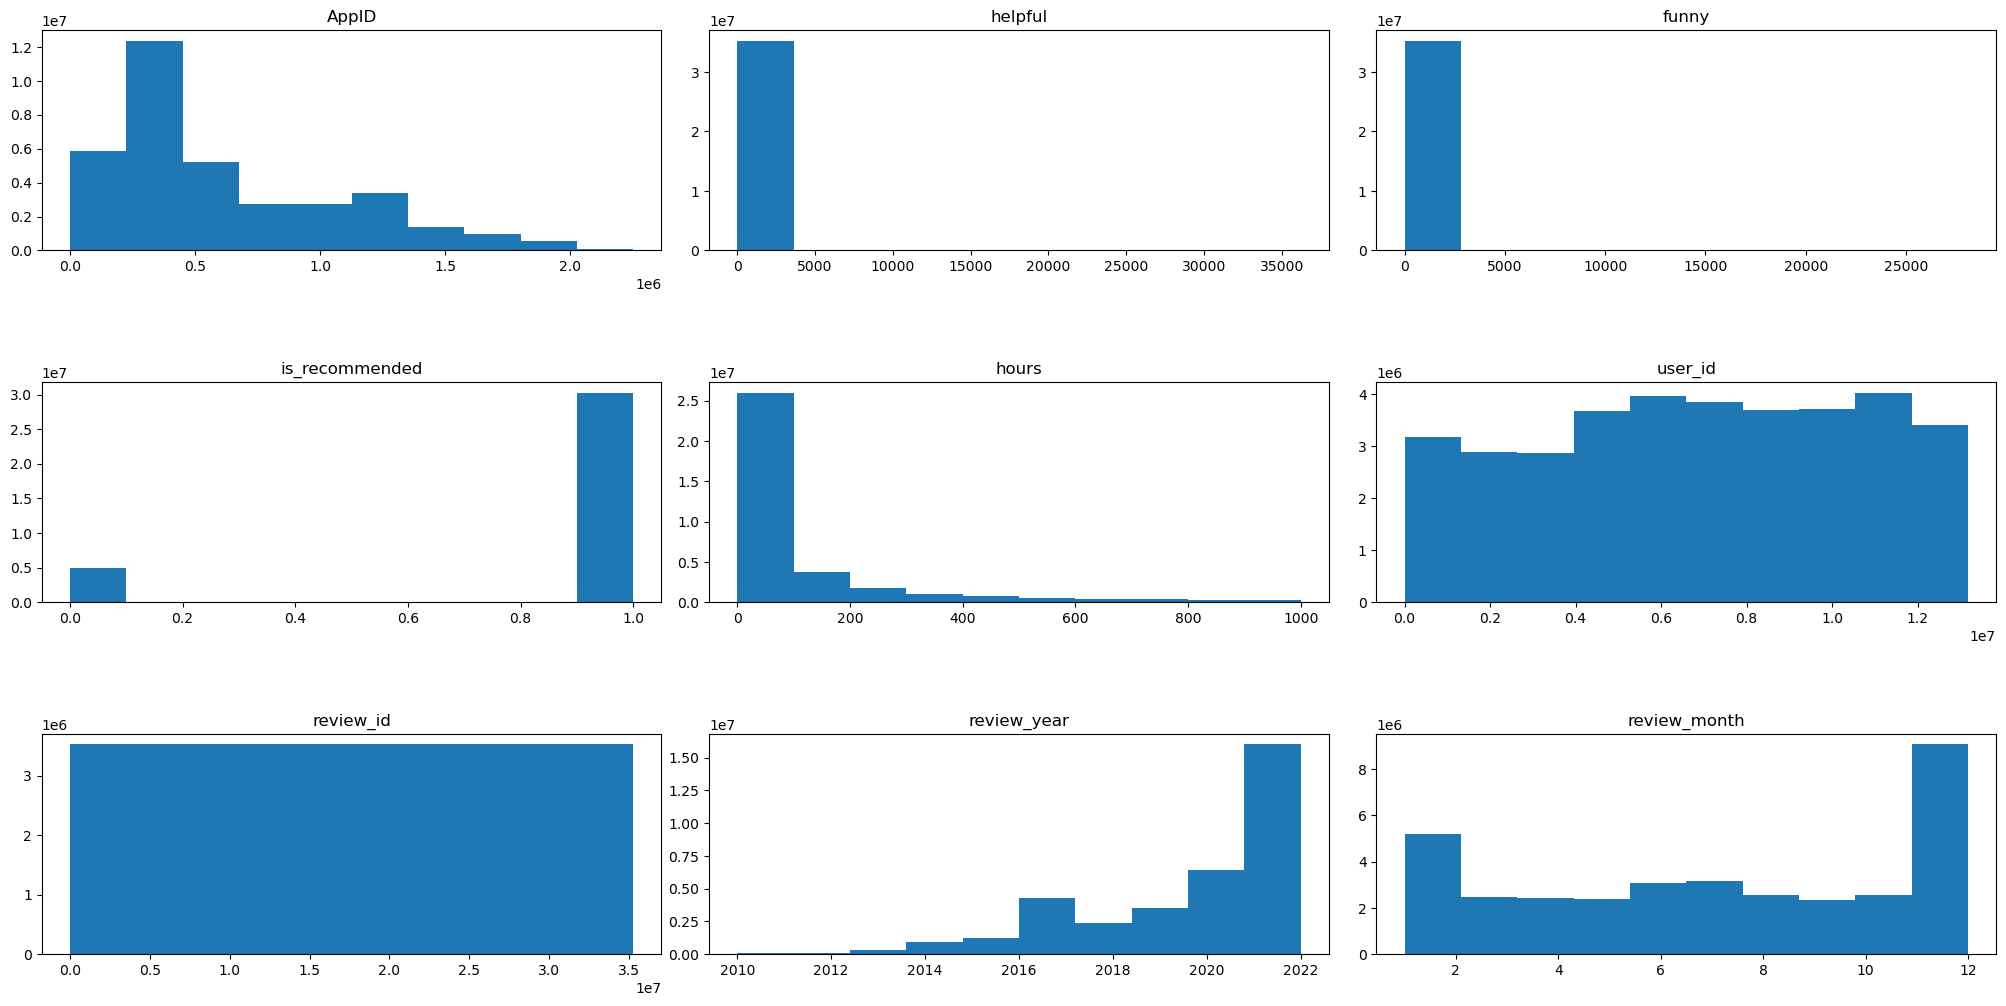

In [185]:
# Plotting histograms of the numeric columns
plt.subplots(3, 3, figsize=(20, 10))

for i, column in enumerate(recommendations.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(recommendations[column])
    plt.title(column)
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

In [186]:
recommendations.shape

(35271521, 9)

In [187]:
recommendations['review_id'].nunique()

35271521

It can be seen that none of the columns within the `recommendation` data frame is normally distributed. 
- `AppID` : Since each ID is unique to a game on steam, it appears that specific IDs likely have more appearances than others within this data set (i.e. potentially more popular and more likely to be reviewed compared to other IDs). It has a right skew. 
- `helpful` : These are user-'liked' labels for reviews, so the values of these are going to be user interactivity based. There are some small instances where the number of `helpful` 'likes' is very high but the majority will be subject to lower interactivity which is why the bar is left dominated. 
- `funny` : Same can be said about `funny` 'likes' above, as with `helpful`.
- `is_recommended` : There is a bias within this data set as there are more recommended outcomes than not recommended. When training a model, it will likely be better able to predict recommended outcomes vs. not recommended. 
- `hours` : It appears that there is a right skew, so the majority of reviewers have done so on a relatively smaller number of hours of gameplay. This implies quick judgements or games that are shorter in length being more prevalent. 
- `user_id` : A histogram plot does not give much information regarding users as each is individual has a unique id. This was included in the histogram for completeness only
- `review_id` : This column has all unique entries as it is the ID for a review. There are no duplicate reviews as each review is unique. It is not appropriate to use a histogram to examine this column, but it was done above for completeness only. 
- `review_year` : The number of reviews going up with increasing years makes sense as there would be a growing player base, more games and more centralization of information on the platform. This histogran is left skewed.
- `review_month` : This appears to have a possible bi-modal distribution. There appears to be more reviews that occur in the winter months Nov/Dec/Jan (holiday season) than other months. This could potentially be attributed to large game sales that happen during this month resulting in more games purchased and holidays allowing for more playtime (seasonality). 

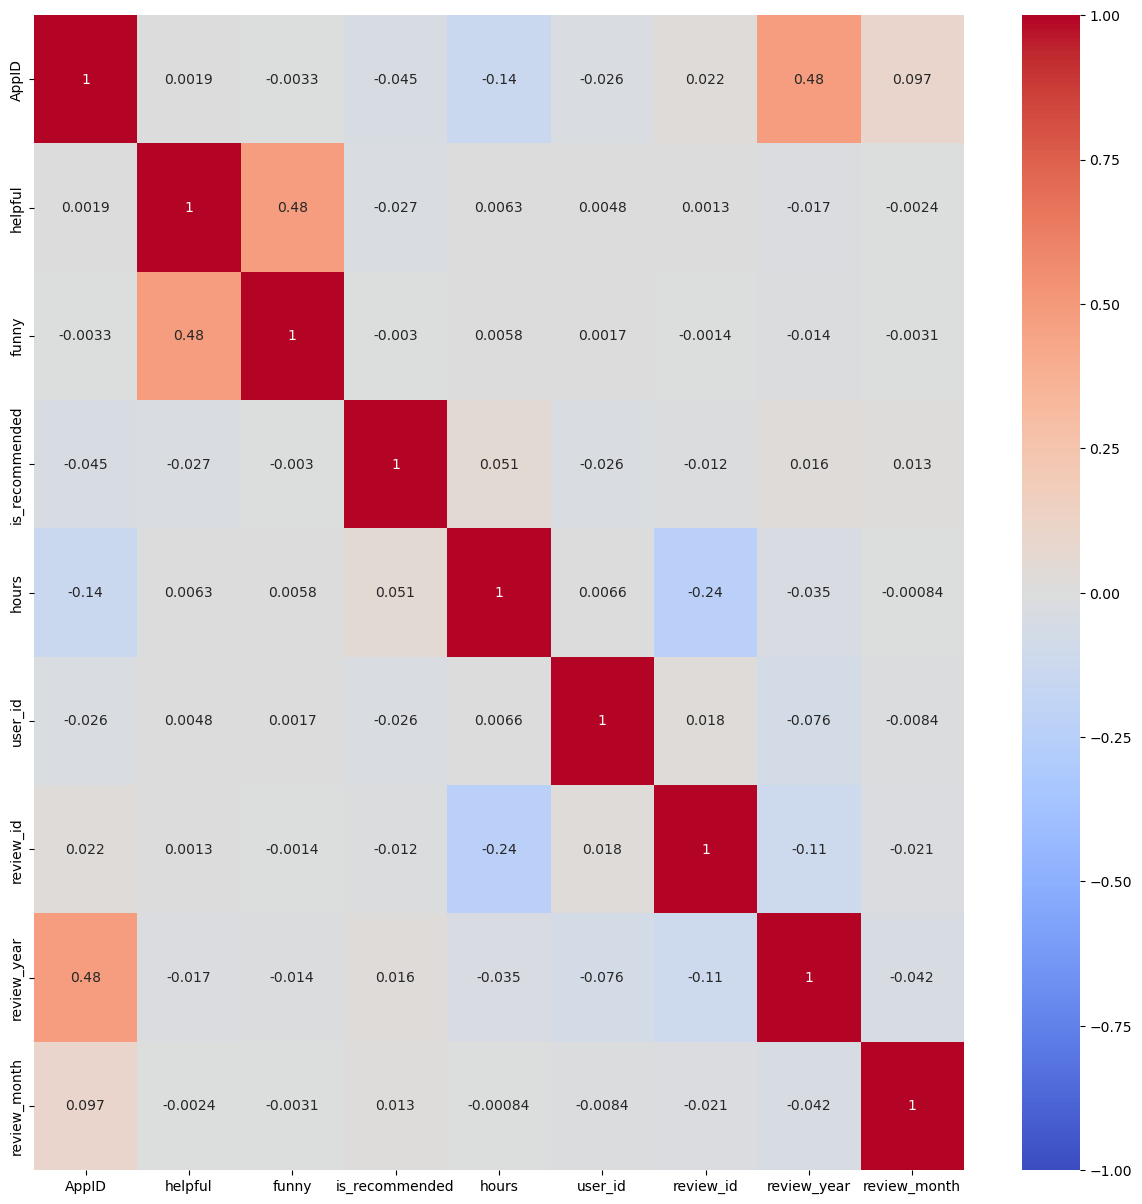

In [188]:
# Pearson correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(recommendations.corr(numeric_only=True), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

There is no column that is strongly correlated with `is_recommended`, which would be a potential target variable of this data set.

Potential collinearity:
- `funny` and `helpful` : While the sentiment of each of these is different, both are positively inclined. `helpful` reviews are also likely to be `funny` and vice versa, which results in the positive correlation.
- `AppID` and `review_year` : This is positively correlated likely due to the fact that AppID increases with more games added (more games requires more unique IDs) and more games are added with the passage of time (years). `AppID` is numeric, but more of a categorical item given that each ID is indicative of a game product--thus, the correlation is not significant and is not one that needs addressing.

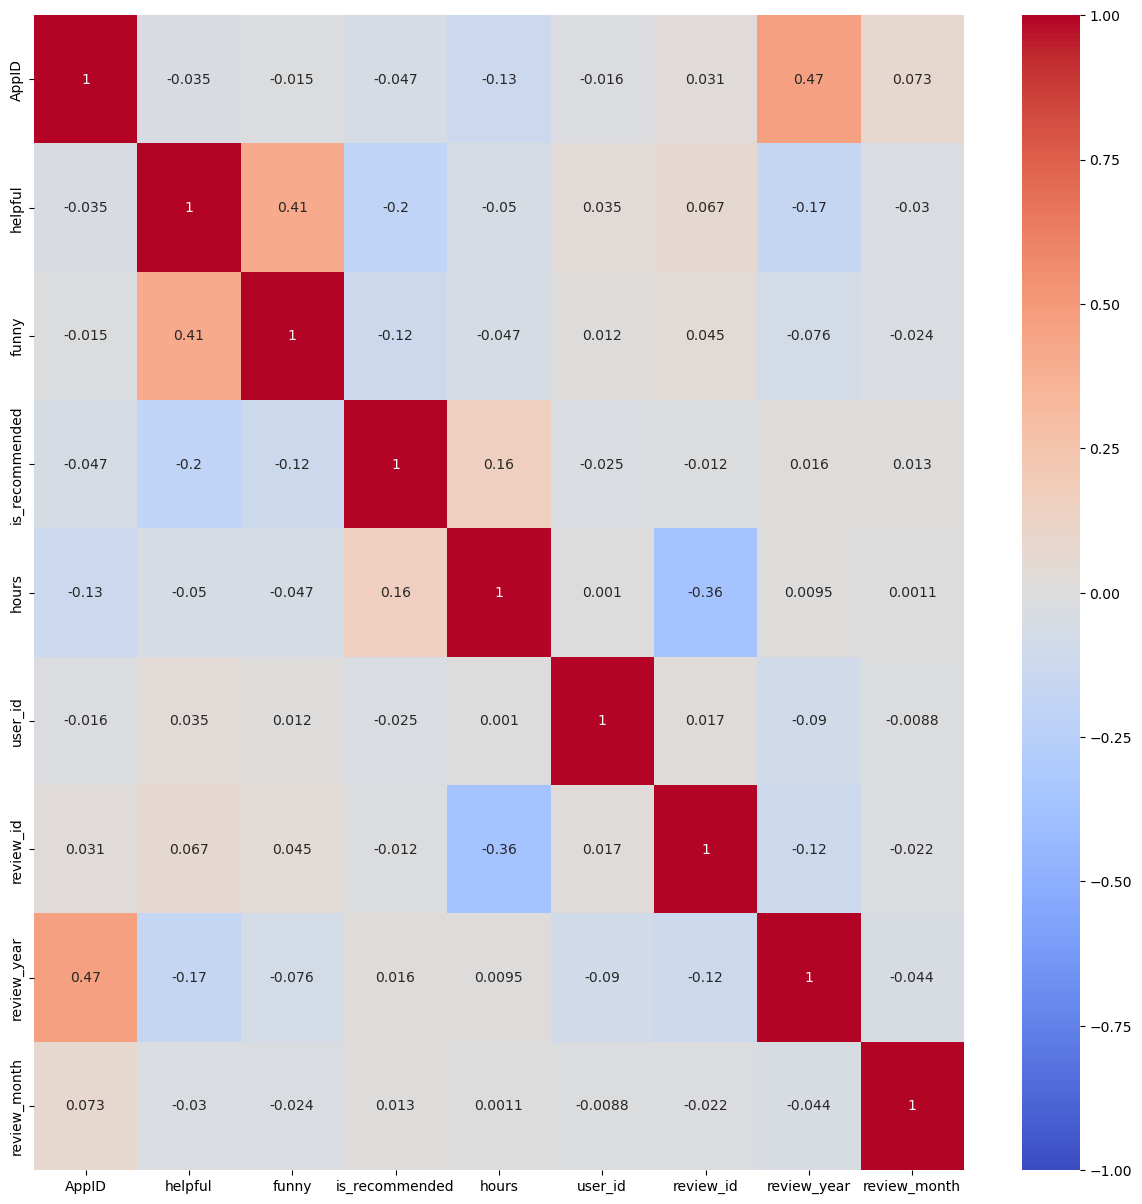

In [290]:
# Spearman correlation heatmap for comparison
plt.figure(figsize=(15,15))
sns.heatmap(recommendations.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

The spearman correlation will also be taken given that none of the columns are normally distributed. It can be seen that the direction and strength of correlations between pearson and spearman does not differ by a large margin; the warmer/cooler pairings are also similar to those of the pearson correlation, which have already been addressed above. 

#### `app_id`

In [291]:
# Checking number of recommendations/reviews
recommendations.shape

(35271521, 9)

In [189]:
# Checking unique number of games reviewed
recommendations['AppID'].nunique()

32942

There are only 32,942 unique Steam game IDs in this dataset, so not all games will be captured when doing a game recommender system solely on on a user recommended system with this data.  

There are a large number (35 million) of users reviewing products such that a good recommendation system can be trained for this subset of games, but the recommendations will lack breadth of options using this method alone. 

The user-based method of recommendation will be explored since the existence of interaction (via review) means that there is information to base a recommendation from. Games without any players/reviews are harder to vet for quality (though they can be recommended based on objective similarities) and thus harder to recommend.  

#### `helpful`

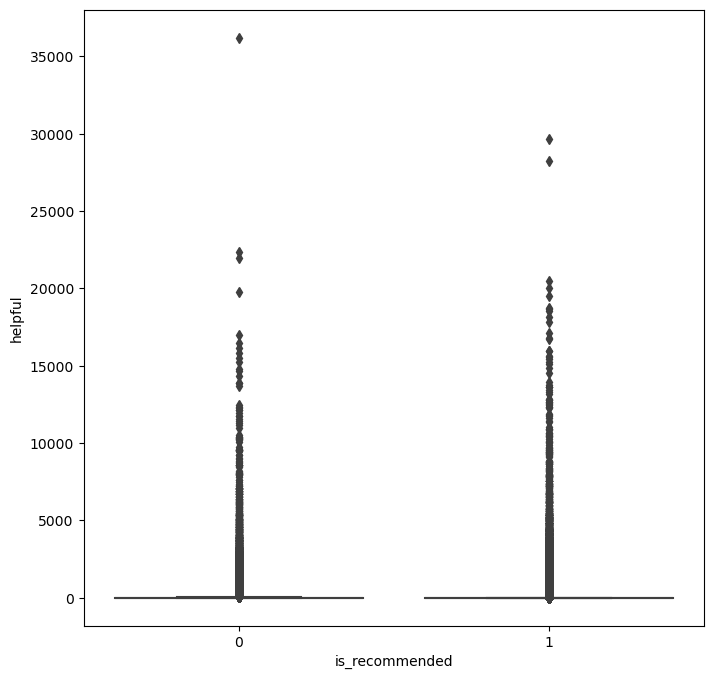

In [190]:
# Boxplot of helpful on whether a game is recommended or not recommended
plt.figure(figsize=(8,8))
sns.boxplot(data=recommendations, x=recommendations['is_recommended'], y=recommendations['helpful'])
plt.show()

It appears that most of the counts of `helpful` are seen to be outliers when it comes to whether a game will result in a recommendation or not. 

#### `funny`

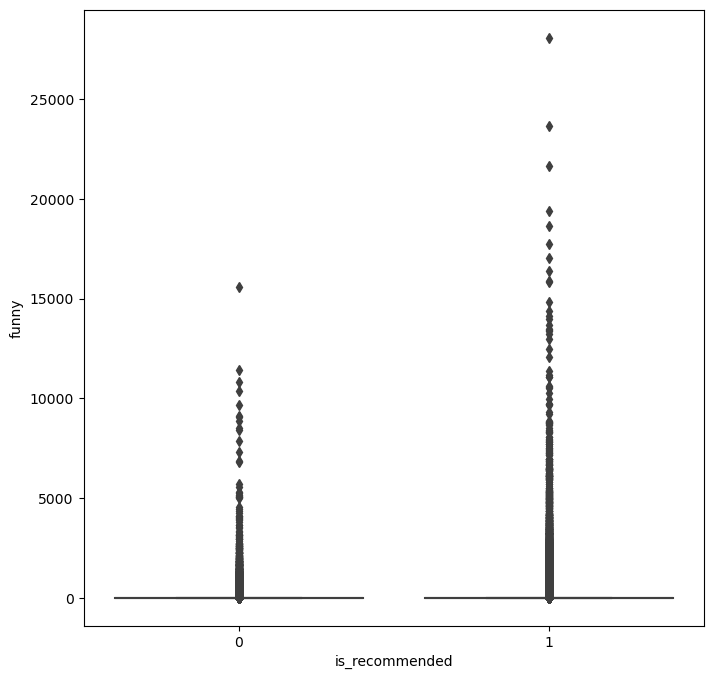

In [191]:
# Boxplot of funny on whether a game is recommended or not recommended
plt.figure(figsize=(8,8))
sns.boxplot(data=recommendations, x=recommendations['is_recommended'], y=recommendations['funny'])
plt.show()

Similarly to `helpful`, it appears that `funny` counts are also mostly comprised of outliers. It is difficult to say whether there is any significant contribution of these 2 review 'like' features on whether a game is recommended. 

#### `hours`

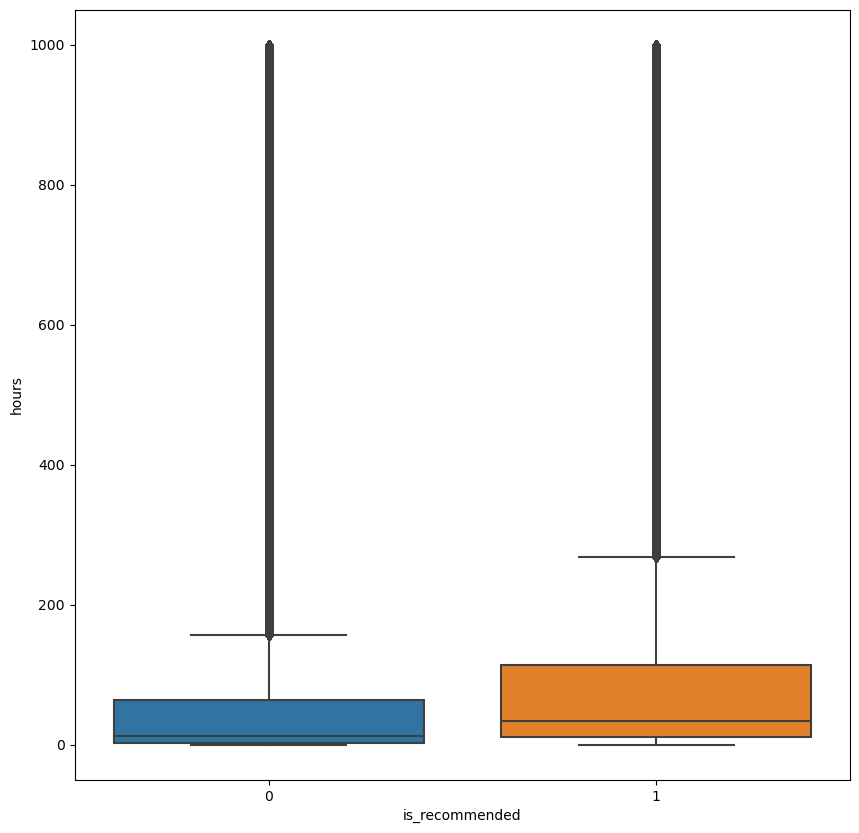

In [192]:
# Boxplot of relationship between hours played and whether a game is recommended or not
plt.figure(figsize=(10,10))
sns.boxplot(data=recommendations, x=recommendations['is_recommended'], y=recommendations['hours'])
plt.show()

By constrast, while there are still a significant number of outlier hours, it can be seen that recommended games are on average played for a longer period of time. Because the boxplots still overlap, it does not appear to be a significant means of differentiating recommended vs. not recommended games. 

**Final Thoughts:** It should be noted that there are a lot of outliers in all the above discussed columns. This is likely because the vast majority of games on Steam are either undiscovered, have small player bases, have players who do not leave reviews, or are of low quality (resulting in low play counts/hours played).

#### `review_year`

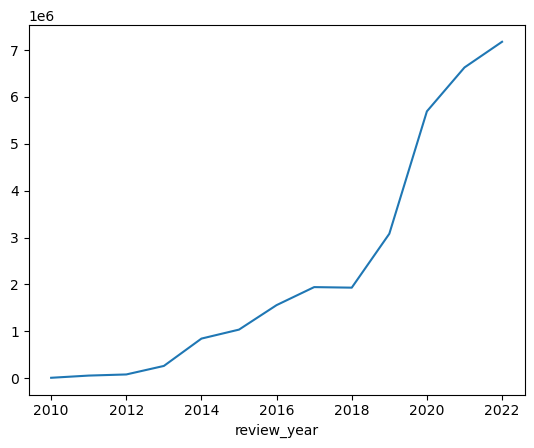

In [302]:
# Graph of sum of recommendations by year
recommendations.groupby(recommendations['review_year']).sum()['is_recommended'].plot()
plt.xlabel('Year of Review')
plt.ylabel('')

plt.show()

The number of game recommendations year by year has gone up, likely due to the fact that the playerbase has increased significantly and the number of games available on Steam has exponentially grown year over year. 

#### `review_month`

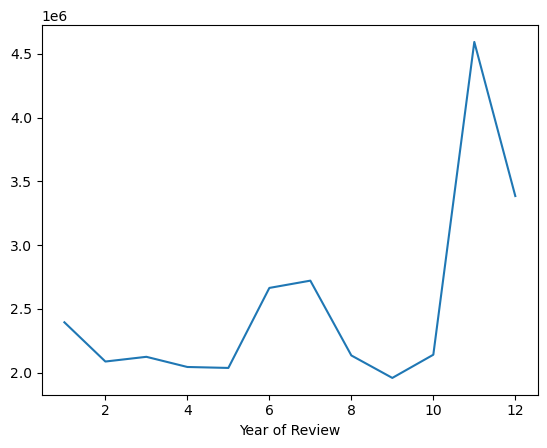

In [303]:
# Sum of recommendations by month (i.e. when are people leaving reviews/recommendations)
recommendations.groupby(recommendations['review_month']).sum()['is_recommended'].plot()
plt.xlabel('Year of Review')
plt.ylabel('')

plt.show()

It appears there may be notable seasons where recommendation numbers go up. From recommendations made over 2010 to 2022, most of them were done in November and December, and June and July. These times correspond to holiday months (where players are likely to have more time to game), but also to sale months (when most games are likely to be discounted). 

<a name='User'></a>
### User Data

In [195]:
# Checking user dataframe info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13179866 entries, 0 to 13179865
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 301.7 MB


In [196]:
# Checking what the dataframe looks like
users.head()

user_id  products  reviews
0   6784920       359        0
1  12917080       156        1
2   8079864       329        4
3   4422752       176        3
4   4747757        98        2

In [197]:
# Checking distribution of values
users.describe()

user_id      products       reviews
count  1.317987e+07  1.317987e+07  1.317987e+07
mean   6.589932e+06  1.197095e+02  2.676167e+00
std    3.804700e+06  2.498165e+02  7.044789e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.294966e+06  2.300000e+01  1.000000e+00
50%    6.589932e+06  5.700000e+01  1.000000e+00
75%    9.884899e+06  1.310000e+02  2.000000e+00
max    1.317986e+07  3.221400e+04  5.249000e+03

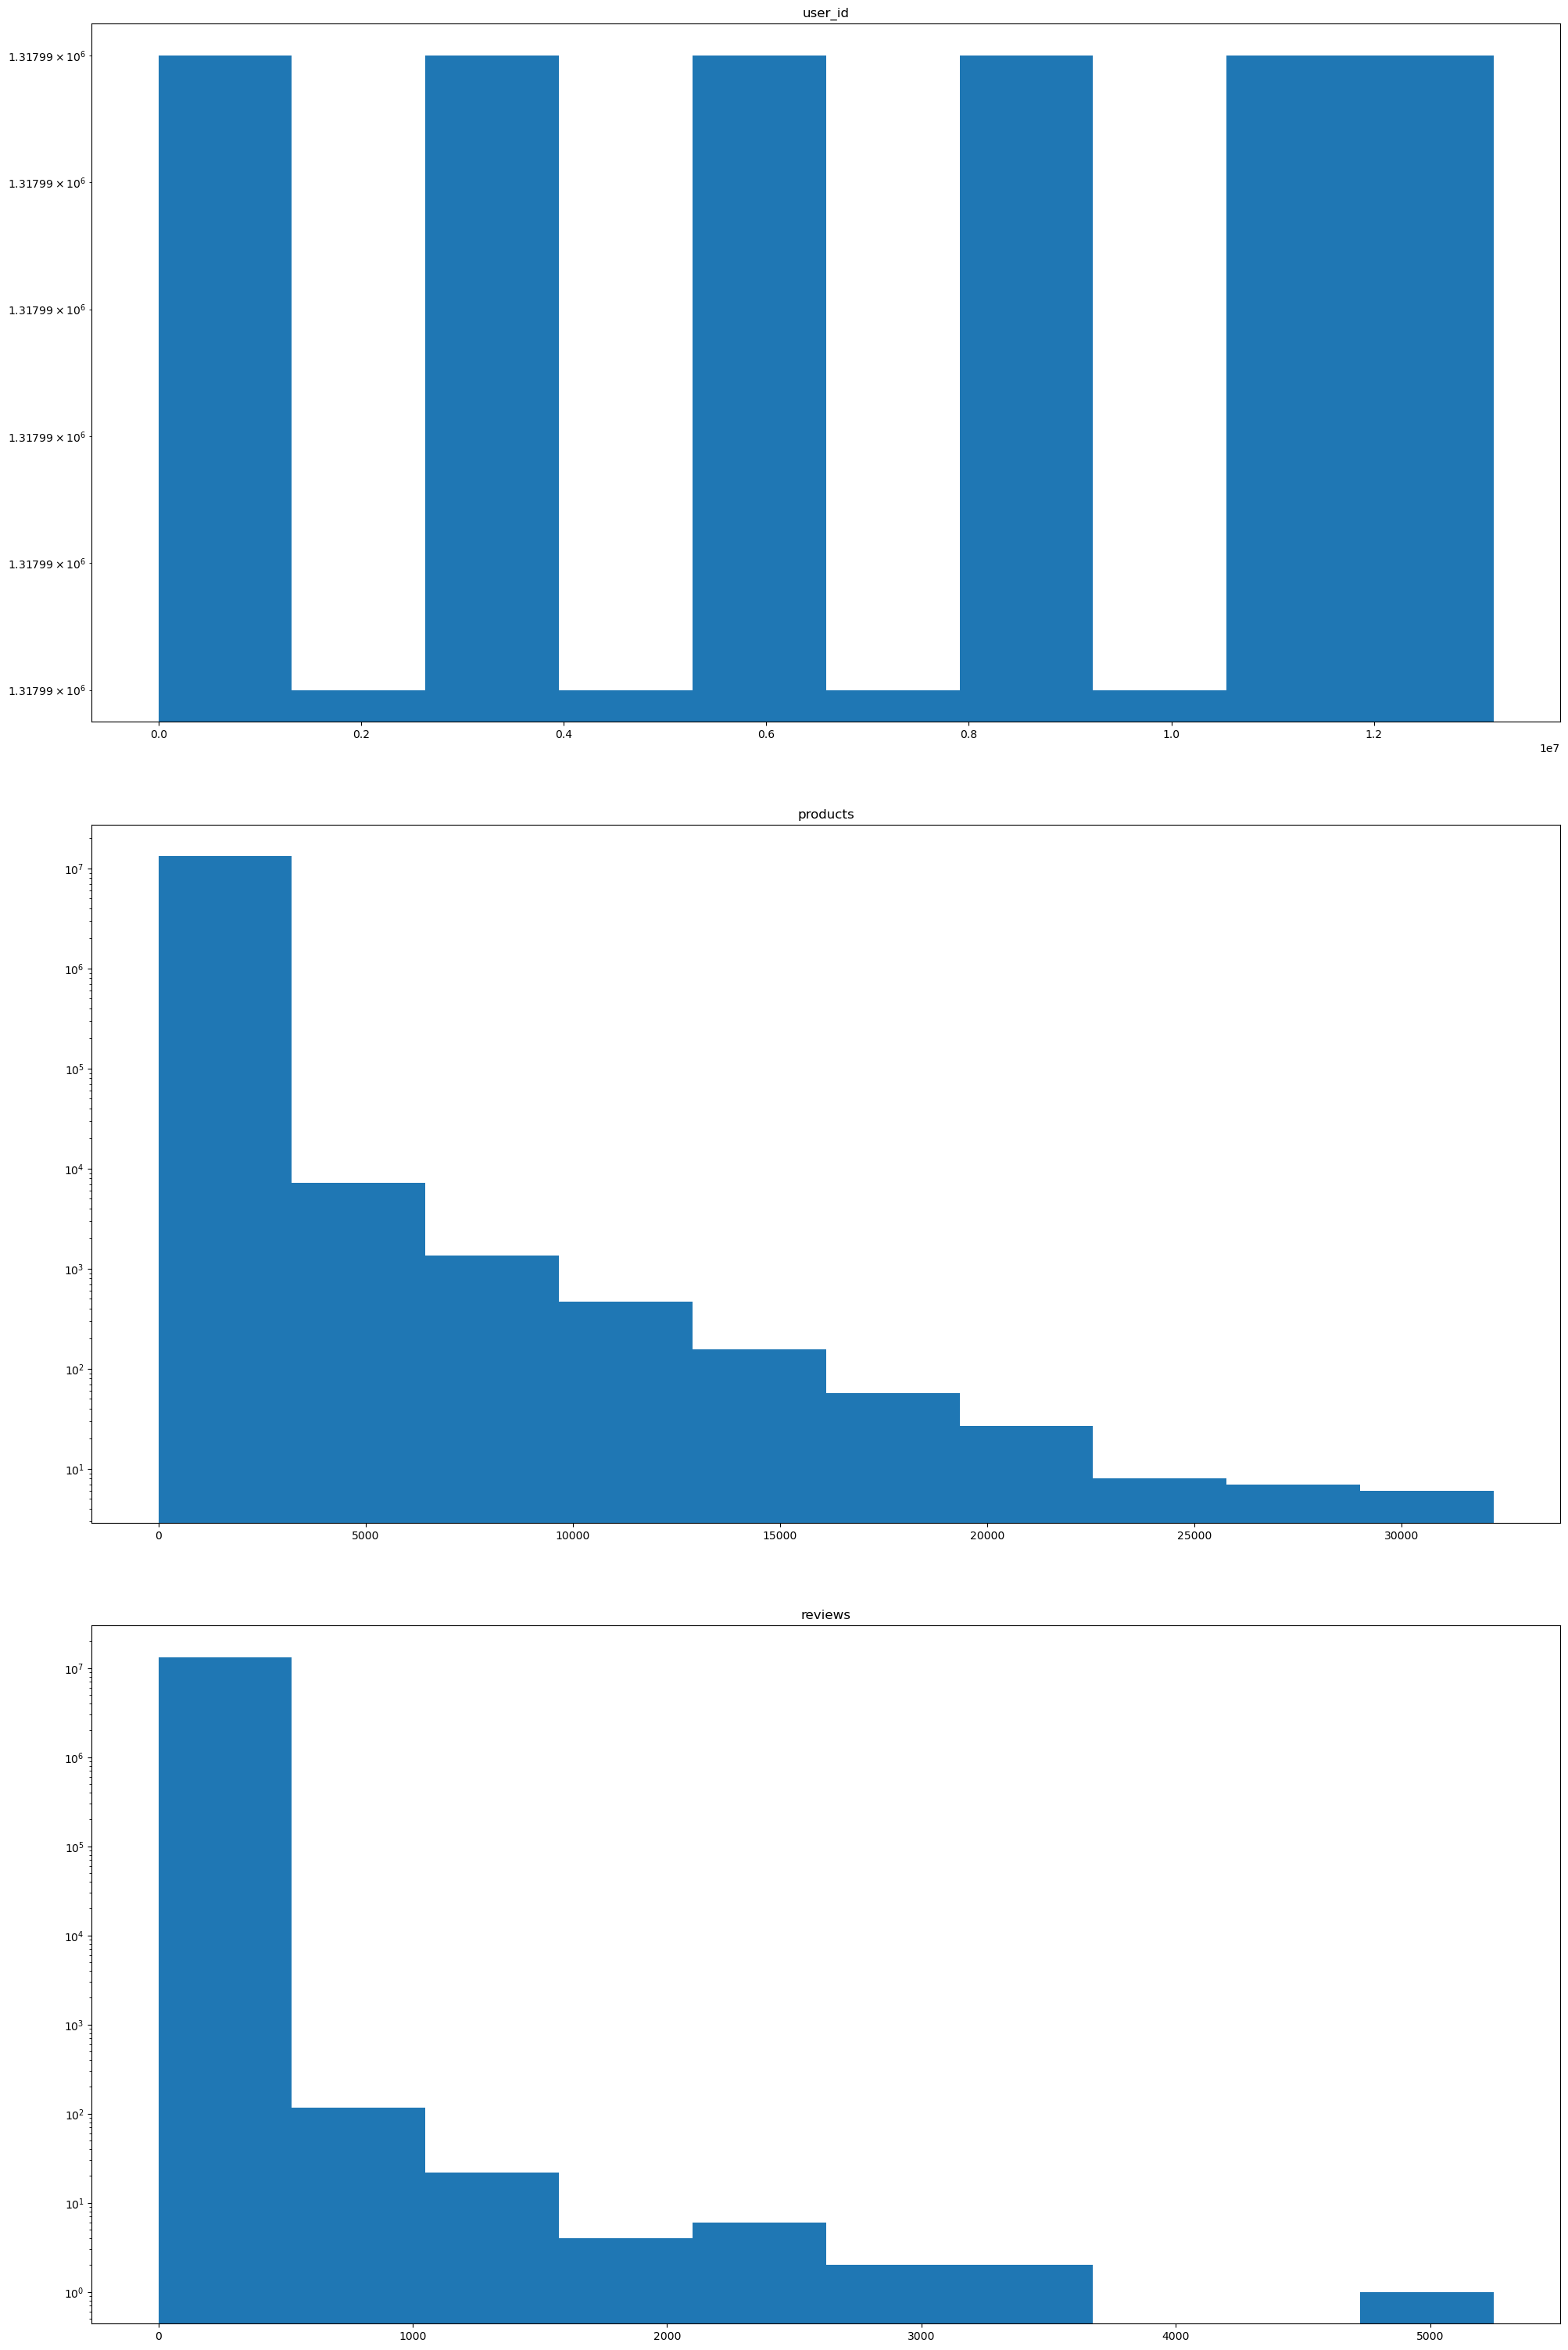

In [198]:
# Histogram of each numeric column
plt.subplots(3, 1, figsize=(20, 30))

for i, column in enumerate(users.columns, 1):
    plt.subplot(3, 1, i)
    plt.hist(users[column], log=True)
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

- `user_id` is being plotted for completeness, but as a unique identifier should not be plotted via histogram. There is nothing that can be derived from this as there is a unique value for each of the 13 million rows.  
- `products` is the number of products a user owns on Steam. It can be seen that product ownership is right skewed, with a majority of people owning a smaller number of games. 
- `reviews` are also right skewed, so most people don't write many reviews, though it can be seen that there is an outlier that has a very high number of reviews. 

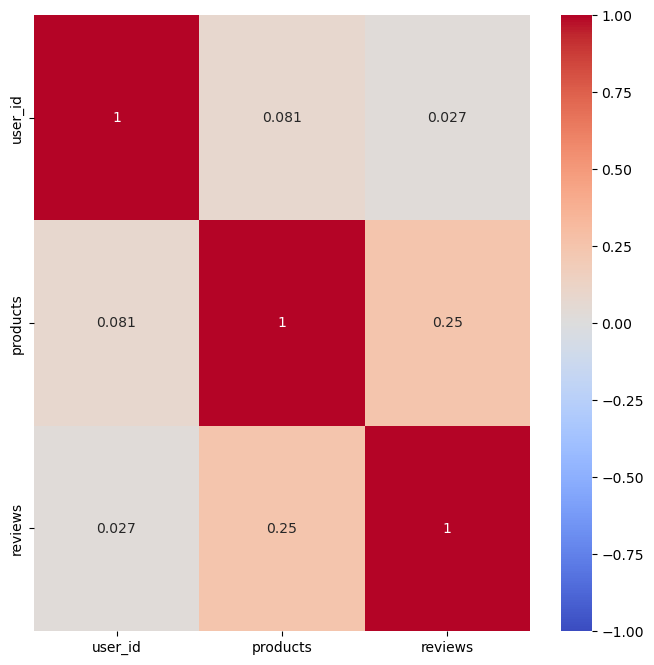

In [199]:
# Pearson correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(users.corr(numeric_only=True), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

No notable correlations can be seen, which is expected given the nature of the columns.

Owning more `products` does not mean a user is more likely to leave `reviews` and vice versa. 

#### `products`

In [200]:
# Checking for data of note/most products owned by a user
users.sort_values('products', ascending=False).head()

user_id  products  reviews
8971124   10763830     32214       11
8704653    9183226     30124       10
12720011   5745218     29749       82
4290246    9114971     29655        2
2084243    8863432     29615       97

In [201]:
11/32214*100

0.034146644316135843

The user that has purchased the most products on steam has purchased 32,214 of them. It can be seen that there have only been 11 reviews, in contrast, so they have only reviewed 0.03% of all games purchased. 

In [295]:
users['products'].mean()

119.70946525556481

In [296]:
users['products'].median()

57.0

The average number of products a user owns is about 120; however, this value is likely to be skewed by the existence of outliers (such as user 10763830, who owns 32,214 products). 

By comparison, the median number of products owned is 57. 

#### `reviews`

In [202]:
users.sort_values('reviews', ascending=False).head()

user_id  products  reviews
4426145   10837767      7898     5249
9181901    4696697      1226     3348
12659568  10734314      1807     3297
11093956   5216252      4737     2991
8047192   10635837      1880     2914

In [203]:
5249/7898

0.6645986325652063

In [90]:
11/32214

0.0003414664431613584

It appears the user that has completed the most number of reviews has done 5249 of them. In contrast to the number of products that they have purchased, they complete 0.66 reviews per product purchased. 

This is in significant contrast to the user who owns 32214 products but has only reviewed 11 (or 0.03%) of them. 

<a name='Remarks'></a>
### Concluding Remarks

While there is a lot of data prepared above and many insights that can potentially be derived from individual columns examined, not all of them will be relvant when creating a recommendation system. Nor is there a means to incorporate all of them into a recommendation system (with the currently available computational resources). 